In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_station as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

In [21]:
base = []
model = []
model_V = []
corr_V = []
corr = []
for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_V/model_V_V_{}.npy".format(tau))))
    corr_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_V/model_V_V_corr_{}.npy".format(tau))))

base = np.sqrt(base)/303
model = np.sqrt(model)/303
model_V = np.sqrt(model_V)/303
corr_V = np.sqrt(corr_V)/303
corr = np.sqrt(corr)/303

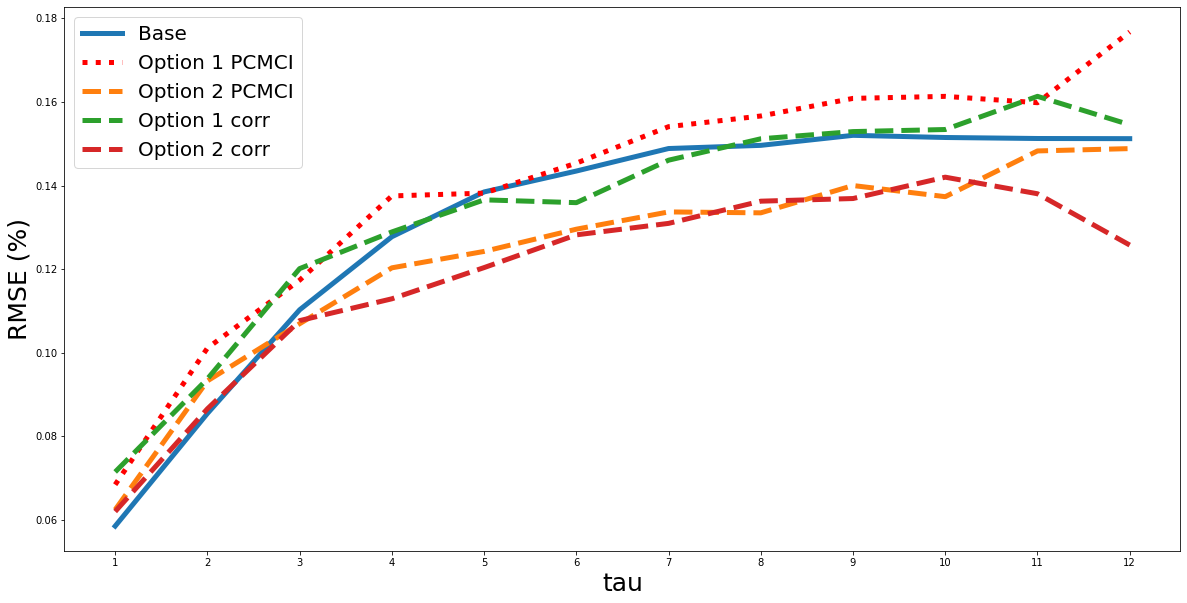

In [24]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_V, label = 'Option 1 PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, model, label = 'Option 2 PCMCI', linewidth=5, linestyle="dashed")
plt.plot(tau, corr_V, label = 'Option 1 corr', linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = 'Option 2 corr', linewidth=5, linestyle="dashed")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("V Options.png")

In [36]:
base = []
model = []
model_d = []
corr_d = []
corr = []
n_count = 303
for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    model_d.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))
    corr_d.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_corr_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))

base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
model_d = np.sqrt(model_d)/n_count
corr_d = np.sqrt(corr_d)/n_count
corr = np.sqrt(corr)/n_count

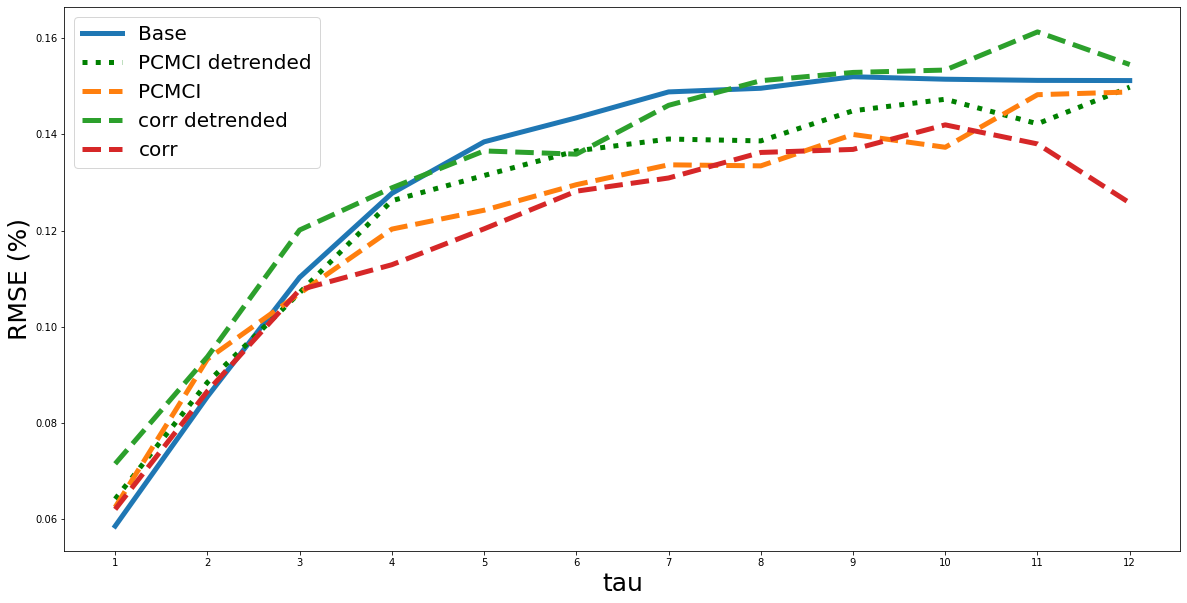

In [37]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_d, label = 'PCMCI detrended', linewidth=5, linestyle="dotted", color='green')
plt.plot(tau, model, label = 'PCMCI', linewidth=5, linestyle="dashed")
plt.plot(tau, corr_V, label = 'corr detrended', linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = 'corr', linewidth=5, linestyle="dashed")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("Detrending.png")

In [15]:
base = []
model = []
corr = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_all_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_all_V_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_all_corr_{}.npy".format(tau))))


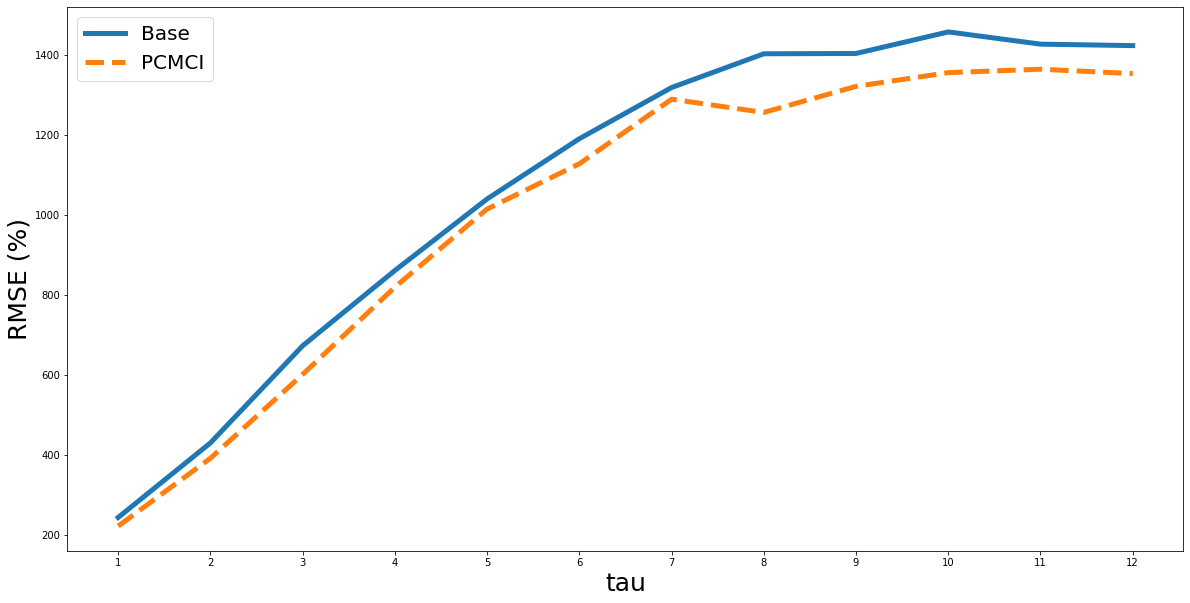

In [17]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = 'PCMCI', linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dotted")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("Detrending.png")

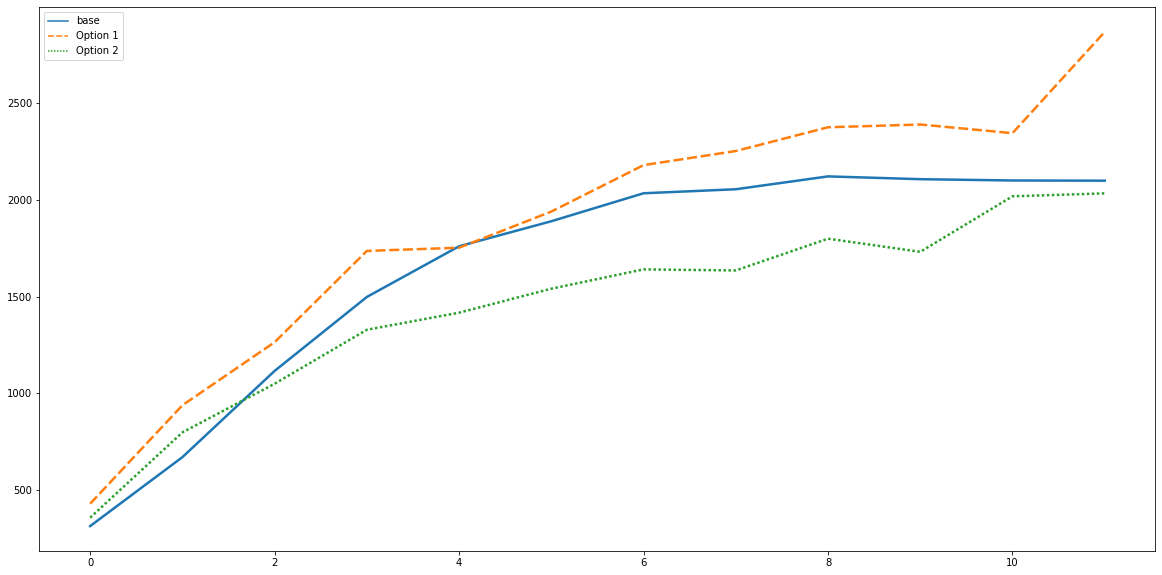

In [15]:
#sns.set_theme(style="whitegrid")


#dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame({'base':base, 'Option 1':model_V, 'Option 2':model})


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

Data: from 1926 to 2015

Using 35 years as training set and 5 years test set and sliding window of 5 years 

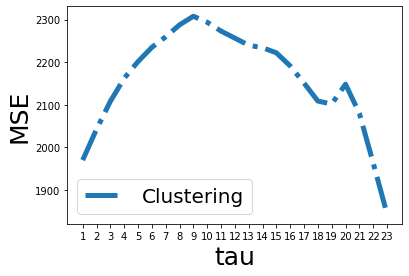

In [7]:
clus = []

for tau in range(1,24):
    clus.append(np.nanmean(np.load("./new3/model_clustering_{}.npy".format(tau))))
    
tau = np.arange(1,24)
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [64]:
np.arange(1926,1977,5)

array([1926, 1931, 1936, 1941, 1946, 1951, 1956, 1961, 1966, 1971, 1976])

In [65]:
np.arange(1960,2011,5)

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

# California

In [5]:
#BSk
base = []
corr = []
model = []
n_count = 105
class_name = "BSk"
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_cal/base_V_{}_{}.npy".format(tau, class_name)))
    corr.append(np.load("../../whole_data_results/new_rotated_cal/model_V_corr_{}_{}.npy".format(tau, class_name)))
    model.append(np.load("../../whole_data_results/new_rotated_cal/model_V_{}_{}.npy".format(tau, class_name)))
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

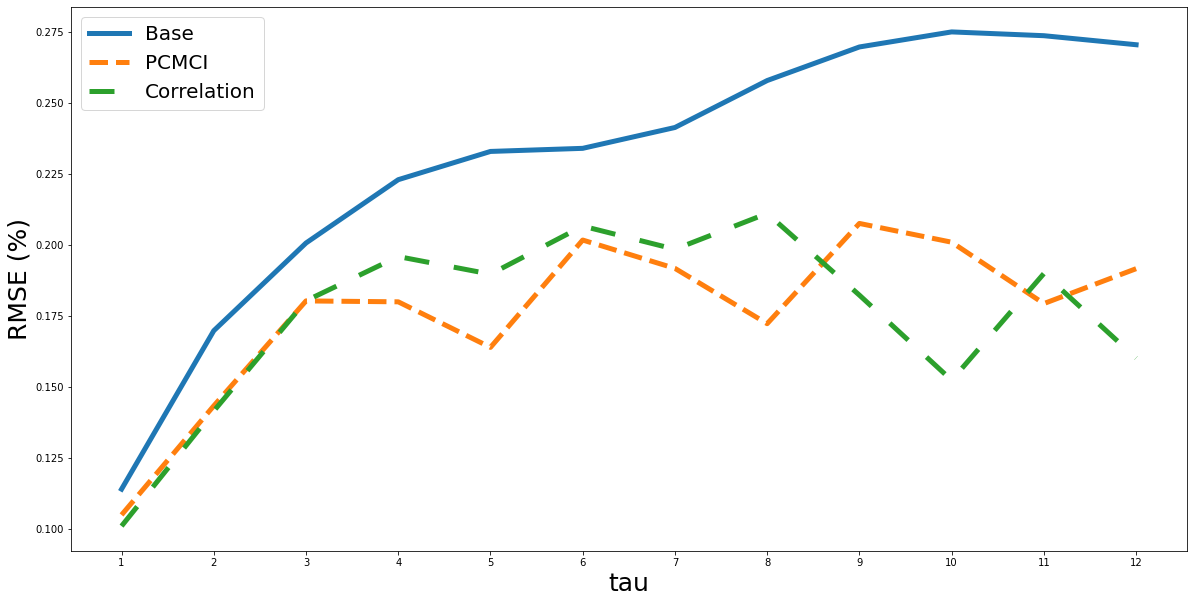

In [6]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKoAAAJbCAYAAADE/nyVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzdeVyVZf7/8fd9Dhz2TVlEBHFNUXMjLdMWlzarKcfKmvrWtM/Wt93JmtJqMms0m2nqN23WzHybadNyLDUxtWVaXNBSUMENQQUEZF/Ocv/+YAlkEz3AEV7Px8MHcN/Xfd2fQyTw9ro+t2GapgAAAAAAAIDOZunsAgAAAAAAAACJoAoAAAAAAAAegqAKAAAAAAAAHoGgCgAAAAAAAB6BoAoAAAAAAAAegaAKAAAAAAAAHsGrswvwZOHh4WZ8fHxnlwEAAAAAANBlbN68+ahpmhFNnSOoakF8fLw2bdrU2WUAAAAAAAB0GYZhHGjuHFv/AAAAAAAA4BEIqgAAAAAAAOARCKoAAAAAAADgEQiqAAAAAAAA4BEIqgAAAAAAAOARCKoAAAAAAADgEQiqAAAAAAAA4BEIqgAAAAAAAOARvDq7gK6isrJS+fn5Ki4ultPp7OxygJNmtVoVFBSkHj16yMfHp7PLAQAAAAB0IwRVblBZWamMjAyFhYUpPj5e3t7eMgyjs8sC2sw0TdntdhUVFSkjI0NxcXGEVQAAAACADsPWPzfIz89XWFiYwsPDZbPZCKlw2jIMQzabTeHh4QoLC1N+fn5nlwQAAAAA6EYIqtyguLhYwcHBnV0G4FbBwcEqLi7u7DIAAAAAAN0IQZUbOJ1OeXt7d3YZgFt5e3vTbw0AAAAA0KEIqtyE7X7oaviaBgAAAAB0NIIqAAAAAAAAeASCKgAAAAAAAHgEgioAAAAAAAB4BIIquI1hGI3++Pj4KD4+XjfffLNSU1M7u0QAAAAAAODBvDq7AHQ9TzzxRN37hYWF+v777/X3v/9dH374ob766iuNGjWqE6sDAAAAAACeyiODKsMwLpH0oiSrpNdN03z2uPP3S7pdkkNSrqRbTdM8YBjGhZJeqDd0iKRZpml+ZBjGW5LOl1RYc+4W0zS3tu8r6Z7mzp3b6Njvfvc7vfTSS1q8eLHeeuutDq8JAAAAAAB4Po8LqgzDsEr6q6RpkjIlbTQMY7lpmin1hiVLSjRNs8wwjF9Jek7SdaZprpM0qmaeHpLSJX1W77qHTNP8oCNeBxq66KKL9NJLLyk3N7fB8cLCQr366qtauXKldu/erZycHIWEhOicc87RI488onPOOafRXF9++aWee+45JScnKzc3V2FhYYqPj9ell17aYDWXJJWVlenFF1/Uu+++q7S0NBmGoREjRuiee+7R9ddf366vGQAAAED7MU1ThworlJ5TorTsYmUWlMswJH+bVX7eVvnZvOTnbZW/zSrfmrd+deeqP/b39pKvzSKb1SLDMDr7JQGQBwZVksZJSjdNc68kGYbxb0k/k1QXVNUEUrW+lXRjE/PMlLTSNM2ydqwVJygpKUmSlJiY2OB4amqqHn30UZ133nmaPn26wsLClJGRoeXLl2vlypX6z3/+o0suuaRu/KpVqzR9+nQFBwfryiuvVExMjPLz85WamqqXX365QVB17NgxTZ48WcnJyRozZoxuvfVWuVwurV69WjfccIN27Nihp59+umM+AQAAAABOitNlKrOgTGnZJUrPLal+m1Os9JwSlVY53XIPq8WoC7AahVvHH68JuPxslgZhWHPX+9u85ONlkcVCEAacCE8MqmIkHaz3caak8S2Mv03SyiaOz5K06LhjfzQM43FJayX93jTNylMptDXxv/+kPadvF/ufnX7Kc9Tf+ldUVKSNGzfq66+/1uWXX64HH3ywwdihQ4fq0KFDCg8Pb3A8MzNT48aN03333dcgqHrttdfkcrm0fv16jRw5ssE1R48ebfDxvffeq+TkZC1YsEAPP/xw3fGKigpdddVVeuaZZzRz5kx6ZgEAAAAewO506UBemdJzihuEUntyS1TpcLXrvZ0uUyWVDpVUOtrtHvWDrNoVXc2FYT+tCLPI3+ZVE47VjGk0rvqtl5VnpaFr8MSg6oQZhnGjpERV956qfzxa0ghJq+sdfkTSEUk2Sa9Kmi3pySbmvFPSnZIUFxfXLnV3dfPmzWt0LCEhQddff72CgoIaHA8JCWlyjj59+mjmzJn6y1/+ooyMjEb/Lfz8/BpdUz/sysvL0z//+U8lJiY2CKkkydfXVwsWLNDq1av1zjvvEFQBAAAAHajS4dS+o6VKyy5RWk5JXTC1P69UdqfZ2eW1m3K7U+V296wAa4rNaml6RViL4Vjr2yNr32d7JDqKJwZVWZJi633cp+ZYA4ZhTJX0qKTzm1gZda2kZaZp2msPmKZ5uObdSsMwlkh6UE0wTfNVVQdZSkxM7Lp/S7Yj0/zp01ZaWqodO3bo97//vX7xi19ox44d+uMf/9hg/Ndff60XX3xR33zzjXJyclRVVdXgfFZWVl1Q9Ytf/EJLly7V+PHjdd111+nCCy/Uueeeqz59+jS4ZuPGjXI6nTIMo8nm7nZ79ZdGamqqO14yAAAAgOOUVTm0J6dUaTXb9KpDqRIdyCuVi9+03K7K6VJVuUuF5fbWB5+EprZHBvt5KzLIR5FBvooM9mn0foifN+EW2swTg6qNkgYZhtFP1QHVLEk31B9gGMZoSX+TdIlpmjlNzHG9qldQ1b8m2jTNw0b1/yVXSdreHsWjoYCAAI0bN05Lly5Vnz599Nxzz+nuu+9WbGx1Frls2TLNnDlTvr6+mjZtmgYMGKCAgABZLBatX79eGzZsUGXlTznkjBkztGLFCi1cuFBvvvmm/va3v0mSxo4dq/nz52vatGmSqldUSdWB1caNG5utr6SkpL1eOgAAANAtFFXYlZ5TovTskgahVGZBebvf299m1aDIQA2MDNKAyADZrBaVVVWvXCqvqv5TVvu+3VH9cRPnnSRnrTqZ7ZE2L4siAn0ahFhRwdVvI+od6xlgo4cX6nhcUGWapsMwjN+qetueVdKbpmnuMAzjSUmbTNNcLul5SYGS3q9JZzNM07xSkgzDiFf1iqwNx039f4ZhREgyJG2VdHcHvBzUCA0N1RlnnKEtW7Zoy5YtdUHVH/7wB9lsNm3atElDhw5tcM1dd92lDRuO/88oTZ8+XdOnT1dpaam+++47rVixQq+88oouv/xyJScnKyEhoW5L4X333adFi45vVQYAAACgrfJLq2pCqJoeUjUrpI4UVbT7vYN9vTQoKqgmlArUoKggDYwMVO8QX7es2KlyuH4Kr+xOlVU5VGGvCbXqBVsNQq6a8xU148vtLpVXOeqO1x9T1c49tjxVlcOlrGPlyjrWcmhptRgKD7RVr8YKqg62ImrfD/JRZHD1+xFBPvKmF1eX53FBlSSZpvmppE+PO/Z4vfentnDtflU3ZD/++GQ3lnhC3NGYvCspKCiQJLlcP/0lnZ6ermHDhjUKqVwul7766qsW5wsICNDkyZM1efJkhYWF6fHHH9fKlSuVkJCgcePGyWKx6Msvv3T/CwEAAAC6KNM0lVtcWbdNr34olVda1foEpyg80KaBtWFUZE0wFRWoiECfdt1CZvOyyOZlUYifd7vM73SZDVZxldeFW02FXo3DsdowrMGYeteW250yT+NFYU6XqeyiSmUXtf68s54BNkXUC6+OD7Nqtx76els7oHK0B48MqtD1fPTRR9q3b5+8vb01YcKEuuPx8fFKS0vToUOH1Lt3b0nV3xznzp2rlJSURvN88cUXmjBhgry8Gn7pZmdnS5L8/f0lSZGRkfrFL36hf/zjH3rqqac0Z84cWa0N/6Las2ePLBaL+vXr59bXCgAAAHg60zR1qLBCadnFdSuj0nJKlJZdrKKK9nvyXa1ewb4aFBXYIJQaGBmoHgG2dr93Z7BaDAX6eCnQp31+BTdNU5UOV70Ay6HyKlfLYVij7ZGNV4N54vbIvNIq5ZVWaeeR4hbHBfl6NeqZFRXsWx1y1TsW6ONFHy0PQ1AFt6vfvLy0tFQpKSlauXKlJOmZZ55RVFRU3fn77rtPd999t0aPHq2f//zn8vb21tdff62UlBRdccUV+s9//tNg7nvuuUdZWVk699xzFR8fL5vNps2bN+vzzz9X3759NWvWrLqxL730ktLS0vT444/rH//4hyZOnKioqCgdOnRIqamp2rhxo/71r38RVAEAAKDLcrpMZRaU1T1hLy2nWHtqgqnSqvZ7Al2tPmF+GlRvq17tn2Df9lm51F0ZhiFfb2u7riI6fntkaaVD+aVVyimuVE5xhXKKKpVbXKnsooq6YxX2ztvyWFzhUHGFQ3tyS1sc5+dtbdBDKyKotqfWT9sQI4N8FeZPY/iOQlAFt5s3b17d+1arVREREbriiiv029/+tq7Zea277rpLPj4+Wrx4sd5++235+flp0qRJWrJkiT788MNGQdWcOXO0bNkybdq0SUlJSbJYLIqLi9OcOXN07733KiwsrG5scHCwNmzYoFdffVXvvPOOPvzwQ1VUVCgqKkqDBg3SCy+80KgeAAAA4HRkd7p0IK+0emVUXShVor25Japs5/5IFkOK7xmgAZGBNaFU9Qqp/hEB8rfxK2dX0dbtkaZpqrjSoZyi6tAqt7iy7v2c494v7oBVfM0ptzt1IK9MB/LKWhznbTV+CrKaCbMig3zUM9BHVhrDnxLDPJ03srazxMREc9OmTa2OS01NbdRjCegK+NoGAADwLBV2p/YdLa3rIZVe00Nq39FSOdp5a5a31VC/8AANigxqEErF9wygHxBOSXmVszrIKq5QdhNhVvW5SuV3QJ+0U2UxpJ6B9Xpn1TzpMCK4YXP4iEAf2by6b2N4wzA2m6aZ2NQ54m0AAAAA8DBlVQ7tySmtbmZes0pqT26JDuSVqr1bBfl4WTQgonZlVO12vSD17enPE9fQLvxsVsX19FdcT/8Wx1U5XDpaUlkTYtVuMaxUbs3Ww5yarYdHSyrb/f+T5rhMKbe4ehvkjlbGhvl71/XLquud1cRqre62MrF7vVoAAAAA8CBFFfbqlVHZJQ1Cqaxj5e1+7wCbtS6Eqh9K9QnzZ+sSPJLNy6LeoX7qHerX4jiny1ReaWVd36ycekFW/dVaucWVqnJ2Xh+tgjK7Csrs2pXdSmN4Hy9F1OujNSImRHec17+Dqux4BFUAAAAA0M7yS6uqn7CXWx1Epdc0Ns8uqmz3ewf7emlwvWbmg6KCNCgyUNEhvjSHRpdktRg1K5J8WxxnmqYKy+2NembVNoTPrXesrAMePtCc4kqHinMd2lvTGD6/tIqgCgAAAABwYkoqHVqTckSbDxTUhVJ5HdBbJzzQVh1ERQbVvA3UwKhARQT6EEgBTTAMQ6H+NoX62zQ4KqjFsSWVjgbbDXOKfuqdVX/FVmG5vd3rjgzyafd7dCaCKgAAAAA4RQ6nS1/vydOyLZlavSNb5fb2W33RK9hXg6ICG4RSAyMD1SPA1m73BLq7QB8vBUYEqn9EYIvjKuzOprcb1r1f3VMrr7RKJ/tsu4hggioAAAAAQBNSDhVp6ZZMfbztkHKL3buNL7aHnwZGVG/Vq10hNSAyUMG+3m69DwD38fW2KraHv2J7tNwY3u50Ka+kqtn+WbXHj5ZUNnqiZ2tbGk93BFUAAAAA0AZHCiv08dYsLUvO0s4jLTdBbo3FkOJ7BtTrH1W9Sqp/REC3e9IX0J14Wy3qFeKrXiEth04ul6n8sqoGPbRGx4Z2UJWdg7/5AAAAAKAVpZUOrd5xREu3ZOnrPUfbvGXH22qoX3jAT/2jarbu9QsPkI+XtX2KBnDas1gMhQf6KDzQRwkK7uxyOgRBFQAAAAA0weky9XX6US1LztKq7Ufa1HcqxM9bl58ZrUmDwjUoKkhxPfzlbbW0Y7UA0DUQVAEAAABAPamHa/pObT2knDb0nfK2GrrwjEjNGNNHFw6JYKUUAJwEgioAAAAA3V52UXXfqaVb2t53akxcqK4e00eXj4hWGE/eA4BTQlAFAAAAoFsqq6rXdyr9qFxt6DsV28NPV4/uo6tHx6hfeED7FQkA3QxBFQAAAIBuw+ky9d89R7VsS5ZW7TiisqoT7zsV7Ouly0f21ozRMRrbN0yGYbRjpQDQPRFUAQAAAOjydh4p0rItWfpoa5ayi9rWd+qCMyI1Y3SMJg+NpO8UALQzHjsBtzEMo8Efq9Wq8PBwTZ48We+8806z1+3cuVO/+93vNHz4cIWEhMhms6l3796aPn263njjDVVWNvxBonZ+i8WiPXv2NDvvhRdeWDf2rbfeanJMaWmpFi9erMmTJysyMlI2m02hoaEaN26cHn30Ue3du7fB+FtuuaXF+QAAAOA5cooq9NoXe3Xpi1/qksVf6m9f7D3hkGp0XKie+tkwfT9nql77n0RdOiKakAoAOgArquB2TzzxhCTJbrdr586d+vjjj7Vu3Tpt2rRJixYtajD2ySef1Lx58+RyuXTOOefo5ptvVmBgoLKzs7V+/XrdfvvteuWVV7Rp06YG13l5ecnhcOiNN97QM88806iGtLQ0rV+/vm5cU7799lvNnDlTWVlZ6tOnjy677DL17t1bpaWlSk5O1oIFC/T888/r22+/1ZgxY9z02QEAAEB7Kqty6LMd2VqanKWv0nLb3ndqVIyuGh2j/hGB7VckAKBZBFVwu7lz5zb4eO3atZo2bZoWL16se+65R/Hx8ZKkZ555Rk888YRiY2P1/vvva/z48Y3mWrFihRYuXNjoeFRUlKKjo7VkyRI9+eST8vJq+KX8+uuvS5KuuOIKLVu2rNH1O3fu1MUXX6ySkhI9++yzeuCBBxrNsW/fPs2ePVtFRUVtefkAAADoYE6XqW/25GlpcqZWbz+i0jb0nQry9dLlZ0Zrxpg+SqTvFAB0OoIqtLspU6ZoyJAhSk1N1caNGxUfH6/9+/dr7ty58vb21qeffqrhw4c3ee3ll1+uadOmNXnujjvu0F133aUVK1boqquuqjtut9v11ltvacKECUpISGgyqPrd736noqIiPfLII5o9e3aT8/fr10/vvfdeo62HAAAA8Ay7jhRraXKmPk4+pCNFFSd8nZelpu/UmBhNHhIpX2+29AGApyCoQocwzeo117X/QrVkyRLZ7XbNmjWr2ZCqlo+PT5PHr7/+et1///16/fXXGwRVy5cvV05OjhYsWKD09PRG1+3bt09JSUny9fXVww8/3Grtzd0fAAAAHS+nuELLtx7S0i1ZSjnctpXvI2NDNWN0jC4/M1o9A/kZDwA8EUFVR1g3X9rwrHvmmlvYyvmQts95/u+lCx85uXpOQFJSknbt2iXDMHTWWWdJkr766itJ1autTlZQUJBmzZqlt956S5mZmerTp48k6bXXXlNwcLCuvfbaJvtX1d577NixCg0NPen7AwAAoGOUVzn1WcoRLd2SpS/b2HcqJtRPM8ZU950aQN8pAPB4BFVwu9oeVXa7Xbt27dJHH30k0zR13333qW/fvpKkw4cPS1JduHSy7rjjDr3xxht688039fjjj+vAgQNas2aN7rrrLvn7+zd5jbvuDQAAgPbjcpn6dm+eliZnaeWPh9vcd2r6iGhdPTpGZ8X3kMVC3ykAOF0QVMHt5s2bJ6l6m19oaKgmTZqk2267TTfeeKPb7zV+/HiNGDFCb775ph577DG9/vrrcrlcuuOOO9x+LwAAALS/3dnFWrolSx9vzdLhwrb1nTp/cIRmjOmjKUPpOwUApyuCKrhdbT+qlkRHRys1NVVZWVmnfL877rhD99xzj1auXKklS5Zo7NixGj16dIv3luSWewMAAODU5RZXavm2Q1q6JVM7DrWx71SfEF09OkZXjOxN3ykA6AIIqtApJk6cqM8//1xr167Vbbfddkpz3XTTTZo9e7buvvtuZWVl6fHHH2/13pK0adMmFRYWKiTkJPp6AQAA4JTU9p1alpylL9OOytmGxlMxoX66enR136mBkfSdAoCuhKCqI1z4SLs2K2+gtWbrHuKXv/yl5s+frw8//FApKSlKSEhodmxlZWWLT94LDQ3VzJkz9Y9//EMBAQG6/vrrW7x3v379NHXqVCUlJen555/X008/3eL41u4PAACAE+Nymfp2X56WbcnSyu1HVFLpOOFrg3y8dNmIaF09Jkbj6DsFAF2WpbMLQPcUHx+vuXPnqqqqStOnT9emTZuaHLdq1Spdeumlrc739NNPa9myZVq9erWCgoJaHf/nP/9ZwcHBmj9/vhYuXCiHo/EPSRkZGZo1a5a++eab1l8QAAAAmpWWXawFq3Zq4oLPdcNr3+n9zZknFFJZLYYmD4nUX64frY2PTdWCmWfq7P49CakAoAtjRRU6zZw5c+RwODRv3jydddZZmjBhghITExUYGKjs7Gx98cUXSktLU2JiYqtzxcXFKS4u7oTvPXToUK1evVozZ87Ugw8+qBdffFFTpkxR7969VVpaqm3btunrr7+WYRiaPXv2qbxMAACAbuloSaWWbz2kZclZ+jGrbav+z6zXdyqcvlMA0K0QVKFTPf7447rmmmv08ssva926dVqyZIkqKirUs2dPjRo1SrNnz26XpwVK0tlnn62dO3fqtdde0/Lly/XJJ5+ooKBA/v7+GjhwoB544AHdeeed6tevX7vcHwAAoKupsDv1WUq2lm3J1Bdt7DvVO8RXV42O0YwxMRoY2foKeQBA12ScyBPauqvExESzuS1p9aWmpmro0KEdUBHQsfjaBgAArXG5TH23L1/LkjO18scjKm5D36lAHy9dOryXZozpo/H96DsFAN2FYRibTdNscvsUK6oAAAAAtFl6TomWJWfqo+RDyjpWfsLXWS2GzhsUrqvH9NG0oVHys1nbsUoAwOmGoAoAAADACTlaUqn/bKvuO/VDZtv6Tg2PCdbVo/voypG9FRFE3ykAQNMIqgAAAAA0q8LuVFJqtpZtydL63blt6jsVXdt3anSMBkXRdwoA0DqCKgAAAAANuFymNu7P19ItWfr0x8Nt6jsVYLPq0hHRmjE6Rmf370nfKQBAmxBUAQAAAJAk7ckt0bItWVqWnNWmvlMWQ5o0KEIzxsToooRe9J0CAJw0gioAAACgG8ur13dqWxv7Tg3rHayrR8foylG9FRnk204VAgC6E4IqAAAAoJupsDu1NjVHy5IztX5Xrhxt6DvVK7im79SYGA2m7xQAwM0IqgAAAIBuwOUytelAgZZuydQnPx5WcUXb+k5dMjxaM8ZU952y0ncKANBOCKoAAACALqzS4dR7mzL16hd7dDC/bX2nJg6K0IzRMbpoWJT8bfzqAABof3y3AQAAALogu9OlDzZn6qXP09vUGD0hOlgzxsToypG9FRlM3ykAQMciqAIAAAC6EIfTpWXJWfrz52knvIIqKthHV42K0dVjYjSkV3A7VwgAQPMIqgAAAIAuwOkytXxbll5MStP+vLJWx/vbrLpkWC/NGNNH5wyg7xQAwDMQVAEAAACnMZfL1Cc/HtbipN3ak1va6vhJg8I1Y0yMLh7Wi75TAACPw3cmoAW33HKL3n77be3bt0/x8fHtdp/auffv399u9wAAAF2Ly2Vq9Y4jWpyUpl3Zxa2Onzo0SvdOHaThMSEdUB0AACeHoAput3PnTv31r3/VunXrdPDgQZWXlys8PFyjR4/WjBkzdOONN8rHx6ezy+xQF1xwgTZs2CDTNDu7FAAAcJozTVNJqTl6Yc1upRwuanX8BWdE6L6pgzUyNrQDqgMA4NQQVMGtnnzySc2bN08ul0vnnHOObr75ZgUGBio7O1vr16/X7bffrldeeUWbNm3q7FI9ytq1azu7BAAA4OFM09T63bl6Yc1u/ZBZ2Or4SYPCde/UwRrbN6wDqgMAwD0IquA2zzzzjJ544gnFxsbq/fff1/jx4xuNWbFihRYuXNgJ1Xm2AQMGdHYJAADAQ5mmqa/Sj2rRmt1KzjjW6vjx/Xro/mmDNb5/zw6oDgAA97J0dgHoGvbv36+5c+fK29tbn376aZMhlSRdfvnlWrVqVYNj7733ns477zyFhITIz89PI0aM0Pz581VZWdno+vj4eMXHx6uoqEj333+/4uPj5e3trblz557Qeal6a+Itt9yi2NhY2Ww2RUVF6YYbbtCuXbtO+PW+9dZb+vnPf67+/fvLz89PwcHBOvfcc/XPf/6z0efFMAxt2LBBkmQYRt2fCy64oNHrOl5lZaWeffZZjRgxQv7+/goODtakSZP03nvvNRpbe69bbrlF+/fv16xZsxQeHi5fX18lJiZqxYoVJ/z6AACAZ/hmT56u+9u3uumN71sNqRL7humdO8br3bvOIaQCAJy2WFEFt1iyZInsdrtmzZql4cOHtzi2fn+qOXPmaP78+QoPD9cNN9ygwMBArVy5UnPmzNHq1av12WefyWazNbi+qqpKkydPVn5+vi666CIFBwerX79+J3R+1apVmjFjhux2u6644goNHDhQmZmZWrp0qT755BOtW7dOY8aMafX1/upXv9KwYcN03nnnKTo6Wnl5efr000910003adeuXXrqqackSaGhoXriiSf01ltv6cCBA3riiSfq5mitOXtVVZUuvvhibdiwQUOGDNFvfvMblZWV6YMPPtB1112nrVu36plnnml03YEDBzRu3Dj1799fN910k/Lz8/Xuu+/qZz/7mZKSknThhRe2+voAAEDn2rg/X4s+261v9ua1OnZUbKjunzZYkwaFyzCMDqgOAID2Q1DVAV7e+rJe2fZKu97jVyN/pV+P+nW73qMlX331lSRpypQpJ3zNN998o/nz5ys2Nlbff/+9evXqJUmaP3++rr76aq1YsUJ/+tOfNGfOnAbXHT58WAkJCdqwYYMCAgIazdvc+YKCAl1//fXy9/fXF198oYSEhLpz27dv19lnn63bb79dW7ZsabX27du3N9quV1VVpUsvvVTPPvus7r77bsXExCg0NFRz587V+vXrdeDAgQYru1qzcOFCbdiwQZdeeqmWL18uL6/q/12feOIJjRs3TvPnz9fll1+uCRMmNLhu/fr1mjt3boNQ7IYbbtAll1yi559/nqAKAAAPtuaHOy4AACAASURBVCWjQC+s2a0v0462OnZETIjunzZYF5wRQUAFAOgy2PoHtzh8+LAkqU+fPid8zZtvvilJeuyxx+pCKkny8vLSwoULZbFY9Prrrzd57cKFC5sMqVo6//e//13Hjh3TvHnzGoRUkjR8+HDdcccdSk5OVkpKSqu1N9VTymaz6Te/+Y0cDodbmqO/+eabMgxDixYtqgupJCkyMlJ/+MMfJKnJz0/fvn312GOPNTh28cUXKy4uTt9///0p1wUAANzvh8xj+uWS7zXj5f+2GlIN6RWkV28aq+W/PVcXDokkpAIAdCmsqEKnqV25NHny5EbnBg8erD59+mjfvn0qLCxUSEhI3TlfX1+deeaZzc7b3PlvvvlGkrRt27YmVzbt3r1bkpSamtooyDpeRkaGFixYoLVr1yojI0Pl5eUNzmdlZbV4fWuKi4uVnp6umJgYDRkypNH52s9ZcnJyo3OjRo2S1WptdDw2NrbucwAAADzDjkOFWpyUpjUp2a2OHRQZqPumDdYlw3rJYiGcAgB0TQRVcIvo6Gilpqa2KaApLCysu7a5OTMyMnTs2LEGQVVkZMv/ctjc+by86h4Pr732Wot1lZSUtHh+7969GjdunAoKCjRp0iRddNFFCgkJkdVq1f79+/X222832Qi+LU7kcyNJx441bqoaGhra5DVeXl5yuVynVBcAAHCPXUeKtThpt1ZuP9Lq2P4RAbp36mBNHxEtKwEVAKCLI6iCW0ycOFGff/651q5dq9tuu+2ErqkNn44cOdLkVrra7YT1QypJrS5vb+587Tzbtm1rcUVWaxYtWqS8vDwtWbJEt9xyS4Nz//rXv/T222+f9Ny16n9umtLc5wYAAHi29JwSvbg2TSt+OCTTbHls357++t8pg/SzUTEEVACAboOgqgP8etSvO7XReUf45S9/qfnz5+vDDz9USkpKi1vnKisr5ePjo9GjR2vLli1av359o6AqPT1dmZmZ6tevX7MrhNrq7LPP1ocffqgvv/zylIKq9PR0SdLPf/7zRuc2bNjQ5DW1W/GcTmeT2/KOFxQUpAEDBmjv3r1KS0vToEGDGpxft26dJJ3QEwoBAEDn23+0VH9em6aPtmbJ1UpA1SfMT/dMGaQZo2PkZaWlLACge+E7H9wiPj5ec+fOVVVVlaZPn65NmzY1OW7VqlW69NJLJUm33nqrJOnpp59Wbm5u3Rin06kHH3xQLpfrhFdnnYhf/vKXCg0N1bx585psKu5yubR+/fpW54mPj5ekRmNXr17dbPP3nj17SqrubXWibr31VpmmqYceekhOp7Pu+NGjR/XUU0/VjQEAAJ7rYH6ZHnp/m6Ys2qClyS2HVL1DfPXM1SP0+QMX6NrEWEIqAEC3xIoquM2cOXPkcDg0b948nXXWWZowYYISExMVGBio7OxsffHFF0pLS1NiYqIkacKECXr44Yf13HPPafjw4Zo5c6YCAgK0cuVKbd++XRMnTtRDDz3ktvp69uypDz74QFdffbXOPvtsTZkyRcOGDZNhGDp48KC++eYb5eXlqaKiosV5fv3rX2vJkiW65pprNHPmTPXu3Vvbt2/XqlWrdO211+rdd99tdM2UKVP0/vvva8aMGbrsssvk5+envn376qabbmr2Pg8++KBWrlypjz/+WCNHjtRll12msrIyvf/++8rJydHDDz+siRMnnvLnBQAAuF/WsXK99Hm63t90UI5WllBFBfvoNxcO1HVnxcrHq/WV1wAAdGUEVXCrxx9/XNdcc41efvllrVu3TkuWLFFFRYV69uypUaNGafbs2brxxhvrxi9YsECjR4/WSy+9pL///e+y2+0aMGCAnn76aT3wwAOy2WxurW/KlCn64Ycf9Kc//UmrV6/Wl19+KZvNpt69e2vy5MlNbuc73plnnql169bpscce0yeffCKHw6GRI0dq6dKlCg0NbTKouv3223XgwAH9+9//1nPPPSeHw6Hzzz+/xaDKZrNpzZo1WrRokd555x395S9/kZeXl0aOHKnFixfr+uuvP6XPBQAAcL8jhRX667p0/XtjhuzOlgOq8EAf/fqCAbphfJx8vQmoAACQJMNsrYtjN5aYmGg2t4WtvtTUVA0dOrQDKgI6Fl/bAACcmJziCr2yfo/+77sMVTlafspujwCb7j6/v246O15+NgIqAED3YxjGZtM0E5s655ErqgzDuETSi5Kskl43TfPZ487fL+l2SQ5JuZJuNU3zQM05p6Qfa4ZmmKZ5Zc3xfpL+LamnpM2SbjJNs6oDXg4AAAC6qLySSv2/DXv0j28PqMLeckAV6u+tO8/rr5vPiVeAj0f+GA4AQKfzuO+QhmFYJf1V0jRJmZI2Goax3DTNlHrDkiUlmqZZZhjGryQ9J+m6mnPlpmmOamLqBZJeME3z34Zh/D9Jt0l6pd1eCAAAALqsgtIqvfrlXr393/0qq3K2ODbI10t3TOqvX54bryBf7w6qEACA05PHBVWSxklKN01zryQZhvFvST+TVBdUmaa5rt74byXdqBYYhmFImizphppDb0uaK4IqAAAAtEFhmV1vfLVXb369XyWVjhbHBvp46daJ/XTbxH4K8SOgAgDgRHhiUBUj6WC9jzMljW9h/G2SVtb72NcwjE2q3hb4rGmaH6l6u98x0zRrf5rIrLkPAAAA0KqiCruWfLVfr3+1V8UVLQdU/jarbpkQrzsm9VdYgHsfDAMAQFfniUHVCTMM40ZJiZLOr3e4r2maWYZh9Jf0uWEYP0oqbMOcd0q6U5Li4uLcWS4AAABOM6WVDr313/169Yu9Kiy3tzjW19ui/zknXned1189A306qEIAALoWTwyqsiTF1vu4T82xBgzDmCrpUUnnm6ZZWXvcNM2smrd7DcNYL2m0pA8lhRqG4VWzqqrJOWuue1XSq1L1U//c8YIAAABweimvcurv3+zX377Yq/zSlp+/Y/Oy6MbxfXX3Bf0VGeTbMQUCANBFeWJQtVHSoJqn9GVJmqWfektJkgzDGC3pb5IuMU0zp97xMEllpmlWGoYRLulcSc+ZpmkahrFO0kxVP/nvZkkfd8irAQAAwGmjwu7U/32XoVfW79HRksoWx9qsFl0/Lla/umCgeoUQUAEA4A4eF1SZpukwDOO3klZLskp60zTNHYZhPClpk2mayyU9LylQ0vvVfdKVYZrmlZKGSvqbYRguSRZV96iqbcI+W9K/DcN4WtVPDXzDzXWrphagSzBNFhQCALqPSodT//7+oP66Ll05xS0HVF4WQ9eeFavfXDhQMaF+HVQhAADdg8cFVZJkmuankj497tjj9d6f2sx1/5U0oplze1X9REG3s1qtstvtstlolomuw263y2q1dnYZAAC0qyqHS+9vPqiXPk/X4cKKFsdaLYZmjumj304eqNge/h1UIQAA3YtHBlWnm6CgIBUVFSk8PLyzSwHcpqioSEFBQZ1dBgAA7cLudGnZliz9+fM0ZRaUtzjWYkhXjY7RPZMHKT48oIMqBACgeyKocoMePXooIyNDkhQcHCxvb2+2AeK0ZJqm7Ha7ioqKVFBQwJMvAQBdjsPp0sdbD+nPn6fpQF5Zi2MNQ7rizN7636mDNCAisIMqBACgeyOocgMfHx/FxcUpPz9f+/fvl9Pp7OySgJNmtVoVFBSkuLg4+fjwaG0AQNfgdJla8cMhvbg2TXtzS1sdP31EtP536iANjmJ1MQAAHYmgyk18fHwUHR2t6Ojozi4FAAAANVwuUyu3H9HipN1KyylpdfxFCVG6b9pgDY0O7oDqAADA8QiqAAAA0OWYpqnPUrL1wprd2nmkuNXxU4ZE6t6pgzWiT0gHVAcAAJpDUAUAAIAuwzRNrduVo0Vrdmt7VlGr488bHKH7pg7S6LiwDqgOAAC0hqAKAAAApz3TNPVF2lEtWrNb2w4ea3X8uQN76r6pg5UY36MDqgMAACeKoAoAAACnLdM09c2ePC1as1ubDhS0On5cfA/df9Fgnd2/ZwdUBwAA2oqgCgAAAKel7/ZWB1Tf7ctvdeyYuFA9cNEZmjCgpwzD6IDqAADAySCoAgAAwGll84ECvbBmt75KP9rq2JF9QnTftME6f3AEARUAAKcBgioAAACcFrYePKYX1uzWht25rY4d1jtY908brMlDIgmoAAA4jRBUAQAAwKNtzyrU4qTdSkrNaXXskF5BunfqYF08LIqACgCA0xBBFQAAADzSziNFemHNbq3ekd3q2IGRgbp36iBdNjxaFgsBFQAApyuCKgAAAHiUtOxiLV6bpk9+ONzq2H7hAbp36iBdfmZvWQmoAAA47RFUAQAAwCPszS3Ri2vTtHzbIZlmy2PjevjrnimDdNWo3vKyWjqmQAAA0O4IqgAAANCpDuSV6s9r07UsOVOuVgKqmFA/3TNloGaM6SNvAioAALocgioAAAB0isyCMr30ebre35wpZysJVa9gX/128kBdmxgrmxcBFQAAXRVBFQAAADpEfmmVthwo0OaMAm0+UKDkjALZnS0HVBFBPvrNBQM0a1ycfL2tHVQpAADoLARVAAAAcDuXy1RaTom21IRSWw4UaO/R0hO+PjzQprvPH6Abz+5LQAUAQDdCUAUAAIBTVlxh17aDhdpcs2IqOaNAxRWONs8T5u+tu84foP85p6/8bfyoCgBAd8N3fwAAALSJaZrKyC+rXimVUaDNB45p15GiVhuhtyTEz1t3ntdfN0+IV6APP6ICANBd8VMAAAAAWlRhd2p7Vs1qqZpw6mhJlVvmDg/00S/Gx+m2Sf0U7OvtljkBAMDpi6AKAAAADWQXVdSFUpsPFGjHocJWm56fCMOQBkcGaUzfUI2JC9PYvmHqFx4gwzDcUDUAAOgKCKoAAAC6MYfTpZ1HihsEU1nHyt0yd4DNqtFxYRrTtzqUGhUbqhA/Vk0BAIDmEVQBAAB0IwWlVUo++FMote1gocrtTrfM3benv8bGhWl03zCNjQvTGb2CZLWwWgoAAJw4gioAAIAuyuUytfdoSYPVUntyS90yt83LojNjQjS2b/WKqTFxYYoI8nHL3AAAoPsiqAIAAOgiSisd2nbwWHUolVGgLQcKVFThcMvckUE+SoyvDqTG9A3TsN7B8vGyumVuAACAWgRVAAAApyHTNJVZUF73FL7NBwqUerhIrlPveS6rxdDQ6CCNrddfKibUj6bnAACg3RFUAQAAnAYqHU5tzyrSltptfBkFyi2udMvcIX7eGlsTSI2JC9PI2BD52/gxEQAAdDx+AgEAAPBAOcUV2nKgQFsyqrfy/ZhZqCqnyy1zD4wM1Ni4sLr+Uv3DA2Sh6TkAAPAABFUAAACdzOF0aVd2cYPVUgfzy90yt7/NqlGxoXWh1OjYUIX629wyNwAAgLsRVAEAAHSwwjK7thwsqFkxVaCtGcdUWuV0y9x9wvwabOMb0itIXlaLW+YGAABobwRVAAAA7cg0Te09Wlrd9LxmxVRaTolb5rZZLRoeE9wgmIoM9nXL3AAAAJ2BoAoAAMCNyqoc2nawsO5JfFsyCnSszO6WucMDfTS2b2hdMDWsd4h8va1umRsAAMATEFQBAACcJNM0daiwosFqqZTDRXK6zFOe22JIQ3r9tFpqbN8w9Qnzk2HQ9BwAAHRdBFUAAAAnqMrh0o5DhXUrpTYfKFB2UaVb5g729dLouJ9CqZGxoQr04Uc1AADQvfDTDwAAQDOOllRWr5TKqF4x9UNmoSodLrfM3T8iQGPrBVMDIgJlsbBaCgAAdG8EVQAAoFsyTVN2p6kKh1MVdqcq7S4Vltu19eCxunDqQF6ZW+7l623RqNjQuobno+PC1CPA5pa5AQAAuhKCKgAA0OkcTpcqHC5V2p0/vbW7VOGoDpCq3zpV6XBVh0o1byvsLlU6Gr6tOG5cZTPjKh1OuaGVVJNiQv00pm+YxsaFamzfHhoSHSRvq6V9bgYAANCFEFQBAIA6Lpf5UwjUICSqPXZcmFTz9qfgqLUwqTY4ajjO0V6JUQfwthoa1jukbrXUmL6hig7x6+yyAAAATksEVQAAeLDiCrvKq5paXdRMmFRvtVBlM6uMGodJP4VNVU739F/qynoG2KpXS9X8GRETIl9va2eXBQAA0CUQVAEA4EGqHC59ty9PSSnZSkrNUdax8s4uqVszDOmMqKC6UGpMXJj69vSXYdD0HAAAoD0QVAEA0MkKy+1avytHa1KytWFXroorHZ1dUrdhtRjy9bLIx9sqXy+LfL2tignzqwumRsWGKsjXu7PLBAAA6DYIqgAA6AQH88uUlJqtNSnZ+n5f/mndo8kdDEPy9bLK19sin+PfelvlUxMi1b5tapzvceOqwyerfLwtP72tCaRqgykvGpwDAAB4FIIqAAA6gMtl6seswrpwaueR4s4uqVknEgr51At+Go2vDYLqh0g14xvO81OI5G012E4HAAAAgioAANpLhd2pb/bmaU1KttamZiu7qLLNc1gthsL8bU2uGGoqRGqweqje2wbX1h1rfK2Pl4XACAAAAJ2GoAoAADfKL63Sup05SkrN1obduSqrcrZ5jiAfL51/RoSmJUTpgsGRCvGnRxIAAAC6B4IqAABO0b6jpUpKydaa1Gxt2p+vk2k31TvEV1MTojQtIUrj+/WUzYveSQAAAOh+CKoAAGgjp8vU1oPHtCYlW0mp2UrPKTmpeYbHBGvq0OpwKiE6mC13AAAA6PYIqgAAOAHlVU59lX5USSnZWrszW0dLqto8h7fV0DkDwjVtaKSmDI1S71C/dqgUAAAAOH0RVAEA0Izc4kp9vjNba1Jy9FV6rirsrjbPEezrpclDIjUtoZfOGxyuIF/6TQEAAADNIagCAKCGaZrak1uiz1KylZSSreSDx2SeRL+p2B5+mja0l6YlRCkxPkzeVvpNAQAAACeCoAoA0K05nC5tPlCgpNRsrUnJ1v68spOaZ1RsqKbVNEMfFBlIvykAAADgJBBUAQC6ndJKh77Ynas1qdlatzNHBWX2Ns9h87Jo4sBwTUuI0pQhkYoM9m2HSgEAAIDuhaAKANAtZBdV1K2a+m96nqqcbe831SPApslDIjV1aJTOGxwufxvfRgEAAAB34idsAECXZJqmdh4pVlJKtpJSs7Uts/Ck5ukfHqBpCVGamhClMXFhslrY0gcAAAC0F4IqAECXYXe69P2+fK2pCacyC8rbPIdhSGPjwurCqQERge1QKQAAAICmEFQBAE5rRRV2bdiVqzUp2Vq3K0fFFY42z+HnbdWkQdX9piYPiVTPQJ92qBQAAABAawiqAACnnaxj5UpKqe439e3ePDlcZpvniAjy0dSh1f2mzh0YLl9vaztUCgAAAKAtCKoAAB7PNE3tOFSkz1KylZSSrZTDRSc1z+CowOotfUOjNLJPqCz0mwIAAAA8CkEVAMAjVTqc+nZvvtakHNHa1BwdLqxo8xxWi6Gz4sM0LaGXpg6NVN+eAe1QKQAAAAB3IagCAHiMY2VVWrcrR0kpOdqwO1cllW3vNxVgs+qCMyI1NSFSF54RqVB/WztUCgAAAKA9eGRQZRjGJZJelGSV9Lppms8ed/5+SbdLckjKlXSraZoHDMMYJekVScGSnJL+aJrmuzXXvCXpfEm1zye/xTTNrR3wcgAALcjIK9NnKUeUlJqtjfsL5DyJflPRIb6aOrT6KX1n9+8hHy/6TQEAAACnI48LqgzDsEr6q6RpkjIlbTQMY7lpmin1hiVLSjRNs8wwjF9Jek7SdZLKJP2PaZpphmH0lrTZMIzVpmkeq7nuIdM0P+i4VwMAOJ7LZWpb5jElpVY3Q9+dXXJS8yREB2tqQpQuSojSsN7BMgz6TQEAAACnO48LqiSNk5RumuZeSTIM49+SfiapLqgyTXNdvfHfSrqx5vjuemMOGYaRIylC0jEBADpNhd2pr9OPKik1W0mpOcotrmzzHF4WQ+cM6Fm3ciom1K8dKgUAAADQmTwxqIqRdLDex5mSxrcw/jZJK48/aBjGOEk2SXvqHf6jYRiPS1or6femabb9NyUAwAnJK6nU2p05SkrJ1pdpR1Vud7Z5jiBfL00eEqmpQ6N0/hkRCvb1bodKAQAAAHgKTwyqTphhGDdKSlR176n6x6Ml/UPSzaZpumoOPyLpiKrDq1clzZb0ZBNz3inpTkmKi4trt9oBoCvak1uipJTqLX2bMwpktr3dlPqE+Wnq0OotfWf16yFvq8X9hQIAAADwSJ4YVGVJiq33cZ+aYw0YhjFV0qOSzq+/MsowjGBJn0h61DTNb2uPm6Z5uObdSsMwlkh6sKmbm6b5qqqDLCUmJp7Er1gA0H04Xaa2ZBTUhVN7j5ae1Dwj+4Ro6tAoTRsWpTOigug3BQAAAHRTnhhUbZQ0yDCMfqoOqGZJuqH+AMMwRkv6m6RLTNPMqXfcJmmZpL8f3zTdMIxo0zQPG9W//VwlaXv7vgwA6JrKqhz6Mu2o1qRk6/OdOcovrWrzHDYvi84d0FNTE6I0ZUiUeoX4tkOlAAAAAE43HhdUmabpMAzjt5JWS7JKetM0zR2GYTwpaZNpmsslPS8pUNL7Nf/qnmGa5pWSrpV0nqSehmHcUjPlLaZpbpX0f4ZhREgyJG2VdHdHvi4AON3tOlKsF9bs1rpdOap0uFq/4Dih/t6aPCRSFyVEadKgCAX4eNy3IAAAAACdzDBPpoFIN5GYmGhu2rSps8sAgE7ldJl67cu9WvTZblU52xZQxff017SEKE0dGqWxfcPkRb8pAAAAoNszDGOzaZqJTZ3jn7MBAM06kFeqB97bpk0HCk5ovGFIo2NDNS2hl6YlRGpARCD9pgAAAACcMIIqAEAjpmnqne8z9MdPUlVW5WxxrK+3RRMHRuiihChdOCRSEUE+HVQlAAAAgK6GoAoA0EB2UYUe/uAHbdid2+yY8ECbpgyJ0tSEKE0cGC4/m7UDKwQAAADQVRFUAQDqLN92SH/4aLsKy+1NnjcM6c5J/XXftMHy9SacAgAAAOBeBFUAAB0rq9JjH23Xih8ONzsmtoefFl4zSuP69ejAygAAAAB0JwRVANDNrduVo9kf/KCc4spmx1w/LlaPTk9QoA/fNgAAAAC0H37jAIBuqrTSoT9+mqp3vstodkxEkI8W/HyEJg+J6sDKAAAAAHRXBFUA0A1t3J+vB97bpoz8smbHTB8RraevGq6wAFsHVgYAAACgOyOoAoBupNLh1KI1u/XqF3tlmk2PCfb10lNXDdeVI3vLMIyOLRAAAABAt0ZQBQDdxI5Dhbr/3W3alV3c7JjzBkfouZ+fqV4hvh1YGQAAAABUI6gCgC7O4XTpb1/s1eKk3bI7m15G5edt1aPTh+oX4+NYRQUAAACg0xBUAUAXtu9oqe5/b6uSM441O2Zs3zAtvGak4sMDOrAyAAAAAGiMoAoAuiCXy9Q/vzugZz5NVYXd1eQYb6uh+6edoTvP6y+rhVVUAAAAADofQRUAdDGHC8v18Ac/6Mu0o82OGdIrSC9cN0pDo4M7sDIAAAAAaBlBFQB0EaZp6qOtWXr84x0qrnA0OcZiSHefP0D/O3WQfLysHVwhAAAAALSMoAoAuoC8kko99tF2rdx+pNkxfXv6a9G1IzW2b48OrAwAAAAAThxBFQCc5takZOuRpT/oaElVs2NuPDtOcy4bKn8bf+0DAAAA8Fz8xgIAp6niCrueWpGi9zZlNjsmKthHz80cqfMHR3RgZQAAAABwcgiqAOA09O3ePD3w3jZlHStvdszPRvXWk1cOV4i/dwdWBgAAAAAnj6AKAE4jFXan/rR6l974ep9Ms+kxof7e+uNVIzT9zOiOLQ4AAAAAThFBFQCcJn7MLNR9721Vek5Js2MmD4nUszNGKDLYtwMrAwAAAAD3IKgCAA9nd7r08ro9+svnaXK4ml5GFWCz6g+XJ+i6s2JlGEYHVwgAAAAA7kFQBQAeLD2nRPe/t1U/ZBY2O2ZcfA8tvHakYnv4d2BlAAAAAOB+BFUA4IFcLlNv/Xe/FqzaqUqHq8kxNqtFD118hm6d2E9WC6uoAAAAAJz+CKoAwMNkFpTpofd/0Dd785odM6x3sF64bpQGRwV1YGUAAAAA0L4IqgDAQ5imqQ82Z2ref1JUUulocozVYug3FwzQbycPks3L0sEVAgAAAED7IqgCAA9wtKRSjyz9UWtSspsd0z88QIuuG6VRsaEdWBkAAAAAdByCKgDoZKu2H9GcZT8qv7Sq2TG3TIjX7EuGyM9m7cDKAAAAAKBjEVQBQCcpLLdr3n92aOmWrGbHRIf46k/XjNS5A8M7sDIAAAAA6BwEVQDQCb5KO6qHPtimw4UVzY6ZMSbm/7N33+FRVF8Dx7+TTYcQSICE3klCC51XEBsgXTooVaQo2LD3/rN3URREelGkixQFQRGUHnog9JpCEtL73vePCSXubhKSzZbkfJ5nH8jcOzMnlM3u2XPP5Y2+TfH1crNhZEIIIYQQQghhP5KoEkIIG0rLzOHD9eHM2X7G4hy/cu68N6A5PZoF2i4wIYQQQgghhHAAkqgSQggb2XcunmeW7OfUlRSLc7o1CeC9Ac2p4uNhw8iEEEIIIYQQwjFIokoIIUpYZraRqX9E8M3mExiV+TnlPVx5o28TBrepiaZptg1QCCGEEEIIIRyEJKqEEKIEHY9K4qmfwjh8KdHinNvq+/PxkBbUrORtw8iEEEIIIYQQwvFIokoIIUpAjlEx6+/TfPzbMTKzjWbneLi68EKPYB7sWBcXF6miEkIIIYQQQghJVAkhhJWdj0vlmSX72XkmzuKcFjV9+WxoSxpWLW/DyIQQQpRGWTlZuBlkh1ghhBClgySqhBDCSpRS/LTrPO+sOUJKZo7ZOa4uGo/f04jJdzfAzeBi4wiFEEKUFpk5mfxx7g+WRywnLTuN+b3m2zskIYQQwiokUSWEEFYQnZjOi8sP8kd4tMU5DauW5/OhLWle09eGkQkhhChNIuIjWB6xnDWn1nA14+r1v2iIBAAAIABJREFU4yfiT9CwUkM7RiaEEEJYhySqhBCimH49cJlXVh7kamqW2XFNg3Gd6vFs9yA83Qw2jk4IIYSzS8lKYd3pdayIWMGBKwfMzll+YjnPt3vexpEJIYQQ1ieJKiGEKKKE1CxeX32IVWGXLM6pUdGLT4eG8n/1/W0YmRBCCGenlCIsJozlEcvZcGYDadlp+c7/5eQvTGk9BXeDu40iFEIIIUqGJKqEEKII/jwew/NL9xOVmGFxzrC2tXi1Twg+ntLgVgghROHEpsXyy8lfWH5iOacTThf6PB93Hy4kX6C+b/0SjE4IIYQoeZKoEkKIW5Camc17a4+y4N9zFudULu/OBwNb0LVJgA0jE0II4axyjDlsv7Sd5RHL2XJ+C9kqu1DneRg86FqnK4MaDaJNQBtcNNmkw+EYjeAify9CCHEripSo0jQtCLgTuA2oDlQBPIFYIAY4CvwJbFNKpVgnVCGEsK89Z+N4esl+zsamWpzTo2kg7w5ohn95DxtGJoQQwhldSLrAyhMrWXliJVGpUYU+L9gvmIGNBtKrXi98PUp2g45Zh2bRuUZnGlVqVKL3KXUu7IHVj0H0USgfANVb5X2Ur2LvCIUQwmFpSqnCTdS0AOAhYAJQ5+YhM9OvXTQb+AWYrpT6vRhx2kXbtm3V7t277R2GEMLOMrJz+GJjBNP/PInRwlOmj6crb/drSv+WNdA0c0+LQgghBGTkZPDHuT9YHrGcfy//W+jzfNx86FW/FwMbDaSJf5MSjPCGxeGLeW/He/i4+fDlPV/SLrCdTe7r9C7tgzl9ITPJ8pwKNaF6y7zJK28/28UohBB2pmnaHqVUW7NjBSWqNE2rBrwDjEKvwLr2DuwSsA+4AsQBaYBf7qMeEApc6+aogBPAq0qpn4vzzdiSJKqEEEcvJ/LUT2GER1p+sXl7w8p8NLgF1St62TAyIYQQziQiPoJlEctYc2oNCRkJhT6vbUBbBjYaSNc6XfFytd3PmU3nNvHU5qdQuZ8/u7m48e7t79KzXk+bxeCUrpyAWd0h9cqtn1uprp6wCuoNLYZYPTQhhHAk+SWq8l36p2naW8DTQDn06qi1wCLgL6XUxQLOdQdaAf2AB4BGwI+apj0FPKyUOnir34gQQthKjlEx/a+TfP77cbJyzCf0Pd1ceLlXCCM71MHFRaqohBBCWLbqxCoWHl1YqLmVvSrTr0E/BjQaQJ0KdQo+wcrCosN44a8XriepALKMWTz/1/NEp0YzusloqR42J+EizO9ftCQVQPwZ/eFdWRJVQogyraAeVa+hV0z9D5iplIot7IWVUpnAjtzHy5qm3QG8BHQHBgCSqBJCOKQzV1J45uf97Dkbb3FOq9oV+XRIKPWrlLdhZEIIR3A1/SruBne83bztHYpwIgMbDWTukbkWxw2agc41OzOw4UA61+yMq4v99jyq7FWZauWqcSbxjMnYJ7s/ITIlkmfbPovBxWD74ByV0Qg/PgAJ54t/reqt8h8PWwSnt95YMhjYDNykqlsIUXoU9BPwJeBrazREV0r9BfylaVp79ObrQgjhUJRSLNxxjnd/PUpaVo7ZOW4GjSldG/PwHfVxNcguPkKURfOOzGP2odk0q9yMdoHtaBvYlpZVWkriSuSrfsX6tKzSkrCYsDzHa/vUZkCjAfRr0I8q3o7xErmmT03m95zP4388bhIvwIKjC4hKjeL9zu/jYZDNQwB9Z79u78CPwyEz+cZx39rQbyrEntB7V10K0xusK/OvM4CCE1XHN8CRlbB/Ue69XaFqSN5+V1Wbgqt7/tcRQggHVehm6mWR9KgSouyITEjn+WUH+Ot4jMU5QQE+fDYslKbVS3aHJSGEYxu5diT7Y/bnOebq4krzys1pG9CWdoHtaFm1pU37CQnnsCJiBa9vfx0Pgwfd6nRjYKOBtA1o67DL6NKz03lx64tsOrfJ7Hjrqq356p6vSnznQadycS8sHAypsfoSvnG/gX+DvHMyUyHqUG7iKvcRcwxQ4OYNL54HQz71BF80h6vn8o/D4A4BTfMmr6oEg8Gt2N+iEEJYQ7GaqZdlkqgSovRTSrF6/yVeW3mIxPRss3M0DSbeUZ+nuzXGw1WWOQhRlqVmpdJpcSeylfnni2tcXVxpUbkFbQNzE1dVWuLp6mmjKIWjSs1K5ZeTv9Czfk8quFewdziFkmPM4cNdH7I4fLHZ8fq+9fm267dUL1/dxpE5sCsRsGQ09P9W39mvMDKS4PIBSLyUf3+qlFj4uH7R4nL1hMDmNxJXtTqYJtGEEMJGJFFVRJKoEqJ0i0/J5NVVh/j1wGWLc2r7efPp0FDa1ZUto4UQsP3idh7e+PAtn+fm4kbzys1pF9iO9oHtaVGlhSSuhNNQSjH78Gw+3/O52fEqXlWY1nUawX7BNo7MgRmN+nJAazuxERYMss61Wo+B+76yzrWEEOIWlXiiStM0F2As0B+4luI/BawE5iiV3yJsxyWJKiFKrz/Co3hh2UFikjIszhneoTav9AqhnIf9GtoKIRzLhjMbrjeTLg43FzdaVGmRJ3ElvX6Eo1tzag2vbXuNbKNpRWE5t3J8dtdndKze0Q6RlSHpiXBhV95lg4n5bsZuWZ8voO1Yy+Nn/4HkSL36qmIdvcRcCCGspEQTVZqmlQfWAR2B/z57KeBfoIdSKqlYN7IDSVQJUfokZ2Tz7q9HWLzT8q48VX08+HBwC+4OqmrDyIQQxaWUYvul7QT7BePv5V+i97mQfIHdkbvZFbmLnZE7iUqNKtY13V3caVGlBe0D29OhWgdaB7S2UrRCWNe/l//lqc1PkZyVbDLmqrnydqe36dugrx0is6Gow3r/J0eRFAWXw24kri7uhZTogs+b+Gf+SxOXTYCDS/Tfe1XK2++qeiuoUEOSV0KIIivpRNUXwBPAFuALIALwAm4DXgSqA1OVUlOKdSM7kESVEKXLjlOxPLt0P+fj0izO6dOiGv/r34yK3rJTjhDOZE/UHr7a+xV7o/cyMmQkL7R/wWb3VkpxIekCu6J2XU9cRacW4k2iBW0D2jK7x2wrRigKQynlsE3NHc2xuGNM3jiZ6DTz/86fbP0k45qNK51/ngd+huUT4I7n4O6XHTNRoxQkXdYTVjdXXqXF3ZhjcIeXLua/M+DUthAbYXm8XFXT5JVPgPW+DyFEqVbSiaoLQDTQVill/M9YU+AgcFkpVaNYN7IDSVQJUTqkZ+Xw2e/H+X7rKSw95fl6ufFO/2bcFyrNYIVwJodjDzN131S2Xdx2/ZibixtrB64lsFygXWJSSnE+6fz1pNWuyF3EpFneUfS/JoVOYnLLySUYobjZlbQrrDqxipUnVjKtyzRqVahl75CcwuXky0zaOImTCSfNjg8LGsZL7V/C4FKKNiGJ+B0W3w/Xlj62HQe9PgZn+B6V0ncKvJa0ykyG3p9anp+eCB8U4f+CT/X/JK9aQrnKRY9bCFFqFStRpWnaKmCSUuqShfF0YJFS6iEL4ymAQSnldB1DJVElhPM7dDGBp5eEcTzKdInCNXc2rsJHg1sQUMHpnqaEKLNOXj3JN2Hf8PvZ382OD2o0iDc7vmnboCxQSnEu6dz1pNXuyN35Jq5mdZ9Fu8B2Noyw7Mk2ZrPt4jaWRSzjrwt/kZPbTnVC8wk80foJO0fnPBIyEpiyeQq7o8y/Xr6r1l18dMdHeLl62TiyEnBuB8zrB9n/qcpuOhAGTM+/MskZnf4L5lppCWeHSdDzA+tcSwhRahQ3UWUEkoBXga/Vf07QNO0w4AO0UkrF/mdsALAMCFdKNSn6t2AfkqgSwnll5xj5dstJvtwUQbbR/POct7uBV3qHMLx97dK5PEGIUuh80nm+2/8da06twZi3kDsPg2ZgzYA11PSpacPoCkcpxdnEs+yM3Kn3uYraxZW0K4Deq2r78O3SWL2EnE88z4oTK1h1YpXZZWtVvaqyYfAGXF1kE43CyszJ5OW/X2bDmQ1mx1tUacHX93xNJc9KNo7MiqKOwOwekJ5gOhbcB4bMBUMp+zcTfRT2zNGrry4fME3Q3YqeH0GHfHZLTYoCd2/w8Cn6PYQQTie/RFVhnlG7AN+h958aqWnaRKXU/pvGvwO+BA5qmrYAOIneo6o9MBC9ofr0YsQvhBC35GRMMk8v2c/+81ctzmlbpxKfDg2ljn85G0YmhCiq6NRoZhyYwbLjy8hWpjuO3ay+b30eb/U4Nco7ZtcBTdOo61uXur51GRo0FKUUpxNPsztyN7FpsZKksrL07HQ2ntvIiogV7Izcme/c6LRotl3cxp217rRRdM7P3eDOR3d8RIB3APOOzDMZPxBzgFHrRvFt12+p5eOEyyrjz8D8AeaTVHVuh0E/lL4kFUDVEOj5of77nGyICc/b7yrqEORkFu5a1VvlP77pbQhbCJUb5102GNhcT2AJIcqcQvWo0jTNHb2i6nnABT1p9YZSKi13/GPgafRd/65d8Fp5wpdKqaesHLdNSEWVEM7FaFTM++cMH6wPJz3LfKWFu8GFp+9tzITO9TG4SBWVEI4uPj2eWYdmsTh8MRk5GfnOrVm+JpNbTqZXvV5F64uTFAmnt+qf6tftVKo/3TcqIy6ai73DKFFHY4+yPGI5v57+laTMwm8+/UjoIzza8tESjKz0mnd4Hp/s/gSF6fsLP08/ZnefTf2K9e0QWRElR8Os7hB3ynSsWiiMWQOeFWwflyPIzoToI3mTV9FHbvTvukYzwEsX8k84TesI0YdNj2sGPWFWveWN5FVAM3CVZL4QpYHVmqlrmhYCzAA6AaeBR5VS63PHGgP9gGs/fU4Dq5VS4cWI3a4kUSWE87h0NY3nlu5n24lYi3NCqlXg82GhBAeW0ReVQjiRpMwk5h2Zx/wj80nJSsl3blWvqjwc+jADGg7AzeBWtBue/AN+fvBG1YTBHerdAUG9IKgnVCg9Gy1k5WTRdWlXQvxDaBfQjnaB7Wji36RULHdLzExk3al1LItYxtG4o4U+r6pXVfo17MeARgOcs+rHgWw4s4GXtr5EljErz/EWVVow896ZztOvKj0B5vSByAOmY34N4KENUL6K7eNyZFlpEHU4b/LK4AYP/2X5nMxUeL8G5LOUOw8XNwhoclPlVWs9mVXU534hhN1Yfdc/TdMmAB8AFYElwJNKqaLvw+ygJFElhONTSrFi30XeWH2YpHTzy4FcNJh0VwOe7NIYd9fSXUEghLNLy05jcfhiZh2aRUKGmaU2N6noUZHxzcczLGgYnq7F2Awh8hDM6gH5Vd1Ub5WbtOoFAU0dc0v6QtoXvY/R60bnOebt6k3rgNa0C2xHu4B2hPiHOE3iSinF7qjdrIhYwW9nfyuw8u4aV82VO2vdycBGA+lYvaPTfL/OYHfkbp7Y/MT1SrY6Feowv+d85+lTlZUGCwbB2W2mYz7V9CRVpTq2j8sZ5WTnvzTy3A6YdW/x7mHw0JcJth0LrUYW71pCCJspbo8qE0qp73N3A/wSGAZ01zTteaXUzGLEKYQQtyQ2OYOXVxxkw+Eoi3PqVS7HJ0NCaVPHSV4cC1FGZeVksTRiKTMOzLjeWNyS8m7lGdN0DKOajKKcWzH7zCVehkVD809SwY3qgM3vQoMuMGp58e5rRzsvm/ZpSs1O5e+Lf/P3xb8BKOdWjtZV9cRV+8D2BPkFOVwiJyY1hlUnV7HyxErOJp4t9Hl1K9RlYKOB9G3Ql8pelUswwrKrbWBb5vWYx6RNk8jMyeTbrt86T5IqJxuWPmQ+SeVZEUatkCTVrSiof1dGIlSqB/Gni36PnAy4uBua9i/6NYQQDqXIrzhyK6ge0DRtLjANmK5p2ijg4eIu99M0rQd6EswAzFRKffCf8aeB8UA2EAM8pJQ6mzs2Br2fFsD/lFJzc4+3AeagN3pfi14FduvlZEIIh3AqJpmRM3dwKSHd4pzRt9XhxZ7BeLs71psrIcQN2cZs1pxaw3f7v+Ni8sV853oaPBkeMpyxTcdS0bNi8W+ekawnqRLzv6+JaqHFv7cd7YraVeCclKwUtl7cytaLWwE9Odg6oDXtA9vTNrAtwZWCi9YHrJiyjdlsvbCV5SeWs/XCVnJUTqHO83L14t469zKw0UBaVW0lO73aQMNKDVnYayFx6XHOs5xSKfjlCTi21nTMzRtG/KwvMxPW06gbPBkGqXFwef9NywbDIOHcrV2roKbtQginUeilf5qmlQNuA6qgJ4f+VUol5455AW8CTwFG4EPgXaVUIbeCyHMfA3Ac6AZcAHYBDyiljtw0525gh1IqVdO0ScBdSqlhmqb5AbuBtuhN3fcAbZRS8Zqm7QSeAHagJ6q+Ukqtyy8WWfonhGM6ejmRUT/s4Eqy+aeYwAqefDykBZ0bSe8IIRyVURn5/ezvfL3va84knsl3rquLK0MaD2FC8wlU8bbS/2tjDvw4Ao6beSmgueTfL2X8JqhptlJdF3UYPH3Bt2bx47QyozLSbWk3olOL17HBx83nxlLBwHYEVQqySeLqaOxRhq4ZWuj5zfybMbDxQHrW7Ul59/IlGJkoFX57FbZPNT3u4goP/ASNuto+prIsOQYuh+XteZV02cJkDV48V3ab2wvhhIrdoyo3GfQ+cPP2N8nAK0qpr2+a1wK92Xp79GTTI0qpLbcY7G3Am0qp7rlfvwSglHrfwvxWwNdKqU6apj2AnrR6OHdsOrAl97FZKRWcezzPPEskUSWE4wk7f5Uxs3aSkJZldnxAqxq82bcpvt7SVFMIR5aZk0mfFX24nGLpTQe4aC7c1+A+Hgl9hBrla1g3gHUvwo5vTY+XqwLjftc/3T+2Vn9EH7kxXj4Ang4Hl3z63c0foDdnD2wBwb31vlaBzR2mr1WOMYeIqxHsitzFzsid7Inac0u74pnj4+5Dm4A215uzN67UuMQSV0N/GZpvo3RfD1/61O/DgIYDCPILKpEYRCn09xew8Q0zAxoMmgnNB9s8JGFG4uW8yauLeyH1ClRuDI8VUC2aHCMN8IVwIMXqUaVp2mDgm9wv9wERQEOgNfClpmlRSqmfAZRSB3ITTY8C/wM25S4NfFYpFVfIeGsA52/6+gLQIZ/544BrH4eaO7dG7uOCmeNCCCfy76lYxs3ZRUqm6VKPSt5uvDugOb2aV7NDZEKIW+VucGdS6CRe3/662fHudbszueVk6vuWwFb2O6abT1K5esIDP4JfPf1Rsw10eQ3iTsOxdXrSqnLj/JNU6QlwWl8uR+QB/bHlffCtpe8eGNQL6nQCV3frf1+FZHAxEOwXTLBfMKOajCLHmMPx+OPsjNzJ7sjdeuIq69YSV0mZSWw5v4Ut57cA8E2Xb7ij5h0lED0MaDSAoztME1X/V+3/GNhoIPfUvgcPg2xfL27B3nkWklRAr48lSeVIKlTTH0E99a+VgoQLkFJAlWjcafjudmg5Arq+Ae7F7G8ohChRhWnc8hz6MrqnlVJfXjuoadoTwBfAs8DP147n9n36WtO05cDXwINAbyDAemFfj2Ek+jK/O614zYnARIDatWtb67JCiGLaciyah+fvISPbdDlOjYpeLBzfgbqV5UWHEM6kb4O+zDo0K8/Svztr3sljrR4j2C+4ZG56fiesf9H82MAZ5pf0+dWD2ybrj4Iq0U9sBKOZis+E87Bzhv7w8NWXEAX1goZdwcsK/baKweBiIMQ/hBD/EMY0HUOOMYfw+HB2R+5mV+Qu9kTtITkrufDX0wy0rtq6xOLtVa8Xn+7+lIycDKp6V2VAwwH0b9ifmj6Ot9RSOAGl4NQW82N3vQTtJ9g0HHGLNA0q1tIflhiNsPpxyEyGndMhYgP0+wbq3m67OIUQt6TApX+apqXk/rb8zc3HNU1zQV/+p5RSFt8daprWD5iqlCpU1qewS/80TesKTAXuzG3sbrKkT5b+CVE6rDt4mSd+3EdWjunzVf3K5VgwvgPVK3rZITIhRHGtP72e5/56jnaB7Xii1RO0rNqyZG9ozNETVTtn5D3e7W3o9GTxr79sPBz8ueB517i46m+WgnrrFQL5vdmyk2xjNsfijl1fKrg3ei8pWSkW5zev3JxFvReVaEwLjy6ktk9tOlbvaJem7qKUMebAr8/Antk3jrWfCD0/cpglu6IYdn4Pa581Pd5+InR9U6qrhLCTYvWo0jTtKuAN+Cql0m467gUkAilKqXw/CtQ0rZxSyvIrmrxzXdH7W3UBLqI3Ux+ulDp805xWwFKgh1Iq4qbjfugN1K99jLcXvZl6nJlm6lOVUma29LhBElVC2N/yvRd49uf9GM08VQUH+jB/XAeq+MgSDyGclVEZ2Re9j9ZVW9t2J7Z/v8utrFLQ5kHo84V13pBu+xIOLIGoQ0U7P7D5jaRVtVCHfJOcbczmaOxRdkXtYlfkLvZG7SU1O/X6+NhmY3m6zdN2jFCIIlAK/vgfbP0Emg2Ggd/nv8xXOIer5+GbDmApuV6pLtz3NdTrbNOwhBDFT1StBboD84HHlFLJmqaVR1/WNxrYoJTqaeWAe6EvKzQAs5RS72qa9jawWym1WtO0jUBz4FoH1nNKqftyz30IeDn3+LtKqdm5x9sCcwAv9J5Wj6sCvnlJVAlhXwv+PcurK82/2Qut6cvch9pT0dt+fV6EEE4ufC2ELYQhc8Bg5Q0Y4s/AsfVw7Fc4sw2UaW+9Aj0drvdicXBZxiw9cRW5i11Ru3iw6YP8X7X/s3dYQhTNkdXQuIdd+8gJKzLmwI7vYNPbkJ1ueV67CXp1lYfsDiqErRQ3UdUW+AvwAHKAK0Bl9P5W6cAdSqlSmc2RRJUQ9jPjr5O8tzbc7Fj7en78MKYtPp6ys58QwgmkxUPERj1pFbERCrPDXvXWMHFzyccmhBBlwZUTsGoynN9heU7FOnrvKqmuEsIm8ktUFVjPmpuEuhvYljs/MPfXv4F7SmuSSghhH0opPvv9uMUk1R2NqzB3bHtJUgkhnIdXJWgxRK/cev4UjFwO7cZDhXw2IA7ulf8148/Av99C/FlrRiqEEKVT5YYwdh10f0/f4dWcq2dhbh/49VnIKPwGEkII6yuwoirPZL0vVSUg/uZ+VaWVVFQJYVtKKf7361F++Pu02fHuTQP46oFWeLhK41whRCFkpjh2k1yl4PJ+OLZOr7aKPHhjbNI/ENDE8rl/fwEb39B/H9BM72kV1Auqt3LIvlZC2F1GMqx+DO55Dfwb2DsaYU+xJ2HlZDj/r+U5FWvnVlfdYbu4hChjirX0ryyTRJUQtpNjVLy68hCLd54zOz6gVQ0+HtwCV4M0NhVCFEL4WlgzBYYthFrt7B1N4Vw9p/e1urgbBkzPP+H0Q3fzb7J8quUmrXrry1dcZbMJIcjOhMXD4OQf4F0ZRi3XNysQZZcxB3ZMz+1dlU/9Rbvx0PUt6V0lRAmQRFURSaJKCNvIzjHy7M/7WRl2yez48A61+V+/Zri4SJWAEKIQLu2D2b0gK1Vf4jFgOjTtb++orCc5Bj5pBBTwGs69PDTsoietGnUDbz+bhCeEQzHmwLLxcHj5jWPuPvDAYulFJPTqqlWPwrl/LM+pWFvfGbD+nbaLS4gyoMg9qjRNs/pHkJqmeWmaFmLt6wohnFNGdg6TF+61mKSa0Lke7/aXJJUQ9mBURsKiw+wdxq1JuACL7teTVKDv8vTzGNj2pb7UrjQ4vp4Ck1QAmclwZBWsmAgfN4Q5feCfbyDO/PJqIZzFlbQr/HHuj4InKgVrn8ubpAJ9Q4OfRkB6QskEKJyHfwN4cC30+ABcvczPuXoOzu+0bVxClHEFraHZoWnaak3TWhf3RrkJqmeB08CQ4l5PCOH80jJzGD93N78diTI7/lTXxrzcKwRN+q04BaUUH+z8gCXHlnAg5gBp+ZXSC4emlGLzuc0M+WUIo9eNJiI+wt4hFU56IiwcCsmRpmNn/gZltH1MJaFOR7jrJQhsUfhzVA6c2QobXoavWsK02/QlL1ec5O9WiFwpWSlM3jiZKZunMP/I/Pwnb3kfdv9gelxzgf7fgqdvyQQpnIuLC/zfJJi0DWp3NB2vFgq3T7F9XEKUYfku/dM0bSvQCf1ju13AAuAnpVRMoS6uv7u8BxgBDAR8gBRgpFJqdfFCL3my9E+IkpOUnsW4ObvZeSbO7PgrvUKYcEd9G0cliuNS8iW6L+t+/WsXzYV6FeoR7B9MiF8IQX5BhPiF4Oshbwwc2b+X/2Xq3qkcuHLg+rF7at3Dl/d8aceoCiEnGxYNhZObTMcCmsND68DDx/ZxlbSEC7nN2NfC6a1gzLq18wfMgNBhJRObEFaWZczi8U2Ps+3StuvHRjcZzTNtn8FF+8/n7/9+B+tfMH+hft9Aq5ElGKlwWkYj7JwBG9/Ue1e5uMHELRDYzM6BCVH6FKtHlaZpg4APgfroCSsFHAd2AvuBGCAOyEDfEdAvd257oC1QDtCAHOAH4HWlVHSxvysbkESVECUjPiWTMbN3cuCCacm9psH/+jdjRIc6dohMFMemc5uYsrngTxyrlatGsJ+evAr2CybEP4QA7wCpnLOzsOgwpu6bys5I88sbFvdeTLPKDvpCXSlY8xTsmW065lMNxm8C3xq2j8vW0hPgxEY9cXX8N8goYFmTZoDnTkjvKuEUlFK8uu1VVp80/ay7R90evHv7u7gb3PUDB5bA8gnmL9TtHej0RAlGKkqF2JOw+nGofxfc+by9oxGiVMovUeVa0MlKqWWapq0CBgOPAHcAwUAQMCq/++b+GgPMBqYrpaQpghBlXHRSOqNm7uRYVJLJmMFF45MhLRjQqqYdIhPFFR4XXqh5l1MucznlMpvPb75+rKJHxesVV9eSWHUq1MHgYiipcEWuY3HHmLpvKn9e+DPfeV/t/YoZ986wUVS36J+vzSep3MrB8J/KRpIK9GVMzQbpj5wsOLtdr7QKXwsJZnZUrdMx/ySVUnp/r5rtIbgX+EmVq7CfLGMWiZmJZsfWn1nPlbQrfHH3F/ie3QErJ5kI+VBKAAAgAElEQVS/SKcpkqQShePfAMasKdyS8UPL9Q0rSmPVrhB2csu7/mma1gjojp6w6gBUI2/CKxE4AvwFbAE2KaVusQ7dMUhFlRDWdfFqGiO+/5czsakmY+4GF756oBU9mgXaITJhDY//8Thbzm+x2vW8XL1oVKlRnmWDjSo1wsPgYbV7lGWnE04zLWwa68+sL3BuaJVQnmj1BO2rtbdBZLfoyGpYMhqT5uKaC9y/GIJ62CUsh6IURB3OTVr9CpdzG+R3fx9um2z5vEthMOOmXa6qBENQLwjuDdVb631dhLChbGM27+94nyXHl5gdb1iuOt9GHCQwI8V0sNUouG+qXrothLWc+Rvm9AbfWvq/rwZ32zsiIZxGsZb+FfIGFQFPINZZk1LmSKJKCOs5fSWFkTN3cPGqaYNtTzcXpo9qy52Nq9ghMmEt/1z6h33R+zgad5TwuHAiU8w0tC6mB4If4OUOL1v9umXJpeRLfLf/O1adXIWxgE+KgyoF8UTrJ+hco7NjLs28sEd/g2CucX/Pj6HDRNvH5AwSLsLxddC4B/jmU8G6+T3480PzY+UD9PODeulbtrtZ2C1LCCtTSvHDoR/4cq/5vnlVs7OZFhlDUNZNb0mC+8CQuWAocDGJEIWXmQLfdoT4MzeOtXlQX17qWcFeUQnhNEo8UVVaSaJKCOs4FpnEyB92EJOUYTJW3sOVH8a0pUN9fztEJkrS1fSrhMeHEx4bfj15dSbxTIHJkfy83fFtBjQaYMUoy44raVeYcWAGS48vJauAhtt1K9Tl0VaPcm+de00bFDuK+LMwswukmNnfpcMk6PmB7WMqbb67HSIPFjzPzRsa3KMnrRr3gHLyfC5K3i8nf+H1ba+TrbJNxsobjXwRFUOH9Ayo2xlGLAU3TztEKUq1dS/Aju9Mj/vWgvu+0p8XhRAWSaKqiCRRJUTxHbhwldGzdnI11fSNsa+XG/Meak9orYp2iKxsCYsO43j8cYYGDbVrHGnZaUTERxAel5u8ig0n4moEGTmmSUxzlvRZQoh/SAlHWbokZCQw69AsFh1dRHpOer5zq5erziOhj9C3QV9cXRy48iDtKszqDjFm+qI17gn3LwTpb1Y8CRfg86a3fp7mArU63Fgi6N/A+rEJkWv7pe08tXkKqWaqKl2V4n9Z5ek96jepbhHWl3IFvmwJmaY9V69rPQbu/Z/8+xPCAklUFZEkqoQonl1n4hg7exfJGaafdlYu78GC8e0JDpQf3iVFKcW/l//l+4PfsytyF+4u7mwYvIHKXpXtHVoe2cZsTiecJjwu/PrjaNxRkv7z4s/VxZWdw3fiZnCzU6TOJSUrhflH5jP38FySs5Lznevv6c/EFhMZ3HjwjV2zHFVOFiwcDKe2mI5VC4UH14JHeZuHVeooBdFH4div+i6CF/cU7TqVG0PoA9D5aevGJwRA2lXC5/ZkklsCV1zNJ6entJ7CQ80ecszly8K5xZ3WdwY8s9XynAo19eqqhl1sF5cQTkISVUUkiSohim5rRAwT5u0mPct0mVd1X08WjO9A/SryZrIkGJWRLee3MPPgTA5eybtsZ2zTsTzd1vHfMCqluJRy6UbyKjacHJXDtK7TSvzex+KOUb18dXzcnXP3nvTsdH469hM/HPyB+Iz4fOdWcK/AQ80e4oHgB/B287ZRhMWglP6mYN9807EKNWD8JqhQzfZxlQWJl/W+VsfWwak/oZBVkACEDocB35ZcbKLsWnQ/HF/HJVcDjwRU5bS7+Q8y7g+6nxfbvyg7yQrrMxph9w/w+xuQZaaJ/zWtR+dWV/naLjYhHJwkqopIElVCFM1vhyN5bNE+MnNMk1R1/L1ZOL4DNSs5wZtiJ5NtzGbDmQ3MPDiTE1dPmJ3j7erNb4N/w9dDXiiZo5Si04+dSMpMomb5mgT7BRPsF0yIfwjBfsFU8arisJ/KZxmzWBGxgun7pxOdFp3vXG9Xb0Y3Hc3oJqOdKyH3zzTY8JLpcffy8NAGCGxm+5jKooxkOLlJT1odXw9p+SdEGbYAQvpaHjcaZQdBUTSXD8CCgZASQ4KLC08EVGavp/leVF1qd+GDzh/g6Sq9qkQJiD8Dqx4roLqqRm51VVebhSWEI5NEVRFJokqIW7cq7CJPL9lPjtH0uaVxQHkWjOtA1QryItGaMnMyWX1yNbMOzeJ80vkC5z/T5hkebPZgyQfmhC4mX6THsh4Wx/08/QjxCyHIL4gQPz15VbtCbYdoOP73xb+ZtHFSvnM8DB7cH3Q/DzV/CD9PPxtFZkXxZ2DhELhy/MYxzQDDl0AjeeFvFznZcP5fPWkV/ivEn847bvCAF06DeznL11j9uF4t1/VNKOdYS5OFE4g9CfMHwNWzZLiV46VW3fk9xvzr95ZVWjL1nqlU9JTemKIEGI2wZxb89nr+1VWtRkH3d6W6ShReRjIcWQlVQqBmG3tHYzWSqCoiSVQJcWsW7zzHyysOYu5ppVmNCsx7qAN+5Ry8/40TSc1KZVnEMuYcnkN0av4VNAD1feszvvl4etTrgZuL9HkyZ9PZTUzZMuWWzvF29SbIL4igSkHXK68aVmxo815PSilGrhvJgZgDJmOumiuDGg9iQvMJBJQLsGlcVpcWDz+NuvGpde9Pod14+8YkdErpDe6PrYXwtXBxNzTqDiOWWD7HmAMfN4S0OP1N2z2vQduHpBm+uDVJkbBoGHR5nZz6d/Hx7o9ZeHSh2al1K9Tl267fUtOnpm1jFGVH/FlY/Ric/svynAo1oO9X8iGLsEwpOLsNwhbB4ZV68rP5EBg0096RWY0kqopIElVCFN4Pf5/mnTVHzI61rVOJWWPbUcFTkiPWkJiZyE/hPzH/yPwCexABhPiFMKHFBLrU7uIQlT+O7Ot9XzP9wPRiX8dVc6VBxQbXlw5ee5R3L9m+bDsv72Tcb+Ouf62h0bdBXx4JfYRaPrVK9N42lZ0Ja6aAVyX9U2nhmJIiIT0RqjS2POfsdpjdM++xaqHQ61Oo1a5k4xOly01LSJVSzDsyj092f2J2qr+nP9O6TqOJfxNbRijKEqMR9syG31+HzHw2NOn4uN67Sohrrp6H/YshbKFeSX4zV0945hh4lY6qUElUFZEkqoQomFKKqX+c4LPfj5sdv71hZWaMboO3uwNvde8k4tLjWHBkAYvDFxe4ixtA66qtmdBiAp2qd3LYvkqOZs6hOSyLWMbZxLMorP/zsZZPLfrU78PklpOtfu1rxv82nh2Xd9CtTjcebfkoDSo2KLF72ZVS+kN6Gzm3Da/AP1+bH2s1Erq+JcsBRZGtO72OV/5+hSxjlsmYt6s3n931GZ1qdLJDZKLMKKi6asgcaDrApiEJB5SVBkfXQNgCfcOS/F6D9vlcrzwuBSRRVUSSqBIif0opPlgXzvS/Tpkd7xoSwNfDW+HpJks4iiMyJZK5h+ey9PhS0nPSC5zfqXonJrSYQJuA0rOG3dZSs1I5Hn+co3FHr+88GBEfYfbNzq0aETKCF9u/aIUozYuIjyDTmElT/6Yldg8hrEIpmHEnXN5veY4sBxQAUYehahMowocuuyJ38eQfT5KUlWQyZtAMvNnxTfo37G+NKIUwTym9uuq31/JWVzXpB0Pn2S8uYV9KwYXdenLq0HLISCzceTXbwfiNJRubjeSXqCrxEgdN02oABqXUuZK+lxDCdoxGxeurD7HgX/P/te8Lrc6nQ0NxM0i1Q1GdSzzHrEOzWHVyFdnG7ALnd63dlfEtxkuCwgq83bxpWbUlLau2vH4sy5jFqaunrieujsYd5VjcsUJVt90s2C/Y2uHm0ahSoxK9vk0oBcooiYnSTtNgxDLY+Ia+xMGc9ARY+yzsnaf3I6vV3rYxCvs7tUXfRCH0fujzxS0/L7QLbMfcnnOZtHESUalRecZyVI4VAxXCAk3Tk+0NuuibR5z+E7z99SXOouxJioT9P+q9p64cK/x5Hr7QbKBebVwGFFhRpWnaKSBaKfV/ZsaeBsorpd7O5/zLQBWllNOt+5GKKiHMy84x8vyyAyzfe9Hs+P3tavHugOYYXGS5WVFExEcw8+BM1p9Zj1EZ851r0Az0qteLcc3Hld4lXg5MKcWF5At64ir2RvVVTFqMxXOW9l1KkF+QDaN0Qn99DBf26A1DPUq2r5dwEOd2wNpnIPJg/vNajtR3ByxfxRZRCXu7uBfm9r1RhRLSFwbOBLdb3z04MiWSyZsmExEfcf3Yoy0f5ZHQR6wVrRAFUwr2zNETVU3us3c0RfZN2DdU8arC0KCh9g7FeSgFP43Ud8ktdJJcg/p3QcsRENIH3LxKMEDbK9bSP03TjECkUqq6mbHLQFWllMWPNgozx1FJokoIU5nZRp78cR/rDkWaHR/bqS6v92kiPZGKyKiM9F3Rl3NJ+Rehurm40b9hf8Y2G1u6mmSXElfSrnAs7liepYNnE8/i5uLGjhE7ZNfF/BxcCstyG8IHtoDhS6BCNfvGJGzDmAO7Z8GmdyAjwfI8WQ5YNsQch9k9IDU27/F6d8D9i8DD55YvmZSZxJTNU9gZuZNBjQbxxm1vyOsV4ZiUglWP6csDG99r72jyWBGxgte3vw7A2GZjmdJ6imzWU1g/joDwNQXPq1RPT06F3g8VS+/rfElUFZEkqoTIKz0rh0cW7GHLMfPVIo/f05CnuzWWF33FtPT4Ut765y2zY16uXgxpPIQxTcdQ1buqjSMTxZGSlcK5xHOE+IfYOxTHdfYfmHcf5GTeOFahBgz/CQKb2y8uYVvJMfkvB7wmsIUsByytEi7AD90h8YLpWK0OMGoluHsX6dKZOZksDl/MiJARuLo43YIPUVbsnacvEwQIHQ493tN3urWzfy79w+SNk8lWN1pSdKvTjfdufw9P11uvdCxzjq2DxfebH3MrpzfWbzkc6nQsUk8+ZyOJqiKSRJUQNyRnZDNuzi52nI4zO/5iz2AeuVOWnllDZk4mPZf3JDo1+voxH3cfhgcPZ0TICCp52v+FihBWF3sSZnaFNDPPMXc8B/e8avuYhH0Vdjlgu/F6wkqUDimxeiXVFTO7CVdtAmPXOsQbdiFKTMIFmHZb3ubaPtWg75fQuLvdwoqIj2D0utFme3O+cdsbDG482A5ROYicLIj4XV+m3CKf5ZA52fBZCKTceI1PnU569VSTfmWu3YFdm6kLIZxfQmoWY2bvJOz8VbPj7/Rryqjb6to2qFLM3eDOg00f5KNdH+Hn6cfoJqMZFjSM8u5l64eXKENS4/RmyeaSVCH3wV0v2z4mYX+1O8DEPwteDlg+0LZxiZKTkQyLhphPUlWsAyOXS5JKlG5KweonTHeAS7oMi4ZC6APQ432b/z+ISY1h8qbJZpNUfev3ZVCjQTaNx2FEH4V9C+DAEj355FMNmg2yvCzd4Aqhw+DwSv3vsuUD4FfftjE7CUlUCSHyFZOUwagfdhAeabqts4sGHw0OZXCbmnaIrHQb1GgQbi5u9GvYDy/X0tU4UYg8sjP05qJxJ03HarSFgTPARXpflFkuBmg/AZr0h41v6tt438yvPnR83C6hCSu79lxwcY/pWLmqMGqF9KsTpV9mATsJ718MJzfr1VVBPWwSUmpWKo9uepTIFNP+tO0C2/FWx7fKVtuPtHg4tAz2LYRLe/OOJV3W/34adbV8/l0vQde35bVNAeRPRwhh0eWENIZN/8dsksrNoPH18NaSpCoh3m7e3B98vySpROmmlN6D4+w207GKteGBxaVuhxtRROWrQP9vYNzvefuV9fyoSDvACQdjzIHlE+HUZtMxjwowchn4S3sBUQZ4+Oj/3u+bqv/bNyc5EhYPg+UP60mTEpRjzOGFv17gaNxRk7F6vvX4/K7PcTOUgQ1ijDlwYiP8PBY+CYJfnzFNUl3z3w9U/su9nCSpCkEqqoQQZp2NTWHEzB1ciE8zGfNwdeG7kW24O1iaeQshiuHPD+HAT6bHPXxh+M9QXp5jxH/Uan9jOeClfdCoW/7zM1PA4KEvtxCOSSn9Td+RlaZjrp7wwI9QrYXt4xLCXjQNWo+GBvfoywBPbjI/78CPcGoL9P0CgnqWSCgf7fqILRe2mBz38/RjWpdp+Hr4lsh9HUbsSX1jj/0/QuLFwp0T/qve0sDbr2RjK+Xkp7YQwsSJ6CRGzNxBVGKGyZi3u4GZY9rSsUFlO0QmhCg19v8EW943Pe7iCsPmQdVg28cknMO15YCF8durcH4X9P4Eav9fycYlimbzu7BntulxzQCDZ0PdTraPSQhH4FtTr67atwA2vGzatwpyq6vuhxbDoMcHVk2OLDiygEXhi0yOexg8mHrPVGr6lNJVFRlJeg+psIVw7p/Cn+fipicMW420XA0nCq2wu/7lAOfNDNdCXz54Np9L1M69j+z6J4QTOHQxgdGzdhKXkmkyVsHTlTkPtad1bWlkKoQohjN/w7z+YMwyHbvva2g9yvYxidLn0j6YcTeQ+1o3dDh0e0sq9RzJv9/C+hfNj/X/Vt+mXQih7wT4y5P68jNLygdAny8guFexb7fp3Cae2vwUiry5Ag2Nz+76jK518unB5KzO/Qt75urVnVmphT8vsIWenGo+RKqoblF+u/4VNlFVXEoSVUI4vj1n43hw9i6S0rNNxvzLuTNvXHuaVi/lJb5CiJJ1JQJmdoV0M7uIdn4Gurxu+5hE6WM0wg/d4OJ/Xsd5+MI9r0DbcbIc0N72/wQrJpofu/dd6PiYbeMRwtEppVf5rH/JfHXVNc2HQs8Pi5w0OXTlEGPXjyU9J91k7Nm2zzKm6ZgiXdfhrX4c9s4r3Fxvf/3PudWIvH0TxS3JL1FVmJ/Qc60cjxDCAW0/cYXx83aTmpljMhZYwZMF4zvQsGp5O0TmmHKMORgsbT0rhDAv5QosHGw+SdV0INz9qu1jEqVT2ALTJBVARgKsex72zpflgPZ0fAOsnGR+7PanJUklhDmaplfu1L87t7rqd/PzDi6BlBgYbabvWwEuJl/ksU2PmU1SDQsaxugmo2/5mk6j5Yj8E1WaARrdqyenGnUHV3fbxVYGFZioUkqNtUUgQgj72XQ0ikkL95KZbVpAWcvPi0Xj/49aft52iMzxHI09yvcHvwfgs7s+s3M0QjiRrHT4cTjEnzEdq9VBX+Yju+AIa6naRF+OEXnA/HjUQZjVHUIfgG5vy3JAWzuzFZTpB2O0HiNVlUIUxLcGjPg5t7rqZT0BfzPNAF3fuOXLJmYmMnnjZGLTY03GOtfozIvtX0TTtKJGbV9KwdWzUKmu5Tm1OoB/Q4g9kfd4lWA9idViGPgElGiY4gapeRaijPtl/yWe+imMbKPpMuAGVcqxcPz/EegrW3+HRYcx48AMtl7cev3YyasnaVBRtssWokBKwarJcH6H6VilunD/InCT5xlhRTXbwsQtepPuTW9DeoL5efsX6zs03f0KtBsvywFtpds74F4+74YKIX2hz+d61YgQIn83V1etmQIRv90Yu/0pqN7qli6XlZPF05uf5lTCKZOxEL8QPrnzE1xdnPD5MfGy/jwftgiSo+CZY+Bu4cN3TdP74m16Gzx9odlgvXqqemt5XrKDAntUlWXSo0qUdkt2n+fFZQcwk6OiSbUKzBvXnsrlPWwfmINQSvHP5X/4/sD37I4yfS7oU78P73c2s2uZEMLUvgX6UgXjTT3wPCvC+I1QuZH94hKlX8oV2Pgm7Juf/7yAZtDrE6hzm03CEsDO72Htc1CvM4xYCq5l9zWHEEWmlJ6MWfeiXm01ccst/V9SSvHattdYdXKVyViAdwCLei+iqrcTVZ1mZ+gfQIQtgpObQN20YmTg99BiqOVzkyL1DV+C+8gHaDZQrGbqt3ATd6AHEARkAHuVUn9b5eJ2IokqUZrN2XaaN385YnasVe2KzBnbHl8vNxtH5RiMysjm85uZeWAmh2IPWZxn0Az8MuAXavnUsmF0QjixU3/CT6P0ZQoubjBqhf4GVQhbOL8L1j4Dl/fnP0+WA9rW8d/05KCHj70jKbb9MftpXrk5LposYxZ2kHgJ0hOhanD+89KuglfF619+t/87vgn7xmRaObdyzO0xlyC/IGtHan1KweUw2LcQDv5svhcmQL07Ycxq28YmLCpWM3VN03yAAblf/qSUyjAzpy2wDKj5n+M7gIFKqchbjloIUWK+2XyCjzccMzt2W31/Zo5pSzkPJyzvLaZsYzbrz6znh4M/cOLqiQLn+3v6cyHpgiSqhCis+nfC+N9h4RC46yVJUgnbqtUOJmzOXQ74juU3MrIc0LYa32vvCKxi87nNTNkyhR51e/BOp3dwN0ijZWFjFarrj/xkpek771YLhZ4f8UvkdrNJKoNm4NM7P7V5kupE/An8vfyp5FmpcCckx8CBn/TqqejDBc8//RdcPQcVaxcvUFHiCqyo0jStP7AcCFNKtTYzXhU4BPgD/128qYA9Sqn21gnXtqSiSpQ2Sik+3nCMaVtOmh2/J7gq00a0xtOtbO1ml5mTyaqTq5h1cBYXki8UOL9G+RqMaz6Ofg36yQtRIYoiM9VyjwghbKGwywHvfgXufN4mIQnntT9mP+M3jL++U1r7wPZ8cfcX+Lg7f5WYKGV+ew22fwXArooBTPTzJtvMxgZv3PYGgxsPtmlo5xPPM2rdKCp4VGB61+lUK1/N/MScLL0n176FELEhb0uBgtTtDD3eh8Dm1glaFEuxKqqAax93LrIw/gJQGT0pNReYASQDDwJPAW00TRuslFp6K0ELIazLaFS8veYIc7afMTveu3k1Ph/WEnfXslOunpqVyrKIZcw5PIfo1OgC5zfwbcC45uPoWa+nczaUFMJRSJJK2Fu5ytDva32XOUvLAb389IoqUTQ5WbD6Cf3PsGYbe0dTYs4mnuXxTY9fT1IB7IzcyZj1Y5jWZRqB5QLtGJ0QNzm/C/75GoDTbq5MqeBqNkk1rtk4myepYlJjmPj7RGLTY4lNj2XUulHM6DaD+hXr35gUdVhPTh34CVKvFP7ivrX1Jumh94NfPesHL0pEYd5ptUdPQq23MD4id/wXpdTYm44/o2maHzAGGARIokoIO8kxKl5cdoCf95ivFhrcpiYfDmqBwaVs7GiRmJnIj+E/suDIAuIz4guc38S/CRObT+Tu2ndL3wkhCqKU7I4jnMf15YBzcncHvGk5YLe3wNvPbqE5NaMRVj+uL6M8sgruXwgN7rZ3VCVi+6XtZl9LRMRHMHLtSL7t+i2NKsmGEcLOsjP03XdzG4tXyDFSNyubA4a8qyh61O3BE62fsGloiZmJPLLxkTyrGqJSoxi9fjTTukyjRZUW8M802PBS4S/q6gVN7oOWI/QqKhd5/e5sCvM3Vg3IBky6Lmua1hS41mnyKzPnfpn7663tjymEsJrMbCNP/LjPYpJqzG11+KiMJKni0uP4cu+XdF/anan7phaYpGoT0IbpXafzY+8f6VKniySphCiI0QjLJ+g7/AnhLFwM0G4cPL4XWo/Wj9VoCy1H2jcuZ6UU/PaqnqQCyErR+9IdXmnfuErIA8EP8HbHtzFopm0TolKjGLNuDLsid9khMiFuYnCHzs/qu+0C/kYjP0RG0y0l9fqUlukZ/C8qGpfUOJuGdj7xPJeSL5kcT8hIYPxv49l2cRs07Fq4i9VsD32/hGePwcAZem9MSVI5pcL0qEoC0pVSVcyMjQV+QN/lz1cplfmfcdfcsRSlVAWrRW0j0qNKOLv0rBweXbiXTeHml7VNuqsBz3cPQivl1Q+RKZHMPTyXpceX5inNt+T2GrczofkEWgeYtOUTQuRn45vw9+f67zs/q/f3kReIwtlc2A2unhDYLP954WuhRhvwCbBNXM5i66d6ddp/ubjC43ugUl2bh2QLf1/8m6e3PE1adprJmJuLG+93fp/udbvbITIhbpIUCb9MgePrADACn1eqyB/lvFhwKYpKRiN4V4ben0LT/jYL61jcMR7+/WFi02NNxlxdXHnv9vfouelTuGAm6etTTV/W13IEVJbqRWeSX4+qwiSqUgGDUsrDzNjXwGQsNFrPnXMFPYnldPvcS6JKOLOUjGwmzNvN9pOmT/gAz3UP4tG7G9o4KtvKyMng/R3vs+rkKrILaLSoodG1TlfGNx9PE/8mNopQiFJkzxz45cm8x5oNgn7TwM3TLiEJUWLiz8I37fUqhbtfhnYTZHdAMP88cE3vz/TKtVLscOxhHt34qNk32xoar932GkMaD7FDZELcRCk4+DOsfe76cuckTcPnv3mBJv31hFW5yiUXS3oiHF4BB5ZwvtcHTPz7ebMbG2lovBh4F8P/masfMLhDUC9oNRLq3y3Pv06quImqM0AtoLFS6uR/xvYALYGZSqmHLZyfjl6RVbEIsduVJKqEs0pIy2Ls7J3sPWd+6+03+jZhbKfS30xQKcXIdSM5EHPA4hyDZqB3/d6MazYub8NGIUThnfwDFgwGM01ZGbEUGnWzfUxClKQfR0D4mhtfV20KvT+BOh3tF5O9HV4JS8de74GTx92vwp3P2T4mO7iQdIFJGydxJvGM2fEnWz/JuGbjSn01u3ACSZGw5ik4ttbyHG//3OqqAda7r9EIZ7ZC2CK9h921KsQeH3IldDCP/P4Ix+KPmT31EWN5Joc8iNZiiPQQLAXyS1QVph5/b+6vE/9z0UboSSqAPy3cuA7gDhS837sQwipikzMY/v2/ZpNUmgYfDWpRJpJUAJqmMbH5RLNj7i7uDAsaxpoBa3j39nclSSVEUUUdgSVjzCep7n5VklSi9In4PW+SCiD6MMzuCcsn6m/+yppTW/T+dOaSVB0egTuetXlI9lLTpybzes4jtEqo2fEv937JJ7s/wWjuz0oIW/IJhPsXwcDvr/euMpEaCz8/qP+cT44p3v3iz8Dm9+GrUJh3Hxz48UaSCiBsIZW9KjO7x2zaBJjfKfQ7l2TeJYYcT9/ixSIcXmEqqoYAP6E3VH8FWA3UBD4FWgDJQA2lVJKZc3NHqUYAACAASURBVEcBc4ElSqn7rRt6yZOKKuFsIhPSGfnDDk5EJ5uMubpofD6sJX1Dq9shMvtRSjH4l8Ecjz8OgJerF8OChjG6yWiqeJu03hNC3IqkKJjZBRLOm46FDof+02QHQFH6fN8FLubz+tDdR18O2H5i2ViOcnEPzL0PMk1fe9B8KAyYXiZ71aVlp/Hsn8/y14W/zI7f1+A+3ur4Fq4uZeDfiHB8SVG51VW/Wp7j7Q+9PoFmAwt/3cwUOLIawhbqVVQFeeRvCGxOenY6z//1PJvPbzY77d469/J+5/dxN7gXPhbhcIq19C/3AluAOwBzk99RSr1p4bw1QE/gSaXU14UN2FFIoko4k/NxqYyYuYNzcakmY+6uLkwb3pquTUpZw9ekKNg3X//0uvcnFqetP7WOd7a9ygifYIb7hlDRrRxoLqAZ9F9dcn+99rj+9c3jmv511RCoEmQ5pqvnIPHSTedrea9XqHvljnk53YppUZZkpsKcXnBpn+lY3c4wcjm4ygtIUQqlxsGmt2DPXMy/NM5VtYn+pq5uJ5uFZnMxx2FWd0gzs0tYo+5w/0IwOF2bWqvJMmbx+rbXWXNqjdnxu2rdxcd3fMz/s3ef0VFVbxvGr51OEgKE3ov0IihVpUkTVCyvKIoCooL+sSBYsKAgYkFABRF7AQURVBRFRGliQaRK7713EkhC2n4/DCLhDEmAZE4yuX9rZck8+2TmzjJl5pldwoK0j5/kANbCyq/hx8ch/hwnY1ftAHd8kf6bUNbC9r88zalV30KiYz7LubV67vQMzOTUZAbPH8yUjVO8XtqkZBPevPpNIoIjMn//kqNkRaOqAPAZcP0ZZQt8CPzPWufc1VNLA9cABqhird18AdldpUaV5BabDhznzg8WsDfGeaJdvuBAPuzegKsqZ+NGiG44uAE+uRZO7Pc0eQae+yjdlKSTxL9cnMhM/L7LUEb7bMx6EX47d9Ms0zL4mkhJhpdLntXkCjhH0+vMhpmXhljD+6B+93M/1rIvYNU3ZzTQCnmOCa55o+d+JO9JTYFJ3ZzLnwAKV4H7fvF8n4j4s12LYdpj3pu1Z6pzG7R70bPMxp8c2wkfXQMxXnb4KNsEuk6BkHDf58phUm0qry18jfFrxnsdb1C8AaNajSJ/SH4fJxM5h9h9MK2f8298WAF48O9z/y47tgv++cKz99ThTd6v8SasINS5FS67E0rWS9MEs9by5pI3+Xjlx14/tVbhWoxpM4boMO1XlRul16jK1FxTa+0x4AZjTGX+25dqobV2WzqflgTcCCTlxiaVSG6xencM3T5ewMHjiY6x/KFBfNKjIQ0q+Nkv7+P74fNbPE0qyLBZEmjImiYVZLx8wds+PRfCZOJxUpz/zy/IiQz2HDi4Hjb8nLa2bDwUrgzNn4DanfLG8hb5zy/Pe29ShReBOyerSSV5Q+n6cN8sWDLOM8PqXDMQVkyCddPh6qdPLQf0gxlGJw7BZzd7b1IVqwVdJqpJdUqACaB/w/4UCi3E6GXOBSaL9i3i3hn38k6bdyicr7ALCUXOkr84dP7cObuqw2vem1QH1sFPT8PmOd73qfPGBMAlrT3Nqaodznk6sDGGvvX7Eh0WzfBFzjeCVx1aRffp3Xm/7fuUjCyZ2a9QcoHzWjBurd1orf3q1Ed6TSqstVuttdOstT+nd52IXLil249w+/vzvTapCoUH80WvJv7XpEo8ARNug6Nn/ArKqKmTmkXNo8w8VlZtjprRTKWs3IQ1M00xbw5thCn3w9sNYel4SEnKukyScy38EOZ7Wc0fGOpZDhCdNw5rEAE8v6sb9ICHl0D9u/EsJPAiMRZmPAPvNYetf/gyYdY7GQvjO3nexDhbwfLQ9Rs1q89ijOH+uvczoPEAjJfvkTWH19D9p+7sOr7LhXQiXhgDdTp5ZlBVvx6qtodLO3u/NjQq802qwpWh9UDouwru+spzmuA5mlRn6l6rO0OuGkKgcT4/3hqzlbum38Wmo+cxi0tyvLy3s6GIn5i/6RB3fbiAmIRkx1ix/KFMuv8Kapf2sxMxUpLhq3ucyyxMgOckkXPxZVMnq5pivmy+XWxT7PBm+K43jG7gmVmghpX/2vAL/HiOpa83vwtlG/k2j0hOER4NHUdCz1lQ6vJzX7d/tWdvt6/v8yyvyW2ST8KXd8HuJc6xiGKe5X7+tsQxC3Wu3pnXmr/mdQP1bTHb6Da9GxuPbHQhmcg5RBbzzK669dNz70sVVdKzJcS5hOSHy7vDvb/AQ4ugWT+IOv/DnW6sfCNvXv0moYGhjrH9cfvpNr0b/xz457zvV3ImrdUQyYXmrNvPA58t5mSys4FQumA+JvRsTPnCfraxoLUw/QlY/5NzLCku/eZIYDA0f9IzM8imepo8NvW/j9O3z6inpqat/XtN4Srp5yxYDso2PnV9Svr3ZVM8X9eZt//9d3AGSyZ82nzL5GMd2QpTH4Zfh3mehNS7U5tp+5O9KzxHVHv73ms98PxOARLxV/8uB1w6DmYOOvdywDXfQ6sBPo2WJWY8A5vnOuuhUXDX11D4Ep9Hym3aV2xP/pD89J3bl/jk+DRj++P2c/eMuxnTegyXFr3UpYQiZzEGgvOlf029O53bRFRsDvXughods2wpcMuyLXm/7fs8NOshYpPSbtIekxhDz5978nrL12laummWPJ64J8PN1I0xz2fFA1lrB2fF/fiSNlOXnGj6ij08MnEpSSnOn91KRSL4/L7GlCqYwR+T3Oi31z17gJwtMBS6T4VyTXyfyU3WevaoOrvJds6mWDqNufwlPe+Yncv+tZ6llqkpnqbgknGw5deMM0aVgWZ94bKuEOR890tykZg98GFriPGyLOWyrnDDW+mfACSSF8UdhlmDYfGnOE4HbPkMtOzvRqqLc2SrZ2+qw2dsPxsU5jnl059PN8wGy/Yv48FZDxKTGOMYq1igIlNumEKgDiyR3CL5JIyo5mla17sT6t3hefM2m6w7vI4HZj7AwfiDjrEgE8SQpkO4rtJ12fb4kjUu6tQ/Y0wq6Z69mznW2lz3m1aNKslpvl68kye++odULz+R1Uvk57N7G1M0vx82BJZPhm/u8zJg4LaxntPnxLe2/wW/DoVNszO+Nn8paNoXLu+WqX0IJIc5eRw+6QB7lzvHKrbwzKLwh82hRbLLriWnTgc8tVyuUAXovSD3/j7890CTvcs9J8nePh6qdXA7Va604cgG7v/lfg7E/3eoScHQgoztMJZKBSq5mEzkAhzeDAUrZHzwUBbZGbuTXr/0YkfsDsdYWGAY02+ZTpF8fnbquZ9Jr1F1Pt9Fh4DtF/EhIhfhs7+28dhk702qumULMrFXE/9sUm2ZB9/+z/tY+1fUpHJLuVNHj987Eyq3Tf/a2N2eZZvrpvkmm2S9qNLOWtHqcNs4NalEMlL6cs9ywI6jIF+05+Ss3NqkAs8M3Lt/gArN4Ma31aS6CFUKVWFch3GUy++ZeRIeFM47bd5Rk0pyp+hKPmtSAZTJX4ZxHcZRPbp6mnqgCeS15q+pSZXLnc+MqhPAZOATa+3vPsjmOs2okpzivV838cr0tV7HGlWM5uO7GxIZ6odbzu1bDR+3h5PHnGNNHoT2L/s+k3i3a7Fnb6r1072PF67sOTlGyxhyp9QUz940C9713I4o6nnhXai8u7lEcpuTsRCaP/1r4o/Al12hRX+o2Mw3uS5EaqpPX5T6s4PxB+kzuw8PX/4wTUrmsa0MRC5SbGIsj8x+hEX7PK/bB185mJur3OxyKsmMi136dyvQA2jHf2fubgQ+AcZaa/dkYdYcRY0qcZu1ljd+Wc+o2d5PgGlRtSjv3lWffCF++OI/Zg982AZidjrHat4InT7VE+ScaPcymDcM1v6Qtn7ze1D3dncySdb5612Y/SJ0mwpl6rudRsQ/TXsMFn7o+XftTtBuiOdULfFr1lqM9voTuSAnU07y5K9PUq9YPXrU7uF2HMmki2pUnXEnpYC7T31UxjPLKhX4GU/T6jtrrV+dSa5GlbjJWsuQaWv46PctXsfb1yrByDvqERrkh02qhBj45FrYt8I5VrYJdPsudy+byAv2LPc0rNZM9UwFf3AhBKYz6+/oDggrAGFRvssoF+bEQYjQdHqRbLHnH3i/ZdrTNUMioeVT0PgB3y213b/Wc4KflvaK5EhJqUkEB+jn80ypNpWAjE6ylhwlS/aostbutta+bK2tCjQHxgEJQAfgS2CPMWakMeayrAgtkpelpFqembLinE2q/7usNKO7XOafTaqUJJjUzXuTqnAVuOMLNalyg5KXQufP4H/zPfuypNekApjWD96sA7++BglelnpKzqEmlUj2SE2FaY+nbVIBJB6HnwfAu01hy2/Zn2PvCvionWf5YVJ89j+eiJyXKRumcNePd3Eg7kDGF+chalL5lwv6v2mt/d1a2wMoAdwHzAeigYeBRcaYJcaYa7IupkjekZSSSr9Jy/jib+cJFgB3Ni7H8FvrEhToh7+MrWXztz1J3jzHORZRFO76CsKjfZ9LLlzxmhnvsbJrCWz4GRKOwpyX4I06MOcVzz4tIiJ5RfwRZ5PqTAfWwtjr4at7Pcvjs8PhzZ4T/U4e8+w5+Nn/6c0DkRxk/u75DJ4/mNWHVnPnj3ey4cgGtyOJZIuLeqVrrT1hrf3YWtsUqAq8BiQBdYHWF3q/xpj2xph1xpiNxpinvIw3P9UMSzbGdDqjfrUxZtkZHwnGmJtOjX1qjNlyxli9C80nkl0SklLoPX4J3y3b7XW8V/NKDLmpNgEB/rmHwdaN0+l6bCEPFS9K7Jn7NASHQ5dJniO9xf/MG5b29slj8Our8OalMHsIxB12J1deczIWJt8Nh73P5BSRbBZRGO79BW54C8ILn/u6lV/B6Abw51ueWchZJXYvfHYzHN/3X237n/DJdRC779yfJyI+sfHIRvrN7UeyTQZgz4k9dJvejfm757ucTCTrZcmUDGNMJaA7cAcQwn+brl/IfQUCb+NZUlgTuMMYU/Osy7bj2StrwplFa+0ca209a209oBUQh2cPrX898e+4tXbZhWYUyQ5xicn0HLeIX1Z7fzLYt01Vnu5Q3W832jx28hgPr3yHmMAA/gjPR9dSxdkRFAgmADp94jneW/zPnn9g3Y/ex07GeJpYb9aBmS/AiUO+zZaXpCTD5B6waornEIMdC91OJJI3BQTA5d3goUXQ4F7O+ZQ6zXLAeRf/uPFHPTOpjmx1jiUnQIAfniwskoscjD9I71m9OZ50PE39eNJxpm2e5lIqkexzwY0qY0y4Maa7MWYusAF4BigLrAIewzO76kI0AjZaazdbaxOBicCNZ15grd1qrV2OZzP3c+kETLfWxl1gDhGfiUlIovvHf/PbhoNexwdcV4M+bar4bZMqKTWJx359jK0xW0/XNoWE0KVUCVa1ehKqtXcvnGSvfNFwWdf0XwQlHoffX/c0rH5+Do5rT4YsZS1MfxI2/uK5HXfQs7xo1RR3c4nkZeHRcP3r0GsOlPa6z6zHgbUwtiN8dQ/EeJ+NnaHEOPjidti30jkWVRq6TvHM9hIRV8QlxfHgrAfZc8K55Ld+8fo8f8XzLqQSyV7n3agyxlxljPkQ2AN8jGdj9WPAu0Aja20da+0b1lrvr7gzVho4c3Oenadq5+t24Iuzai8ZY5YbY94wxoReYD6RLHXkRCJ3frCAhVud+/EYAy/fXIf7mlVyIZnvDP17KAv2LHDUI8MKUarhAy4kEp8pWBZuHA0PL4H6d0N6J9gknYA/R3kaVjOe1VKUrPLXGFj0UdpacgJ8+6DnhD8RcU+py04tBxydwXLAr2F0w/NfDpiSBF/1gO1elg7li/Y0qQqWPf/cIpIlUlJT6P9bf1YfWu0YqxBVgZFXjyQkMMSFZCLZK1ONKmNMKWPMU8aYtcA84B4gApgFdAFKWmsftNYuyr6omWeMKQnUAWacUX4aqA40xLPxe/9zfG4vY8wiY8yiAwf0rr1kr/0xCXR+fz4rdjk3Kg0MMLxxWz26NC7nQjLf+WLtF3y57ktHPTI4ktHXjqNQWCEXUonPFSoPHUfCI0s9y13Se9KVHA/zR8PIS2H6U9m3qXBesOYHT9PPwcAtH+iEP5GcICAALu/qWQ7Y8D4yXA74XvPMndaXmgrfPQTrf3KOBUfAnV9B0WoXFV1ELs7wRcOZu2Ouox4dFs2YNmMoEFrA96FEfCDDRpUx5kdgG/ASng3TtwIDgYrW2nbW2onW2pNZmGkXniWE/ypzqnY+bgOmWGtPv6Vkrd1jPU4Cn+BZYuhgrX3fWtvAWtugaNGi5/mwIpm380gct703n/X7jjvGQgIDeLvL5dx02YVMJsw9/tz1J0P/HuqoB5gAhrcYziUFL3EhlbiqYFnPcpdHlkGjXhCYzuTX5ARY8A6MrAs/PqFN18/XriXw9X2AdY5d8zJUv87nkUQkHeHRcN0I6DUXyjQ893VlG0FwvvTvy1r4+VlYPtE5FhAMt4+HMvUvJq2IXKTxa8bz+ZrPHfXQwFBGtRpF2fya7Sj+KzM7I7bH8yx2KzAW+PXU7YrGmIqZfSBrbWZ3elwIVDl137vwLOHrktnHOeUOPDOoTjPGlLTW7jGeTX5uArwsxBfxjS0HT3DnB3+x+1iCYywsOID3uzageVU/bpQmn2Tzqq94fNXbpNgUx/CTDZ/kqtJXuRBMcowCpeHaYdC0H/wxEhZ/4mlMeZNyEpZPglbP+TZjbnZ0u2dPmmQvsy4a9oQm//N9JhHJnFL14J6f4Z8J8MvzEHfGQRP5CkHrgRnfx28jPMt+HQzc8iFccnWWxRWR8zdn+xyvb+YaDK80e4W6Reu6kErEd87nCI8KeGZSXQib2cey1iYbYx7Cs2wvEPjYWrvKGDMYWGStnWqMaQhMAQoBHY0xL1hrawEYYyrgmZH161l3Pd4YUxTPfOllgDa+EVes3RvDXR/+zcHjzomIkaFBfHx3QxpVjHYhmY+kpnJ0Sk8eOvY3scHO/Yhuq3obXaqfb29a/FZUSejwKjTt69mfauFH3psrVzwEYVG+z5cbJRyDCZ3THkH/ryrtoP2rng3yRCTnCgiAy+7yzHyc/ZJnnzmb6mlShWfwHGLRJzD7Re9j178OtW7K+rwikmmrDq6i/2/9sV5mPPer34+25du6kErEt4y1Xqb8n3mBMemdrJdZ1lobmAX341MNGjSwixbliG23xE8s33mUbh//zdE450anBcODGdujEXXLFnQhme8kzXiWXlsmsShfmGOscYnGvNP2HYLT21Bb8rbjB2D+W/D3h57N1QHCCsCjKzz/lfSlJMH4W2HzHOdY8Tpwz3QIze/7XCJycfb842lAXTcCAtJ5yr18EnzT0/tYqwHQ/InsyScimbL7+G66TOvCoYRDjrHbqt7GgCYD/PYUcMl7jDGLrbVej7bNzCynTC/vE5Fz+3vLYe75dCHHTyY7xopEhvL5fY2oXsK/Z4TYBe/z0voJLIqKdIyVz1+eES1HqEkl6YssCm0Hw5V9PBuq//0+NOmdcZPqny+hTAMonIf3PbMWpj3mvUmVvyR0+VJNKpHcqmRd6Phm+tfsXHzuJlWT3tDs8azPJa5KSU1h0vpJdKraSc+vcoGYxBgenPWg1yZV09JNebrx02pSSZ6RYaPKWrvNF0FE/Nm89Qfo9dkiEpKcExRLFQhjfM8mVCwS4UIyH1o7jc//fJGvo50zxvIHhjG69WidXCKZF1EY2gyEKx+GgAz+lMXshqkPQWoy1LnVM2OgSBXf5MxJ/hwFS8Y668ERniZVAf8+vEEkz4ssCkH5nMunL70d2r2kJb9+xlrLSwteYvL6yfy28zdGtBxBvqAMNtkX1ySlJNFvbj82Ht3oGKseXZ3hLYYTlNHzHckWX6//mialmlA6Us+TfCnDU/9E5OLMWLWX+8Z6b1JVKBzOpAeu8P8m1c5FzPvhfwwv5GxEBWJ4vfVbVChQwfe5JPcLj854b6rf34SURM/+Lcu/hNEN4at7Yf9a32TMCVZ969l0+WwmADp97JmNISL+bcYzziZVlWvgxtGePa/Er7y19C0mr58MwG+7fuP+X+4nJjHG5VTijbWWwX8NZsGeBY6xYuHFGN1qNBHBfv5aIYeasmEKg+YPotuP3dhwZIPbcfKUbP+rZIwJPrU5ukie8+3SXfQev4TEFGeTqmrxSCbdfwVlCoW7kMyHDm1iw5edebJwflK9vFv7TONnaVKyiQvBJE+I3QuLPz2raGHlVzCmCUy+G/atciGYD+1cBFPu9z7WfihUa+/bPCLiextnwZrv09bKXQG3fgqBWhLmb8auGssHKz5IU1u6fyk9furBgbgDLqWSc/lgxQd8u/FbRz08KJwxrcdQPKK4C6lk1vZZDJo/CID98fvp/lN3lu1f5m6oPCTbGlXGmEBjTC9gI5DBonkR/zNhwXb6TlpGSqrzwII6pQswsdcVFItybijuV04c5PCEW3i4QAgnvLxb26Xa7dxWvbMLwSTPWPAupDhP2PSwsGoKvHMlfNkV9q7waTSfOLIVvrgdkhOcY43/B417+TySiLig9OXQqBcEnXreUeUauGMihPj5m2V5VERwBAHG+bxr/ZH1dJvejR2xO1xIJd5M2zyNt5a+5agHmkBGtBxBtehqLqSShXsX8uSvT5Jq/5tsEJsYS8+fezJv5zwXk+Ud59WoMsaEG2PqGmMuN8YUOsc1xhhzN7AeeAcoC2jRu+QpH/62mWemrMDboZoNKxRifM/GREeE+D6YLyXGkfhFZ/qGnGBXsHNN/ZUlGvFEo/4uBJM8pdnjns3Xw4ukf92aqfBuU5h4J+z2o3fL4g7j9RdR1Q5wzUu+zyMi7shXCK4dBk9sgie3wJ2TIJ9/nzKcl3Wq2olhzYd53UB95/GddJvejXWH17mQTM60eN9invvjOa9jzzZ5lqalm/o4kfyrYGhBCoY6f0cmpCTQZ3Yfftj8gwup8pZMNaqMMQWMMWOBQ8ASYCFwwBjzjTGm5BnXtQSWAx/x32mB3wGNszK0SE5lrWXkzA0MmbbG63izKkUYe08josL8fJp9agr26/sYnLCZJWHOWWMV85dl2NVvaFNIyX6hkXBVH3h0uWez4Ihi6V+/9gd4vwVM6Ay7FvsmY3YqfTn0nAVFqv5XK1kXbvkw/SPsRcQ/hUZ69vYTv9euQjvebv221w3UD8YfpMeMHizdv9SFZAKw5dgW+szpQ1JqkmOsR+0e3Fr1VhdSyb+qFKrCuGvHUT6qvGMs2Sbz9G9P8/nqz11IlncY6+2d1jMvMCYI+BOoj3NmlAXWAJcDDwND8TS/UoAvgVestbl2848GDRrYRYsWuR1DcglrLa9OX8t78zZ7HW9Toziju1xGWLCfvzi0Fqb35+N1E3gj2jnxskBwJF9cP4myUWVdCCd5XlK8Z8+q39+E43szvr5yW2jRH8o2zPZo2Sr+CEzqBoc2wX2zIKpkxp8jIiK53ooDK+g9qzdHTx51jIUFhjGi5Qial2nuQrK8KyE5gf+b+n9el2C2K9+OYS2GeV26Kb53KP4Q/5v5P9Yc9j4JoWednjx82cMYnZp6QYwxi621DbyOZaJRdS/w7258s4Gf8DSsrgFa4WlWjQO6n/r3Z8Bga633V+u5iBpVcj4mLNjOM1O873FzQ91SjLitLsGBeeCPzp9vMfv3l3i0WBHsWb+0g0wA77f7kIYlcvmLfsn9khJgyTj4/Q2I3Z3x9f/u55KbT8ZKTvR8rYUquJ1ERER8aPPRzfT6pRf74vY5xoJMEEOaDuG6Ste5kCzvmrJhCoPnDybZJp+u1S1alw/bfUhYkJ/vYZvLHE88Tp85ffh7799exztV7cSAxgMI1Ez185Zeoyozz7hvxdOAet9a28ZaO9xaO8xa2wb4EE/TqhtwBGhlrb3bH5pUIufjyIlEhv7k/aj72xuW5Y3O9fJGk2rlN+ycPZCnihZ2NKkAnrtioJpUkjMEh3k2Eu+zDK4bAVFl0r8+sljublIBBIWoSSUikgdVKliJzzp8RoWoCo6xZJvMU789xYQ1E3wfLA+7ucrNjGkzhsjgSADKRJZhVKtRalLlQJEhkYxpM4Y25dp4Hf9q/Vc8/uvjnDzn4T1yITLzrLvOqf8O8TL24hn/fspa++vFRxLJfV7/ZT3H4p1rzO+5qiKv/F8dAgPywHTQbX/ClPspnZzCvcdiHMPdanbj/6r8nwvBRNIRFAoN74NHlkLHkVCwnPMaEwjNHvN9NhERkSxSMrIkYzuMpWbhml7HX/n7Fd5Z9g4ZrbaRrHNFqSsY12EcNaJrMKbNGKLDtH9cThUaGMrwFsPpVLWT1/GZ22fSe2Zvjice93Ey/5WZRlVhIM5au/PsAWvtDiDu1M2pWRlMJLdYsyeG8Qu2Oeo31SvFc9fXyDtrlhd+CCmJGOD+ozGM2HeAsFTPka7NSjejX/1+7uYTSU9QCNS/Gx5eAjeMTjvzqO7tEF3xXJ+ZMxzeAjMHQUpyhpeKiEjeFB0WzUftPqJRiUZex8f8M4ZX/n6FVJvq42R5V5VCVfjy+i+pWCCHP88QAgMCeb7J8/Ss09Pr+N97/+aeGfdwKP6Qj5P5p8w0qkKA2HTGYwGstc5FzyJ+zlrLC9+vIvWsN58iQgJ55to81KQCuPk9uOyu0zfbxcXzaUhVrip1Ja81f03rtiV3CAyGy7vCQ4vgpnc8p+VlNJsq8YTnlMANMz2HCfha/BEYf6tnv62JXeCk3s0TERHv/l3G1KpsK6/jX6z9gqd+e8rraXSSPfLU64VczhjDI5c/Qv+G/b2Orzm8hu4/dWfX8V0+TuZ/cvmGGyLumr5yL39tPuyoP9y6CsWi8tga88Bgz0yUls94bpduQK1bx/Nu2/eIDIl0N5vI+QoMhnpd4MG/ofAl6V+76BNY/xOMvwU+bA3rZ/iuYZWcCF92hUMbPLc3zIBP2kNMJjaIFxGR1rGU5QAAIABJREFUPCk0MJQRLUdwU+WbvI5P3zKdR2Y/QnxyvI+TieQOd9W8i1eavUKQCXKMbYvZRtcfu7LhyAYXkvkPNapELlBCUgovTXMeVVqhcDg9rqrg+0A5gTHQsj90+hi6fAkh4W4nErk4Gb3LmRQPf4z87/auxTDhNni/Jaz9MXsbVtbC931g629p63tXwOQe7szuEhGRXCEoIIjBVw7m7lp3ex3/fdfv9Pq5F8dOHvNtMJFc4vpK13s2wA90Tk44EH+A7j91Z9n+ZS4k8w+ZbVQVN8akePsAigGca/zUhzbNEL/z3q+b2XXU+U7Tc9fXJDQojy9zq30LRBRxO4VI9lv8KZzY76zvWQYT74D3msHqqZCaDft9zBsO/3g5pSk0Cjq+mXGTTURE8jRjDI81eIy+9ft6HV92YBk9ZvTgQNwBHycTyR2alWnGB+0+ICokyjEWmxhLz597Mm/nPBeS5X6ZbVSZLPgQ8Ru7jsbzzq8bHfUWVYvSqnoxFxKJiCs2zkp/fO8KmNQV3m0Kq6ZkXcNq+WSY4+Uw3oAguG0cFKuRNY8jIiJ+757a9zDoikEEGOdLww1HNtB1eld2xOxwIZlIzlevWD3Gth9LsXDna8CElAQemf0I32/63oVkuZvJ6AhSY8zArHgga+0LWXE/vtSgQQO7aNEit2NIDvTQhCX8sHxPmlpQgOGnR5tTuZif78e05gcoWRcKlnU7iYj7UlNh/XSY+yrsXZ7x9UWrQ/MnoNbNcKEHDGz7E8bdCCmJzrGOo6B+9wu7XxERydN+2fYL/ef197qR+u3VbufZJs+6kEokd9h9fDf3/3I/W2O2eh1/suGTdK3Z1behcjhjzGJrbQOvYxk1qvIyNarEmwWbD9H5/b8c9fuaVmTA9TVdSORDm+fC57dARFHoMglKXup2IpGcwVrPJuq/vgq7l2Z8fZGqpxpW/weBzo04z+nQJs+G7fFHnGNN+0KbQZm/LxERkbP8tecv+szuQ1xy3OnaVaWv4q2r3yI4MNjFZCI53+GEw/xv5v9YfWi1Y6xaoWqMv248oYGhLiTLmdJrVGkzdZHzkJJqGfS98xdPkcgQHmlTxYVEPrR3ped0sdRkiN0Dn1yb8bInkbzCGKjWHnrOgTu/gtJe/+b+5+B6+KYnvN0Iln0BKZnYyjHuMIzv5L1JVfMmaPX8hWUXERE5pUnJJnx0zUcUDC0IQN2idXm9xetqUolkQnRYNB9f8zGNSzZOUy8TWYZ3276rJtV5UKNK5DxMXLidNXtiHPUnrqlGVJgf/wE/tgvG3wonz/jaE2M9p5tt0QaBIqcZA1Xawn0z4a5voGzj9K8/vAm+fQCmPpz+dcknYWIXOLzZOVa6Adz8LgToT7qIiFy82kVqM7bDWJqWbsrbrd8mPFinOItkVkRwBGNaj6Ft+bYAFA4rzPtt36dIPh00dT7OY72BSN52LC6J4TPWOep1Shfg1vp+vF9TwjHPLI7Y3c6xso0zfiEukhcZA5VbwyWtPM3cX4fCtj/Off3l6exZYC189yBsn+8cK1gO7pgIwfkuPrOIiMgplQpU4p0277gdQyRXCgkMYVjzYby++HVuuOQGykb58WvFbKJGlUgmvTFzPUfinJtLDrqhJgEBfnqwZXKiZ7nffudyR4pUg9vHQ5CmsIqckzFQqYXnY8tvnobV1t/SXlOhGZS/8tz3MfcVWDHZWQ8t4FlmGFk0azOLiIiIyEUJDAjkiYZPuB0j19I6AZFMWL8vls/+2uao31SvFPXLR7uQyAes9SxH2vKrcyyyONz1FeQr5PtcIrlVxWZw9w/QYzpUavlfvUX/c3/Osi88za2zBQRB58+gaLWsTikiIiIi4irNqBLJgLWWwd+vJiU17QmZ4SGBPNWhhkupfGD2EFg+0VkPjvCc+FewnO8zifiD8ldCt+9g+wJY+wNUaOr9uuMH4NAGz0bpq79NO9ZxpGeWloiIiIiIn1GjSiQDP6/ex+8bDzrqD15dmRIFwlxI5AOLPoHfhjvrJhBuGwel6vk+k4i/KdfY83EukUXh6gHwXrO09WaPw2V3ZW82ERERERGXaOmfSDoSklIYMs25P1O56HDubVrRhUQ+sP5nmPaY97GOb0KVNr7NI5KXrfsR9q3873btW+DqZ93LIyIikscdiDvgdgQRv6dGlUg6Pvp9CzsOxzvqz15Xg7DgQBcSZbPdS2Hy3WBTnGPNn4TLu/k8kkieZW3a/anKNoYbx0CA/nSLiIi4YcGeBXT4pgMT13rZHkNEsoyW/omcw55j8YyevdFRb1alCO1qFnchUTY7shXG34ZNOoHjDMO6XeDqZ1wIJZKHnYyFEpd6/l22MbQZCMF+utxYREQkh9t0dBN95/TlZMpJXlrwEjtjd9KvQT8CjN5AEslqalSJnMOr09cSn5R2ZlFggOH562tijKOVk7vFHYbPO3Ei7gD3lyxOj2MxtI47NZOsUkvPxs3+9jWL5HRhUXDT226nEBERyfMOxh+k98zexCbFnq6NXT2WXcd38UqzVwgL0htJIllJ7V8RLxZtPcx3y3Y76t2uKE+V4vldSJSNkhJgYhdSDm3gqaKF+ScslL7FivBhgShs8Vpw22cQFOJ2ShERERERn4tPjufhWQ+z+4TztcHhhMOaUSWSDfRTJXKWlFTLoO9XOerRESE82qaqC4my2ZEtcGAtIwsVZG5EOADWGEZGF+TZao1I1FIjEREREcmDUlJTeGreU6w8tNIxViGqAqNajSIkUG/oimQ1NapEzjJ50Q5W7opx1B9vV40C+YJdSJTNitVgSrun+KRglGNo5p4/2R6z3YVQIiIiIiLuGr5oOLN3zHbUC4UWYkzrMRQILeBCKhH/p0aVyBmOxScxbMY6R71WqSg6NyzrQqLst3jfYgavfM/r2CtNX6Fyoco+TiQiIiIi4q4Jaybw+ZrPHfWQgBBGtRpF2Sj/fG0gkhOoUSVyhlGzNnDoRKKjPrBjLQID/G8z8R2xO3h0zqMkpyY7xvpc3ofW5Vu7kEpERERE/NGu47v4eOXHWGvdjpKuuTvmMnThUK9jLzd7mXrF6vk4kUjeolP/RE7ZuD+WsX9uddQ71i1Fo4rRvg+UzWITY3l41sMcPXnUMdaxUkfurX2vC6lERERExB8djD/I/b/cz7aYbeyK3cUzjZ8hMCDQ7VgOqw6t4sl5T5JqUx1jfev35ZoK17iQSsQjPjmeFQdW0KhkI7ejZCvNqBIBrLUM/mENyalp390JCw7g6Q7VXUqVfZJTk3li3hNsOrbJMVavaD0GXTkIY/xvBpmIiIiI+F5sYiy9Z/ZmW8w2ACatn0T/3/qTlJLkcrK09hzfw0OzHiI+Od4x1qlqJ3rU6uFCKhGPpNQk/tj1Bw1LNHQ7SrZTo0oEmLVmP/PWH3DUe7esTKmC+VxIlA2OH4B5wyE1lRGLRvDHrj8cl5SMKMmbV7+p00tEREREJEskpiTyyOxHWHN4TZr6jK0zeGj2Q8QlxbmULK3YxFh6z+rNwfiDjrGrSl/Fs42f1Ru54ppUm8rcHXNpWbZlnvg+VKNK8ryTySm8OG21o16mUD56Na/kQqJskBgHX3SG2S8yeWJHrxtDhgeF81artyicr7ALAUVERETEHwUHBJ9zT6c/d/9Jz597cjTBuRWFLyWlJtFvbj82Ht3oGKtaqCrDmw8nKEC75oh7Fu1dRLPSzfLM96EaVZLnffz7VrYdcr6T8+y1NQgLznnr5s9bagp8fS/sWszfYaG8nLjNcYnBMLT5UKpFV3MhoIiIiIj4K2MMfS7vw+MNHvc6vvzgcu7+6W72ndjn42Qe1lqG/DWEv/b85Rgrlq8Yb7d+m8iQSBeSifynUclGhAWFuR3DZ9Sokjxtf0wCo2dvcNSvqFSY9rVLuJAoi1kL05+EdT+yLSiIvsWKkOxlqmi/+v1oWbal7/OJiIiISJ7QvVZ3XrzqRQKN843gTcc20W16t9N7WPnShys+5JsN3zjq4UHhvN3mbUpE+MFrApFcRo0qydNe/WktJxJT0tQCDAy8oaZ/rP39YyQs/JBjAYaHihclJtD5xOCmyjfRvVZ3F8KJiIiISF5yU+WbeL3l64QEOPdD3X1iN92md2PNoTVePjN7/Lj5R0YtHeWoB5gAhrUYRvVo/ztUSSQ3UKNK8qyl24/wzZJdjvpdTcpTvUSUC4my2IqvYOZAkoDHixVha0iw45L6xevzfJPn/aMpJyIiIiI5XqtyrXi37btEBEc4xg4nHOaeGfewcO/CbM+xZN8SBvwxwOvYM42eoXmZ5tmeQUS8U6NK8qTUVMugqasc9YLhwfRrW9WFRFls6+/w7f8AGFq4EH/lc55cWDqyNG+0fIPgQGcDS0REREQkuzQs0ZCPr/mY6LBox9jxpOM88MsDzNk+J9sef+uxrTwy5xGSUpMcY3fXupvO1Ttn22OLSMbUqJI86eslO/ln5zFH/bG2VSkY7pyKnKvsXwsTu0BKIl/kj+TLqPyOSyKDI3m79dsUCivkQkARERERyetqFq7J2PZjKRlR0jGWmJpI37l9+W7jd1n+uEcSjvDgrAc5dtL5WqBt+bb0rd83yx9TRM6PGlWS58QmJDH0p3WOevUS+bmjUTkXEmWhmD0wvhMkHOPPfGEMLexsRAWYAF5r/hqXFLzEhYAiIiIiIh4VClRgXIdxXFLA+bw0xaYw4I8BjF01Nksfc+jCoWyP3e6oX1rkUl5u+jIBRi+RRdymn0LJc0bP3sjB4ycd9YEdaxEUmIt/JE7GwoRb4dgONgcH8XjRIqR42XvqiQZP0KxMMxcCioiIiIikVSKiBJ+2/5RLi1zqdXz4ouGMWjIKa22WPN6TDZ/k0qJpH6t0ZGlGtRpFWFBYljyGiFycXPyqXOT8bT5wnI//2OKoX1unBFdcUtiFRFkkJQkmdYe9KzgaEMBDxYsS66XpdmvVW7mzxp0uBBQRERER8a5gWEE+aPcBV5S8wuv4Bys+YPBfg0lJTfE6fj6iw6L5qN1HtC3fFoCokCjGtBlD4Xy5+LWAiJ9Ro0rylCHT1pCUkvbdmNCgAJ65toZLibKAtfDDo7BpFgDHAwyBXt5walyiMU83flon/ImIiIhIjhMeHM7o1qNpV76d1/Gv1n/Fk/OeJDEl8aIfKywojOEthnNv7Xt58+o3qVSg0kXfp4hkHTWqJM+Ys24/s9fud9Tvb3EJZQqFu5Aoi/z6Giz9/PTNMskpfL5nL00S/vsjXi5/OUa0HEFwgE74ExEREZGcKSQwhNeav8atVW/1Ov7ztp95aNZDxCXFXfRjBZgAHq3/KA1LNLzo+xKRrKVGleQJicmpvPj9ake9VIEw/tciF28qvnQ8zH3ZUS5gDWOaj6Bztc7kD87P6NajKRBawIWAIiIiIiKZFxgQyHNNnqNnnZ5ex+fvmc99P9/H0YSjPk4mIr6iRpXkCWP/3Mrmgycc9aevrUG+kEAXEmWRw5u8168dRnCN6xnQZADf3PgNFQtU9G0uEREREZELZIzhkcsf4fEGj3sdX3lwJf8c+MfHqUTEV9SoEr93IPYko2ZtcNQbVYzm+ktLupAoC7V+Hq4dDmceo3vVo9DwvtM3S0SUcCGYiIiIiMjF6V6rO0OuGkKgSfvG8nNXPEeLsi1cSiUi2U2NKvF7w2asJfZkcppagIGBHWv6x8bijXpC5/EQlA9qd4LWA91OJCIiIiKSJW6sfCNvtHyDkIAQAPpc3uece1iJiH8IcjuASHZavvMokxfvdNRvb1SOWqX8aM+m6tfCfTOhSBUIUP9ZRERERPzH1eWu5t227/LXnr+4t/a9bscRkWymRpX4LWstg6auwtq09aiwIB5vV82dUNmpRG23E4iIiIiIZIuGJRrqhD6RPEJTL8RvfbtsF0u2O08D6du2KtERIS4kEhEREREREZH0qFElfunEyWRenb7WUa9SLJK7mpR3IdFFmjcMtv3pdgoRERERERGRbKVGlfilt+dsZF/MSUd9YMdaBAfmsm/7hR/B7CEw7kZY+bXbaURERERERESyTS57xS6SsW2HTvDhb1sc9XY1i9O0ShEXEl2EddPhx8c9/05JhK/ugT9G4dh4S0RERERERMQPqFElfmfItDUkpqSmqYUEBTDgupouJbpAOxd7GlM27dfCL8/BxpnuZBIRERERERHJRmpUiV+Zt/4Av6ze56j3bFaRcoXDXUh0gQ5vhgm3QVKcc+yyu6ByG99nEhEREREREclmObJRZYxpb4xZZ4zZaIx5yst4c2PMEmNMsjGm01ljKcaYZac+pp5Rr2iMWXDqPr80xujYNz+TlJLK4B9WO+rFo0Lp3bKyC4ku0IlD8HkniDvoHLukNVz/Jhjj+1wiIiIiIiIi2SzHNaqMMYHA20AHoCZwhzHm7DVb24G7gQle7iLeWlvv1McNZ9SHAm9YaysDR4B7szy8uGrc/G1s3H/cUX+6Qw0iQoNcSHQBkuLhi9vh8CbnWIk6cNtYCAz2fS4RERERERERH8hxjSqgEbDRWrvZWpsITARuPPMCa+1Wa+1yINXbHZzNGGOAVsBXp0pjgZuyLrK47dDxk7w5c72jXr98IW6sV8qFRBcgNQW+6Qk7/3aOFSgLXSZDaH7f5xIRERERERHxkZzYqCoN7Djj9s5TtcwKM8YsMsb8ZYz5txlVGDhqrU2+wPuUHG74z+uITUhOUzMGBnWshckty+RmPAtrvnfWQwvAnZMhqqTvM4mIiIiIiIj4UC5ZD3VeyltrdxljKgGzjTErgGOZ/WRjTC+gF0C5cuWyKaJkpZW7jjFx4Q5H/bb6ZalTpoALiS7A/LdhwTvOemAI3D4eitXwfSYRERERERERH8uJM6p2AWXPuF3mVC1TrLW7Tv13MzAXuAw4BBQ0xvzbmDvnfVpr37fWNrDWNihatOj5pxefstYyaOoqrE1bzx8axBPtq7kT6nyt+tYzmwqwwKdR+Yn9dxbYTe9AxWbuZRMRERERERHxoZzYqFoIVDl1Sl8IcDswNYPPAcAYU8gYE3rq30WAq4DV1loLzAH+PSGwO/BdlicXn5v6z24WbTviqPdpU4UikaEuJDpP2+bDN73wtKjg3YJRjChciK6lirOjRT+o0yn9zxcRERERERHxIzmuUXVqH6mHgBnAGmCStXaVMWawMeYGAGNMQ2PMTuBW4D1jzKpTn14DWGSM+QdPY+pVa+3qU2P9gX7GmI149qz6yHdflWSHuMRkXvlxraN+SdEIul9ZwfeBztfBDTDxDkg5CcBPEeGMKVQQgE0hIXTZN5NFexe5mVBERERERETEp4w9e82UnNagQQO7aJEaBTnViJ/X8dbsjY762Hsa0aJqDl+2eXw/fNgGjm4DYGVICHeXLMbJgLS94+CAYL6/+XtKR2rvfxEREREREfEPxpjF1toG3sZy3IwqkczYcTiO9+ZtdtTb1CiW85tUAKnJEBIJwN7AQB4pXsTRpALoUbuHmlQiIiIiIiKSZ6hRJbnSS9PWkJicmqYWEhjAgOtqupToPEWVgnumE1exGY8UL8qBIOcBnG3Lt+XBeg+6EE5ERERERETEHWpUSa7z58aD/LRqr6N+T9OKVCgS4UKiC5Mamp8BZSuzJjTEMVYjugZDrhpCgNGPqIiIiIiIiOQdehUsuUpySiovfL/aUS+WP5SHWlV2IdGFG710NL/smOWoF81XlFGtRhEeHO5CKhERERERERH3qFElucr4BdtZty/WUe/fvjqRoc7lcznVD5t/4IMVHzjqoYGhjGo1ihIRJVxIJSIiIiIiIuIuNaok1zhyIpHXf1nvqNcrW5CbL8s9G44v27+MgX8M9Do2pOkQahep7eNEIiIiIiIiIjmDGlWSa4z4ZR3H4pMc9UE31CIgwLiQKBP2rYYvu0LCMQB2H99Nnzl9SExNdFzau15v2ldo7+uEIiIiIiIiIjlG7lkrJXna6t0xTFiw3VHvVL8M9coWdCFRJsTshvGdIGYXHN5MXOdxPPz7kxxOOOy4tEOFDjxw6QMuhBQRERERERHJOdSokhzPWssL368i1aatR4YG8WT7au6EykhCDIy/1dOkAlL2raT/1zeyPsQ586t24doMvmowxuTQWWEiIiIiIiIiPqKlf5Lj/bhiLwu2OGchPdyqMsXyh7mQKAMpSTCpG+xbebo0slBB5nppUhULL8aoVqMIC8qBX4eIiIiIiIiIj6lRJTlafGIKL/+4xlGvWCSCHldVdCFRBqyFqY/A5jmnS99GRvBJwSjHpfmC8jG61WiKhhf1ZUIRERERERGRHEuNKsnR3pu3iV1H4x31566vQUhQDvz2nfsK/DPh9M0loaG8UCTa66WvNH2FGoVr+CqZiIiIiIiISI6XA1/pi3jsOhrPu79uctRbVitKq+rFXUiUgaXj4dehp2/uDArk0eJFSPay91Sfy/vQunxrX6YTERERERERyfHUqJIc6+Uf15CQlJqmFhRgeO76mi4lSsfW3+H7PqdvHjeGh4sX5UhgoOPS6ytdz7217/VlOhEREREREZFcQY0qyZH+2nyIacv3OOo9rqrAJUUjXUiUjkOb4Mu7IDUJgBTgiWJF2BgS4ri0btG6DLpykE74ExEREREREfFCjSrJcVJSLS98v9pRLxIZwsOtq7iQKB3xR2DCbZ7/nrIgLIzfw/M5Li0ZUZI3r36T0MBQXyYUERERERERyTXUqJIc54u/t7NmT4yj/uQ11YkKC3Yh0TmkJMGkbnBoY5rylQkJjEgpRNgZDanwoHDeavUWRfIV8XVKERERERERkVxDjSrJUY7FJTHi53WO+qVlCtCpfhkXEp2DtfDj47BlnnOsYHnadf6GT9uPpVi+YhgMQ5sPpVp0Nd/nFBEREREREclFgtwOIHKmN2au50hckqM+sGMtAgJy0L5O89+GxZ8666FR0GUSRBShVkQRJlw3gb/3/k3Lsi19nVBEREREREQk19GMKskx1u2N5bO/tjnqN19WmvrlC7mQ6BzWTYefBzjrJhBu/RSKVT9dKh5RnI6XdPRdNhEREREREZFcTI0qyRGstQz+YRUpqTZNPTwkkKc6VD/HZ7kk/ggEBDrr174GlVv7Po+IiIiIiIiIn1CjSnKEGav28cfGQ476g1dXpnhUmAuJ0lGvC3SdAmEF/6s1fgAa3udeJhERERERERE/oEaVuC4hKYUh01Y76uWiw7m3aUUXEmVCxeZw3yyIrgRV2sE1L7udSERERERERCTX02bq4roP5m1m55F4R33AdTUIC/ayxC6nKFLZ06wKCPK+FFBEREREREREzosaVeKqPcfiGTN3k6PerEoR2tYs7kKi8xQe7XYCEREREREREb+hpX/iqld+XEt8UkqaWmCA4fnra2KMcSmViIiIiIiIiLhBjSpxzcKth5n6z25HvdsV5alSPL8Lic6ybT4sm+B2ChEREREREZE8Q0v/xBUpqZZBU1c56tERITzapqoLic5yeDNM7ALxh+HgBmj1HASorysiIiIiIiKSnfTKW1wxadEOVu2OcdQfb1eNAvmCXUh0hvijMKGzp0kF8PvrMLk7JMa5m0tERERERETEz6lRJT53LD6JYTPWOeq1SkXRuWFZFxKdISXJ05Q6uD5tfc1UmPGMO5lERERERERE8gg1qsTnRs7cwOETiY76wI61CAxwcQN1a+HHJ2DzXOdYwXJw9bM+jyQiIiIiIiKSl6hRJT61cX8s4+ZvddQ71i1Fo4rRPs+Txl/vwOJPnPWQ/HDHlxBZ1PeZRERERERERPIQNarEZ6y1vPD9apJTbZp6WHAAT3eo7lKqU9b95H1pnwmAWz+F4jV9HklEREREREQkr1GjSnxm5pr9/LbhoKPeu2VlShXM50KiU/auhK/vBaxzrP1QqNLG55FERERERERE8iI1qsQnTianMGTaake9TKF89GpeyYVEp8Tu85zwl3j8dOl0u6phT2jcy5VYIiIiIiIiInmRGlXiEx/9voVth+Ic9WevrUFYcKALiYCkeJh4B8TsPF2ywIAi0YyvVB97zSvu5BIRERERERHJo9Sokmy3LyaB0bM3OupXVCpM+9olXEgEpKbClAdg1+I05XFR+ZmaP5JX7QEG/DWIhOQEd/KJiIiIiIiI5EFqVEm2Gzp9LXGJKWlqAQYG3lATY4w7oea+DKu/TVOaHxbK69EFT9+eumkq3X/qzt4Te32dTkRERERERCRPUqNKstWS7Uf4ZukuR71rk/JULxHlQiLgny9h3rA0pZ1BgTxRrCipZzXOVh9azdL9S32ZTkRERERERCTPUqNKsk1qquWFqasc9ULhwfRtW9WFRMC2+TD1oTSlOGPoU6woxwKdPw5da3alQ8UOvkonIiIiIiIikqepUSXZ5qslO/ln5zFHvV+7ahQMD3EhEbBkHKQknr5pgYFFolkf6szTuERj+tXv58NwIiIiIiIiInmbGlWSLWITknjtp3WOevUS+enSqJwLiU65cTQ06X365qcF8vNTZITjslIRpRjWYhhBAUG+TCciIiIiIiKSp6lRJdnirdkbOXj8pKM+6IZaBAa4tIE6QEAgtH8FrnudP/OF82ahQo5LwgLDGNlqJIXCnGMiIiIiIiIikn3UqJIst/nAcT75Y4ujfl2dkjSpVNiFRE47qrfjiTLlSPXSM3vhyheoHl3d96FERERERERE8jg1qiTLvfjDapJSbJpaaFAAT1+bM5o/cUlx9JnTh5jkOMdY95rdubbStS6kEhERERERERE1qiRLzVm7nznrDjjqD7S4hDKFwl1IlJa1luf/fJ4NRzY4xhqXbMyj9R91IZWIiIiIiIiIgBpVkoUSk1N58YfVjnqpAmE80OIS34bZvwaObHWUP175MTO2znDUS0eWZnjz4do8XURERERERMRFalRJlvn0zy1sPnjCUX/muhrkCwn0XZDj+2H8bfBBa9i+4HT5j11/MHLJSMfCH9LqAAAeQklEQVTlYYFhjLx6JAXDCvouo4iIiIiIiIg4qFElWWJ/bAKjZm101BtXjOa6OiV9FyQpHiZ2gWPbIe4gjO0IyyezPWY7T8x7Aot1fMrgqwZTLbqa7zKKiIiIiIiIiFda5yRZYthP6zh+MjlNLcDAwI61MMbL0XrZwVr47kHYufC/WspJ4qb0pE+1esQmxjo+pUetHnSo2ME3+UREREREREQkXZpRJRftnx1Hmbx4p6N+R6Ny1CwV5bsgc1+FlV+nKVlgQImSbDx5yHH5FSWvoM/lfXwUTkREREREREQyokaVXJTUVMug71c56lFhQTzWzofL6ZZPhl9fdZQ/KlSIX8KcEwdLR5ZmWIthBAb4cO8sEREREREREUmXGlVyUb5dtoul24866v3aViU6IsQ3IbYvgO96O8q/5QtjVMH8jnq+oHyMvHokBUIL+CKdiIiIiIiIiGSSGlVywY6fTObV6Wsd9arFI7mrSXnfhDiyzbN5ekpimvK2oCD6lyztZet0bZ4uIiIiIiIiklOpUSUX7O05G9kfe9JRH9ixFkGBPvjWSjgGEzp7Tvc7y0cV6hBrkxz1e2rfQ/sK7bM/m4iIiIiIiIicNzWq5IJsPXiCj37b4qhfU6s4V1Uukv0BUpLhq3vgwBrnWKnLee6W7+hcrXOa8lWlruKRyx7J/mwiIiIiIiIickHUqJILMmTaahJTUtPUQoICGHBdTd8EmPE0bJzprEeVgTsmEpyvAAOaDGDQFYMIDgimTGQZhjYfqs3TRURERERERHIw53FoIhn4df0BZq7Z76j3alaJstHh2R9gwfvw9/vOenAEdJkI+YufLt1S9RYqF6pMvqB82jxdREREREREJIdTo0rOS1JKKoO/X+Wol4gKo/fVl2R/gA0z4af+XgYMdPoIStRxjNQtWjf7c4mIiIiIiIjIRdPSPzkvY//cyqYDJxz1p6+tTnhINvc9962GyXeDTXWOXfMSVOuQvY8vIiIiIiIiItlKjSrJtIPHTzJy5gZHvUH5QtxQt1T2Pri1MPUhSIx1jtW/G5r0zt7HFxEREREREZFsp0aVZNrwGeuIPZmcpmYMDLqhFsaY7H1wY+CWj6Bo9bT1ii3g2uGecRERERERERHJ1XJko8oY094Ys84Ys9EY85SX8ebGmCXGmGRjTKcz6vWMMfONMauMMcuNMZ3PGPvU/H979x4vdVXvf/z1YW9uAgIiJgIKKqFo4gVNEzXxfsPsqAftp1KWR0sPZnY76fFW6jlh6elmZuUdtTuGKWZqapqgaXJRFK8oFwEBBQX23uv3xx4T+G4sYWa+X2dez8djHjOz1vf7XZ9Zj3mQ+936rol4PiIeLz12rNbnqQVPzlrMLZNfzrT/+7D+bN+3SpuUbzQQTp4IW41ofd9rEBx7LTS0r874kiRJkiSpogq3mXpENAA/AA4AZgGTImJ8SmnaKoe9BIwGzl7j9GXAiSmlZyJiM+DRiLgzpbSo1P/llNIvK/sJak9KiQtum0pKq7d369TI2QcNrm4xnbrD8b+AP10IO58EnXtWd3xJkiRJklQxhQuqgN2AZ1NKzwFExM3AkcA/gqqU0gulvtV21U4pzVjl9asRMQ/oDSxC62z8E68y+cXXM+1j9hvExl07Vr+ghkY44MLqjytJkiRJkiqqiLf+9QVWvcdsVqntfYmI3YAOwMxVmr9VuiXwuxGRQ8LywbNsRROX3P5Upn2r3l046WMDql+QJEmSJEmqWUUMqtZbRPQBrgc+nVJ6Z9XV14FtgF2BjYCvruXcUyJickRMfu2116pSb5H98J6ZzFnydqb9v4/YjvYNFfr6LJ0PLc2VubYkSZIkSSqsIgZVrwD9V3nfr9T2L4mIDYEJwDdSSg+/055Smp1aLQd+TusthhkppatSSsNSSsN69+69Th+gVry0YBlX3f9cpn3/bTdhnw9XaG7eXgLXHgE3Hw/L36jMGJIkSZIkqZCKGFRNAgZFxMCI6ACMAsb/KyeWjv8NcN2am6aXVlkREQF8AphS1qpr0Ldun8aKptW2AaNDQzvOOWxIZQZsboJfnQzzpsGMO+BnB8Oi7C8NSpIkSZKk2lS4oCql1AScDtwJTAduTSlNjYgLI2IkQETsGhGzgGOAH0fE1NLpxwJ7A6Mj4vHSY8dS340R8STwJLAx8M0qfqwPnAefnc+dU+dm2j8zfCADNu5SmUEnngPPTHz3/dwp8JMR8MqjlRlPkiRJkiQVShF/9Y+U0u3A7Wu0/fcqryfRekvgmufdANywlmuOKHOZNaupuYULbpuaad+kW0dOH7F1ZQaddDX89UfZ9hVLoV37yowpSZIkSZIKpXArqpS/Gx5+kRlz38y0f/XgbejasQLZ5rN3w+1faaMj4N+uhj47lH9MSZIkSZJUOAZVWs3CpSv4zl0zMu079u/BUTv1Lf+A856CX4yG1Mav/B14EWxzaPnHlCRJkiRJhWRQpdVcNvFplrzdlGk/f+R2tGsX5R1s6Xy46VhYviTbt/NJsMfp5R1PkiRJkiQVmkGV/mHaq0sY98hLmfajd+nHjv17lHewpuVw86dg0YuZrjcGDuczHd7g8deeKO+YkiRJkiSp0AyqBEBKifNvm0pLWr29a8dGvnLw4HIPBuPPgJcfznS19NqKr/fpx6S5k/n0nZ/mFzN+Ud6xJUmSJElSYRlUCYAJT87mkecXZtrPGLE1m3TrVN7B7h8Lf78l2965Jz/c5Sjum/0XAJpamrjwoQu58KELWdm8srw1SJIkSZKkwjGoEm+taObiCdMz7QM37sKn9xxY3sGm/Br+9M1se7v23L3f2fz4mVszXbc/fzuvLn21vHVIkiRJkqTCMagSV943k1cXv51pP/fwbenQWMavyKxH4bentdk184Bz+K+nr2+z7+LhF7PFhluUrw5JkiRJklRIBlV1btbry7jyvpmZ9n0H92bENh8q30CLXoZxo6ApG4gt2ePzjJnzR5Y1Lcv0nTb0NEZsPqJ8dUiSJEmSpMIyqKpzl9z+FMubWlZra98QnHv4kPIN0rQCxh0HS+dlupoHH8bXGhbz4pLsr/99vP/HOXXoqeWrQ5IkSZIkFZpBVR17aOYCJjw5O9P+6T0HsmXvruUbqLED7H4atGu/enufofxg0C7c/8r9mVMGbDiAS4ZfQrvwKypJkiRJUr0wBahTTc0tXHDb1Ez7xl07csaIrcs/4E6fghN/B517tr7v1oc/7n06P5l6TebQLu27cMWIK+jaoYxhmSRJkiRJKjyDqjo1btLLPDXnjUz7Vw4eTLdO7ds4owwG7AmfvRv6DOXZI8byX4+NbfOwS4Zfwpbdt6xMDZIkSZIkqbAMqurQomUruGzi05n2of26c/TO/So7eK+tWHzSbYyZ8iPeanor0/35oZ9n3833rWwNkiRJkiSpkAyq6tB375rBomUrM+3njdyOdu2iomM3tzTztQe+xktvvJTp27f/vvzH0P+o6PiSJEmSJKm4DKrqzFNzlnDDX7Mh0Sd36svOm/dc/wFSes/uHzz+Ax545YFM+8DuA7l4+MVuni5JkiRJUh0zFagjKSUuGD+N5pbVw6QNOjTw1UO2Wf8BmpbDdUfC325os3viCxP5yZM/ybR3bd+VK/Z183RJkiRJkupdY94FqHrumDKHh55bkGk/fcTWfGjDTut38ZTgtjPh+ftaH/NnwH7nQ7vWLPSZ15/hnAfPyZwWBJfudSkDuw9cv/ElSZIkSdIHniuq6sTbK5v55oTpmfYtem3AycPLEBI98F144qZ33z94Bdx6AqxYyuLlixlzz5i2N0/f8fPs03+f9R9fkiRJkiR94Lmiqk5c9efneGVRNig657AhdGxsWL+LT/sd3H1Btn3GHTTP/jtfnXEtL7/xcqZ7RP8RnLLDKes3tiRJkiRJqhmuqKoDry56ix/e+2ymfa9BG7P/tpus38VfeQx+vZZf6jvsO3xv/l958NUHM11bdt+Si/dy83RJkiRJkvQuU4I6cMkfnuLtlS2rtTW2C847YggRse4XXvwKjDsO2rilj4+dwZ29NuWnU36a6erWvhtX7HsFXdp3WfexJUmSJElSzfHWvxr3yPMLue2JVzPtJ+4xgK036bbuF17+Joz7d3hzTrZv8KGsHHEOl//uqExXEFy696UM6D5g3ceWJEmSJEk1yRVVNay5JXH++KmZ9l5dOjBm/0HrfuGWZvj152DOk9m+TT8Cn/wJ7Rs78fODf872vbZfrfv0nU5n7357r/vYkiRJkiSpZhlU1bBbJr3MtNlLMu1nHzSY7p3br/uF/3gePH17tr3rpnDcLdCxKwCbdtmUaw65hiO3OhKA/Tffn8995HPrPq4kSZIkSapp3vpXoxYvW8nYiU9n2rfbbEOOHdZ/3S/86LXwl+9l2xs7w3HjoHvf1Zo7NnTkoj0vYrc+u7Hf5vut355YkiRJkiSpphlU1ajL757BwqUrMu3nj9yOhnbrGBY9dx9MOKvtvk9eBX13brMrIhi51ch1G1OSJEmSJNUNb/2rUQdttynbbLr6Zukjh27GrgM2WrcLzn8Wbj0BWpqyffudB0MMoiRJkiRJ0voxqKpRu2/Zi9+fMZyLPrE9PTZoT+f2DXz90G3W7WLLFsJNx8Dbi7N9Q4+H4V9cv2IlSZIkSZLw1r+a1tjQjhN234IjdujDE7MW06d75/d/kaYVcMsJsPC5bN8We8IRV4D7TkmSJEmSpDJwRVUd6LFBB/b5cO91O7ll5T9+xW81PQfCsddDY4f1K06SJEmSJKnEoErvrUMXGHUT7HH6u22dusPxt0KXXvnVJUmSJEmSao5Blf65dg1w0Ldab/Nr7AzHXge9P5x3VZIkSZIkqca4R5X+dbuMhsGHQtdN8q5EkiRJkiTVIFdU6f0xpJIkSZIkSRViUCVJkiRJkqRCMKhSq5YWuPMbsPD5vCuRJEmSJEl1yqBKre6+AB76Ply9H7z4UN7VSJIkSZKkOmRQJfjbDfDg5a2vly2A60bCEzfnW5MkSZIkSao7BlX17vn74bYxq7c1r4DfnArzpudTkyRJkiRJqksGVfVswUy49QRoacr2jfgGbLJt9WuSJEmSJEl1y6CqXi1bCDcdC2+9nu3bYRTsdXb1a5IkSZIkSXXNoKoeNa2AW0+EBc9m+/rvDiP/j2kLp3PqH09lwVsLql+fJEmSJEmqSwZV9SYlmHAWvHB/tq/nABh1IwublnLmPWfy4CsPMmrCKKbOn1r1MiVJkiRJUv0xqKo3D30f/nZ9tr1jdzj+Vpo69+DL932Z2UtnAzBn6RxO/MOJjJ85vsqFSpIkSZKkemNQVU+emgATz822RwMcew30Hsxlky/jkTmPrNa9omUF1029jpUtK6tTpyRJkiRJqksGVfVi9hPwq88CKdt36LdhqxHcNvM2bph+Q6a7e8fuXL7v5bRv177ydUqSJEmSpLplUFUPlsyGm0bBymXZvo+eBruezLQF07jgoQsy3e2iHd/e+9v069avCoVKkiRJkqR6ZlBV61Ysg3Gj4I1Xs32DDoSDvsWCtxYw5p4xLG9enjnkrF3OYo/N9qhCoZIkSZIkqd4ZVNWylhb4zSkw+/Fs3ybbwdE/YyUtnH3f2cxZOidzyKEDD+XEISdWoVBJkiRJkiSDqtq2+GV46eFse5dN4PiboWM3Lpt8GZPnTs4css1G23D+x84nIqpQqCRJkiRJkkFVbeu5BXz2bthkyLttDR3huHHQY3PGzxzPjdNvzJzWo2MPLt/3cjo3dq5isZIkSZIkqd4ZVNW6nlvAZ+6ErQ9ofX/Uj6DfMKbOn8oFf8lunt4QDYzdZyx9u/atcqGSJEmSJKneNeZdgKqg04Zw3M3w/L2w9f7/2Dx9RcuKzKFn7XIWH+3z0erXKEmSJEmS6p4rqupFQyNsvT8rW1bypfu+xNxlczOHHLblYZww5IQcipMkSZIkSTKoqjtjJ43l0bmPZtq33WhbztvjPDdPlyRJkiRJuTGoqiO/ffa33PTUTZn2nh17unm6JEmSJEnKnUFVnZgyfwoXPXRRpr0hGrjs45exWdfNcqhKkiRJkiTpXQZVdWD+W/PXunn62cPOZtdNd82hKkmSJEmSpNUZVNW4lc0r+dK9X2LesnmZvpFbjeRT234qh6okSZIkSZKyDKpq3P9O+l8em/dYpn1IryGcu/u5bp4uSZIkSZIKw6Cqhs1cNJNbZ9yaad+o00Zc/vHL6dTYKYeqJEmSJEmS2lbIoCoiDo6IpyPi2Yj4Whv9e0fEYxHRFBFHr9F3UkQ8U3qctEr7LhHxZOma/xd1sJRoqx5bceX+V9K9Y/d/tDVEA2P3GUufrn1yrEySJEmSJCmrcEFVRDQAPwAOAYYAx0XEkDUOewkYDdy0xrkbAecBHwV2A86LiJ6l7h8BnwMGlR4HV+gjFMoem+3BzYfdzOCegwH48q5fdvN0SZIkSZJUSI15F9CG3YBnU0rPAUTEzcCRwLR3DkgpvVDqa1nj3IOAu1JKC0v9dwEHR8S9wIYppYdL7dcBnwD+UNFPUhD9uvXj+kOv5/fP/Z6jBx39z0+QJEmSJEnKQeFWVAF9gZdXeT+r1LY+5/YtvV6Xa9aEzo2dOebDx7h5uiRJkiRJKqwiBlW5iohTImJyREx+7bXX8i5HkiRJkiSpbhQxqHoF6L/K+36ltvU595XS6396zZTSVSmlYSmlYb179/6Xi5YkSZIkSdL6KWJQNQkYFBEDI6IDMAoY/y+eeydwYET0LG2ifiBwZ0ppNrAkInYv/drficDvKlG8JEmSJEmS1k3hgqqUUhNwOq2h03Tg1pTS1Ii4MCJGAkTErhExCzgG+HFETC2duxC4iNawaxJw4TsbqwOfB64GngVmUicbqUuSJEmSJH1QREop7xoKa9iwYWny5Ml5lyFJkiRJklQzIuLRlNKwtvoKt6JKkiRJkiRJ9cmgSpIkSZIkSYVgUCVJkiRJkqRCMKiSJEmSJElSIRhUSZIkSZIkqRAMqiRJkiRJklQIBlWSJEmSJEkqBIMqSZIkSZIkFYJBlSRJkiRJkgrBoEqSJEmSJEmFYFAlSZIkSZKkQjCokiRJkiRJUiEYVEmSJEmSJKkQDKokSZIkSZJUCAZVkiRJkiRJKgSDKkmSJEmSJBWCQZUkSZIkSZIKIVJKeddQWBHxGvBi3nWUycbA/LyLqCPOd3U539XlfFeX8119znl1Od/V5XxXl/Ndfc55dTnf1VVL871FSql3Wx0GVXUiIianlIblXUe9cL6ry/muLue7upzv6nPOq8v5ri7nu7qc7+pzzqvL+a6ueplvb/2TJEmSJElSIRhUSZIkSZIkqRAMqurHVXkXUGec7+pyvqvL+a4u57v6nPPqcr6ry/muLue7+pzz6nK+q6su5ts9qiRJkiRJklQIrqiSJEmSJElSIRhU1bCI+FlEzIuIKXnXUg8ion9E3BMR0yJiakSMybumWhcRnSLikYh4ojTnF+RdUz2IiIaI+FtE/D7vWmpdRLwQEU9GxOMRMTnvempdRPSIiF9GxFMRMT0i9si7ploWEYNL3+13Hksi4sy866plEfHF0v9eTomIcRHRKe+aallEjCnN9VS/2+XX1t86EbFRRNwVEc+UnnvmWWOtWcucH1P6jrdERM3/Gl01rWW+v13675S/R8RvIqJHnjVWikFVbbsGODjvIupIE/CllNIQYHfgCxExJOeaat1yYERKaSiwI3BwROyec031YAwwPe8i6si+KaUd6+GniAvgCuCOlNI2wFD8nldUSunp0nd7R2AXYBnwm5zLqlkR0Rf4T2BYSml7oAEYlW9VtSsitgc+B+xG678nh0fE1vlWVXOuIfu3zteAu1NKg4C7S+9VPteQnfMpwCeBP1e9mtp3Ddn5vgvYPqW0AzAD+Hq1i6oGg6oallL6M7Aw7zrqRUppdkrpsdLrN2j9A6dvvlXVttTqzdLb9qWHG+9VUET0Aw4Drs67FqmcIqI7sDfwU4CU0oqU0qJ8q6or+wEzU0ov5l1IjWsEOkdEI7AB8GrO9dSybYG/ppSWpZSagPto/WNeZbKWv3WOBK4tvb4W+ERVi6pxbc15Sml6SunpnEqqaWuZ74mlf1MAHgb6Vb2wKjCokiogIgYAOwF/zbeS2le6De1xYB5wV0rJOa+sy4GvAC15F1InEjAxIh6NiFPyLqbGDQReA35eurX16ojokndRdWQUMC7vImpZSukVYCzwEjAbWJxSmphvVTVtCrBXRPSKiA2AQ4H+OddUDz6UUppdej0H+FCexUgV9hngD3kXUQkGVVKZRURX4FfAmSmlJXnXU+tSSs2l20b6AbuVltqrAiLicGBeSunRvGupI8NTSjsDh9B6O/HeeRdUwxqBnYEfpZR2ApbiLSNVEREdgJHAL/KupZaV9uo5ktZQdjOgS0T8v3yrql0ppenA/wATgTuAx4HmXIuqM6n15+1daa+aFBHfoHXrmRvzrqUSDKqkMoqI9rSGVDemlH6ddz31pHSLzj24L1sl7QmMjIgXgJuBERFxQ74l1bbSCghSSvNo3btnt3wrqmmzgFmrrMr8Ja3BlSrvEOCxlNLcvAupcfsDz6eUXksprQR+DXws55pqWkrppymlXVJKewOv07qfjCprbkT0ASg9z8u5HqnsImI0cDjwqVIgW3MMqqQyiYigdW+T6Sml7+RdTz2IiN7v/NJFRHQGDgCeyreq2pVS+npKqV9KaQCtt+n8KaXk/xtfIRHRJSK6vfMaOJDWW0lUASmlOcDLETG41LQfMC3HkurJcXjbXzW8BOweERuU/ptlP/zBgIqKiE1Kz5vTuj/VTflWVBfGAyeVXp8E/C7HWqSyi4iDad2GY2RKaVne9VSKQVUNi4hxwEPA4IiYFREn511TjdsTOIHWVSbv/NT2oXkXVeP6APdExN+BSbTuUfX7nGuSyuVDwAMR8QTwCDAhpXRHzjXVujOAG0v/puwIXJxzPTWvFMIeQOvqHlVQabXgL4HHgCdp/TvgqlyLqn2/iohpwG3AF/yBhvJay986lwIHRMQztK4ivDTPGmtNW3MeEUdFxCxgD2BCRNyZb5W1Yy3f8e8D3YC7Sn9vXplrkRUSNbpSTJIkSZIkSR8wrqiSJEmSJElSIRhUSZIkSZIkqRAMqiRJkiRJklQIBlWSJEmSJEkqBIMqSZIkSZIkFYJBlSRJkiRJkgqhMe8CJEmS6llEjAYGAPemlO7NtRhJkqScGVRJkiTlazSwT+n1vfmVIUmSlD9v/ZMkSZIkSVIhGFRJkiRJkiSpEAyqJEmSchARoyMi8e5tf+dFRFrjMaB07MCI+GpE3BERMyJiaUS8GRHTIuLyiNj8PcZ5oXSt0e9xzDWlY64p3yeUJEl6/9yjSpIkKR9vAXOBjYD2wFLgzTWOaS49/5x3A60VwBtAT2Db0mN0RByeUnqg0kVLkiRVkiuqJEmScpBSuiWltCnwl1LT2JTSpms8Xi71PQ58Afgw0DmltDHQEfgocAfQHbglIjpX+WNIkiSVlSuqJEmSCi6ldGYbbU3AIxFxOPAYsAPwb8ANVS5PkiSpbFxRJUmS9AGWUmqmdVUVwPA8a5EkSVpfrqiSJEn6AIiIvYCTgd2BfkCXNg7rV9WiJEmSysygSpIkqeAi4n+Ar6zS1Ay8TuvG6gBdaQ2u2gqvJEmSPjC89U+SJKnAIuIA3g2pfgh8BOiYUtronU3Xge++c3geNUqSJJWLK6okSZKKbVTp+c6U0hfWcsym73F+U+m503sc0/19VyVJklQBrqiSJEnKV0vpeW2rofqXnv/WVmdEBDDiPa7/+hrXWfP8dsCwf1KjJElSVRhUSZIk5WtJ6bnHWvoXl56HrqX/VGDL97j+E6Xno0qh1ppOwk3YJUlSQRhUSZIk5WtK6fnQiOjbRv8dpedDIuLciOgCEBE9IuK/gO8BC97j+uNKz9sCV0VEr9L5G0bEF4ErgYXr+yEkSZLKIVJKedcgSZJUtyJiEPB3WveQagFeA94udQ8H5gJ3A3uV2hKwiNZ9pdoBE2i9LfAc4L6U0sfbGOM64IRVmhYBG5bO/17p9UnAtSml0WX7cJIkSe+TK6okSZJylFJ6BtgXGE9rSNUL2KL0aEwprQQOBC4AZgArad3P6hHgNGAk0PxPhhkNjAEeB96i9b8BHwSOTSn9Z3k/kSRJ0rpzRZUkSZIkSZIKwRVVkiRJkiRJKgSDKkmSJEmSJBWCQZUkSZIkSZIKwaBKkiRJkiRJhWBQJUmSJEmSpEIwqJIkSZIkSVIhGFRJkiRJkiSpEAyqJEmSJEmSVAgGVZIkSZIkSSoEgypJkiRJkiQVgkGVJEmSJEmSCuH/AyRAx7iIAG7fAAAAAElFTkSuQmCC
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("CAL197616Csb.png")

In [90]:
base = []
corr = []
model = []
shift = -1
n_count = 351

for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_cal/base_V_{}.npy".format(tau)))
    corr.append(np.load("../../whole_data_results/new_rotated_cal/model_V_corr_{}.npy".format(tau)))
    model.append(np.load("../../whole_data_results/new_rotated_cal/model_V_{}.npy".format(tau)))
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

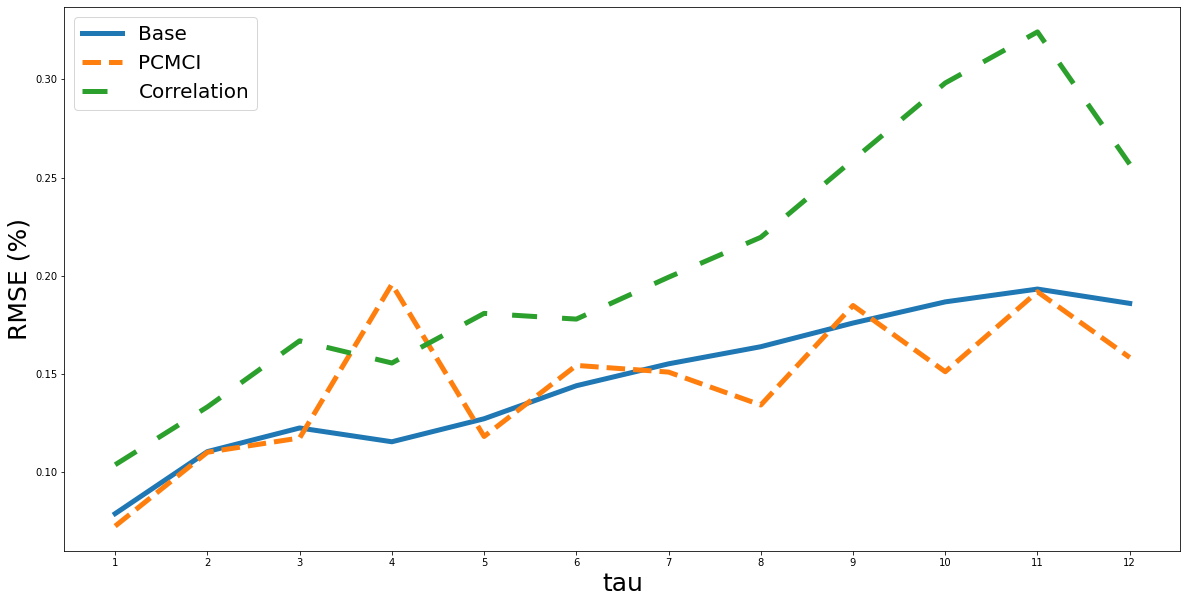

In [91]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("CAL197616.png")

In [10]:
model_V

[array([651.12659306]),
 array([1498.07246113]),
 array([1701.8080888]),
 array([4719.37702514]),
 array([1723.92280276]),
 array([2938.73672503]),
 array([2810.72683105]),
 array([2221.79804972]),
 array([4212.90074339]),
 array([2817.63264647]),
 array([4536.5810013])]

# ET

In [22]:
class_name = "BSh"
n_count = 303

base = []
corr = []
model = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_all_V_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_all_corr_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_all_V_{}.npy".format(tau))))

base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

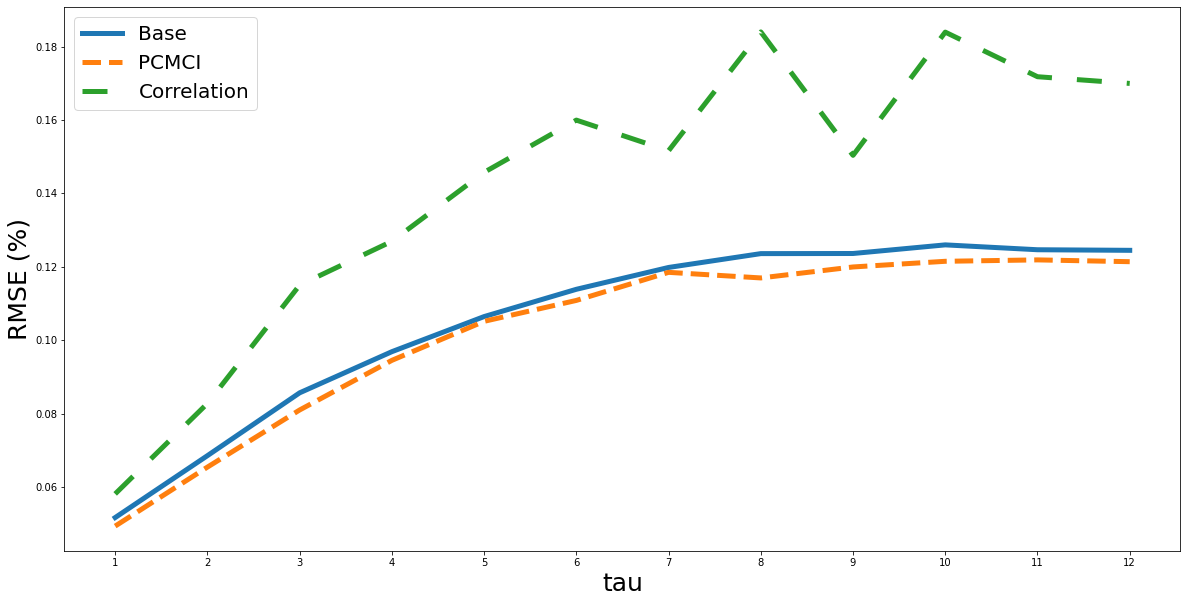

In [23]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("ET197616BSh.png")

In [24]:
class_name = "BSh"
n_count = 81

base = []
corr = []
model = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_V_all_{}_{}.npy".format(tau, class_name))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_corr_all_{}_{}.npy".format(tau, class_name))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_all_{}_{}.npy".format(tau, class_name))))

base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

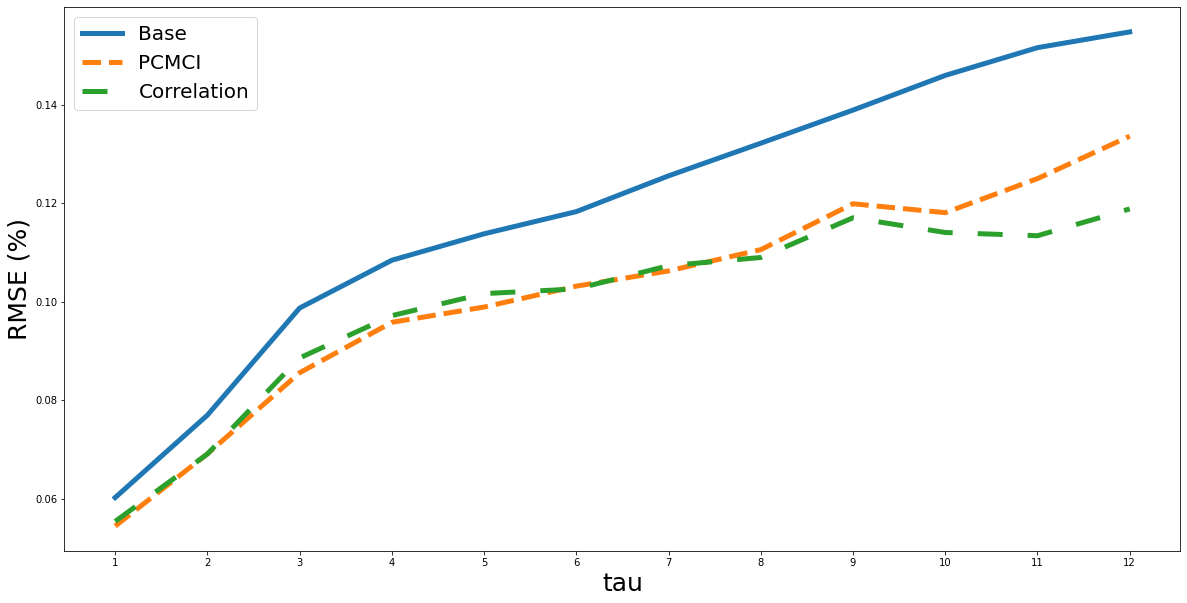

In [25]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("ET197616BSh.png")

In [14]:
class_name = "BSh"
n_count = 81

base = []
corr = []
model = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_V_{}_{}.npy".format(tau, class_name))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_corr_{}_{}.npy".format(tau, class_name))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_{}_{}.npy".format(tau, class_name))))

    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
model_d = np.sqrt(model_d)/n_count

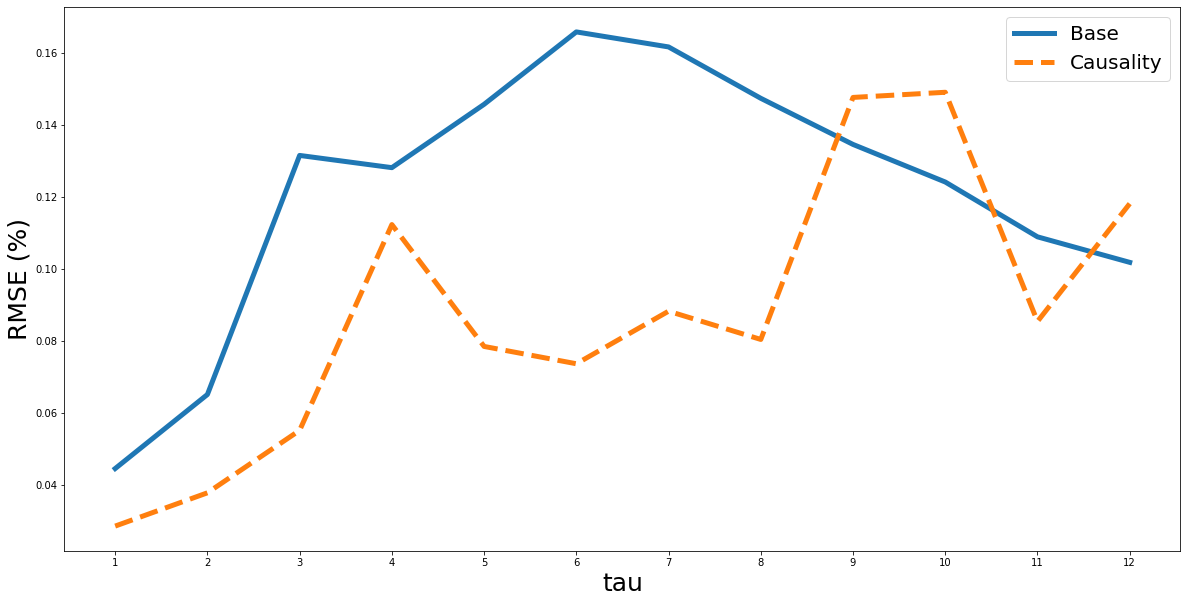

In [15]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [24]:
base = []
#corr = []
model_V = []
model_h = []

for tau in range(6,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/base_V_{}.npy".format(tau))))
    model_h.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_hybrid_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_corr_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))


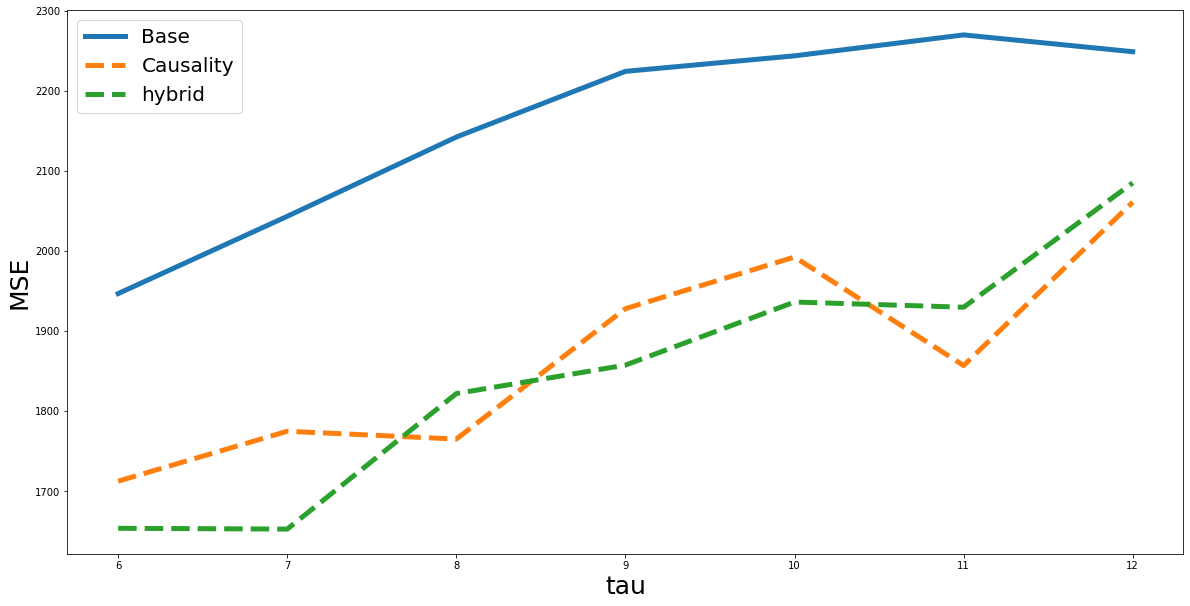

In [26]:
tau = np.arange(6,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, model_h, label = "hybrid", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [53]:
base = []
corr = []
model = []
model_gran = []
corr = []
shift = -1

for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))[shift])
    corr.append(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))[shift])
    model.append(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))[shift])
    model_gran.append(np.load("../../whole_data_results/new_rotated_causality/model_gran_V_{}.npy".format(tau))[shift])
    #model.append(np.load("./new_trended_unrotated/model_V_{}.npy".format(tau))[shift])
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count
#model_h = np.sqrt(model_h)/n_count
model_gran = np.sqrt(model_gran)/n_count


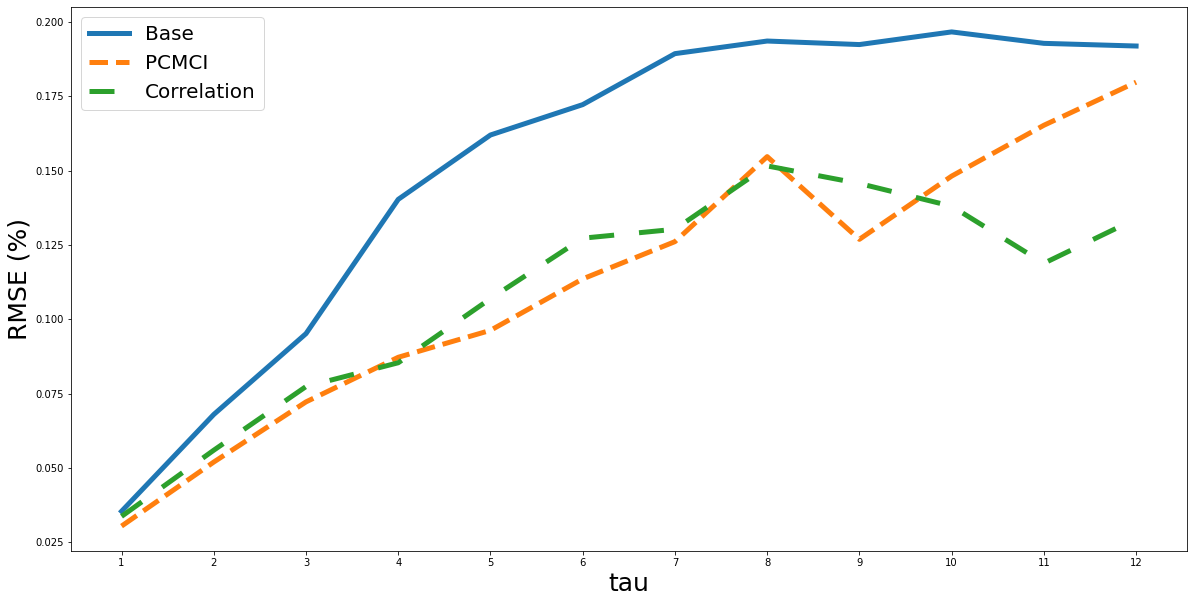

In [57]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_gran, label = "Granger", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))

plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("ET197616.png")

In [75]:
test_start = 1981
test_end = 1985

In [83]:
r2_base = []
r2_corr = []
for tau in range(1,1):
    pred_base = np.load("./new_rotated_corr/pred_base_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    test_base = np.load("./new_rotated_corr/test_base_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    r2_base.append(r2_score(pred_base, test_base))

    pred_corr = np.load("./new_rotated_corr/pred_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    test_corr = np.load("./new_rotated_corr/test_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    r2_corr.append(r2_score(pred_corr,test_corr))

In [84]:
test_corr

array([ 30,  26,  25,  35,  25,  22,  72,  75,  90,  64,  57,  55,  54,
        57,  63,  68,  51,  56,  57,  57,  54,  63,  69,  74,  83,  93,
       107, 117, 108,  78, 101, 153, 146, 182, 187, 175, 165, 164, 136,
        77,  76,  94,  88,  31,  44,  35,  42])

In [85]:
len(test_base)

47

In [55]:
len(pred_corr)

39

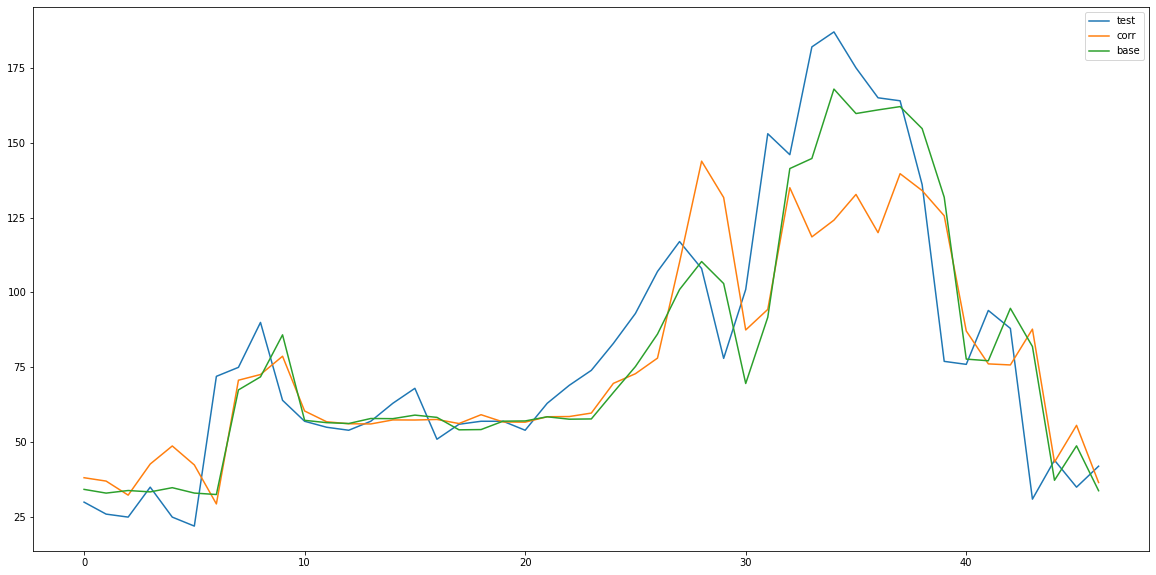

In [86]:
x = np.arange(len(test_base))
plt.plot(x,test_base, label = 'test')
plt.plot(x,pred_corr, label = 'corr')
plt.plot(x,pred_base, label = 'base')
plt.legend()

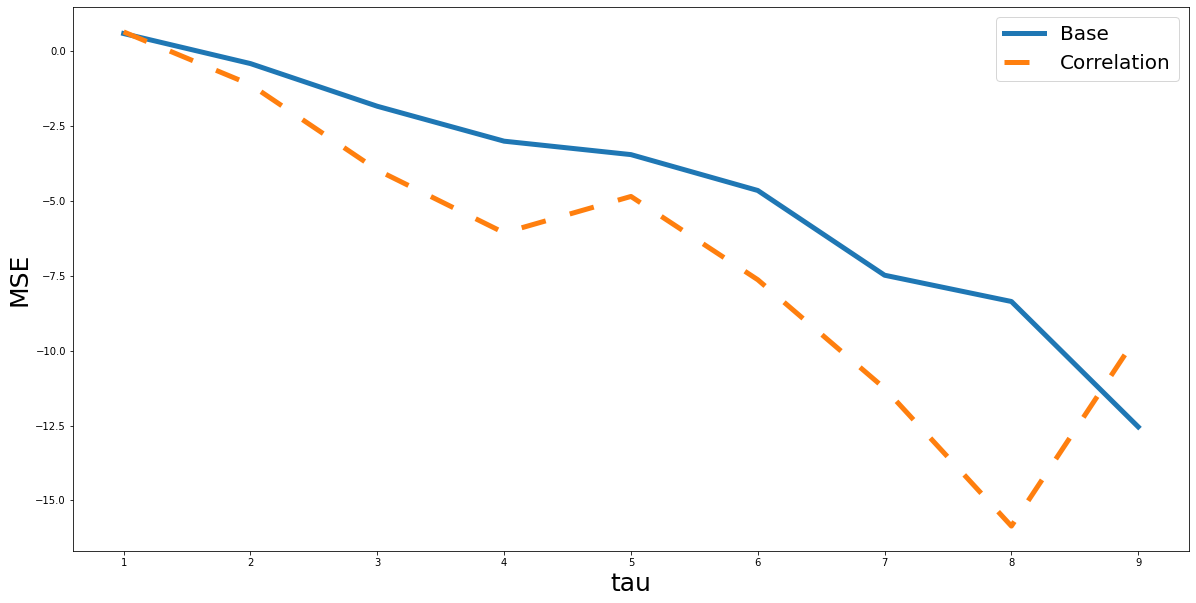

In [29]:
tau = np.arange(1,10)
plt.plot(tau, r2_base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, r2_corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [39]:
np.sqrt(np.load("./new_rotated_causality/base_V_{}.npy".format(3)))/303

array([0.08827342, 0.06701329, 0.15318532, 0.0635939 , 0.13833814,
       0.15030767, 0.10406126, 0.11752449, 0.10038132, 0.09218247,
       0.09519113])

In [44]:
base = []
corr = []
base_d = []
model = []
model_V = []
model_gran = []
model_h = []
model_V_detrend = []
n_count = 303

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model_gran.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_gran_V_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    #model_V_detrend.append(np.mean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))
    model_h.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_hybrid_{}.npy".format(tau))))

    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count
model_h = np.sqrt(model_h)/n_count
model_gran = np.sqrt(model_gran)/n_count

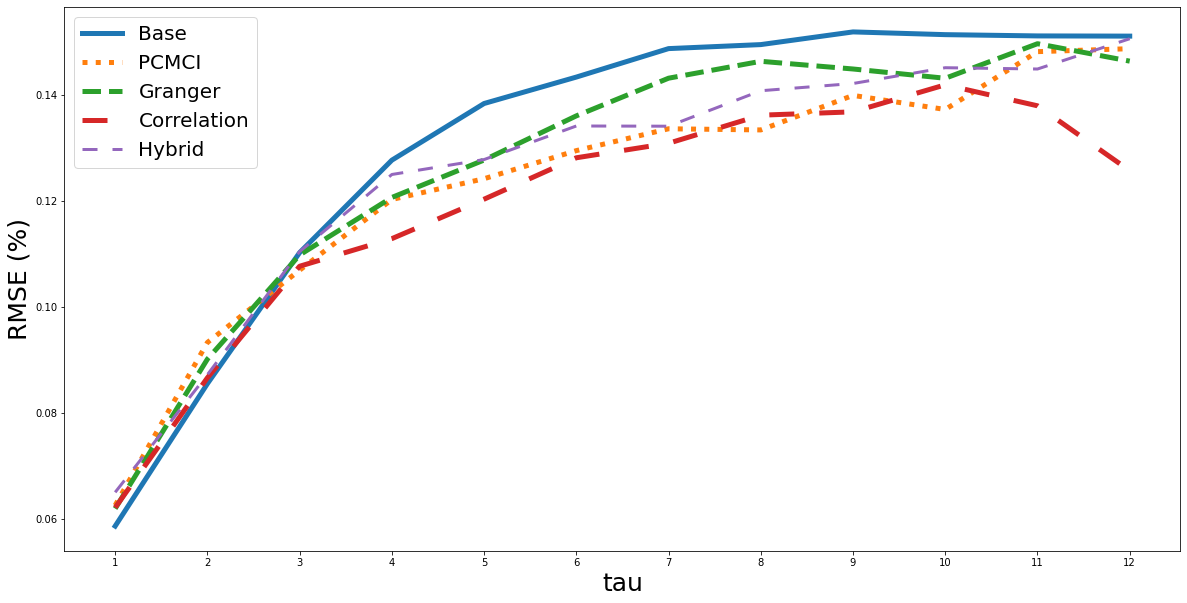

In [47]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dotted")
plt.plot(tau, model_gran, label = "Granger", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_detrend, label = "model V detrended", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, model_h, label = "Hybrid",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, base_d, label = "Base Dettrend", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("result.png")

In [41]:
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)


taus = np.arange(1,12,1)
corr_p = []
for tau in taus:
    test = []
    pred = []
    for ijz in range(len(train_start)):
        corr = []
        pred = np.load("./new_rotated_corr/pred_corr_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        test = np.load("./new_rotated_corr/test_corr_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        corr.append(st.pearsonr(pred, test)[0])
    corr_p.append(np.array(corr).mean())

NameError: name 'train_start' is not defined

In [31]:
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)


taus = np.arange(1,12,1)
model_p = []
for tau in taus:
    test = []
    pred = []
    for ijz in range(len(train_start)):
        corr = []
        pred = np.load("./new_rotated_causality/pred_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        test = np.load("./new_rotated_causality/test_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        corr.append(st.pearsonr(pred, test)[0])
    model_p.append(np.array(corr).mean())

In [28]:
model_p

[0.8957996483545767,
 0.6520382728216942,
 0.32794126406183055,
 0.2413101197840543,
 0.22106970933983516,
 0.1430047535855602,
 0.1555028624178327,
 0.22329709351072496,
 0.180709992335964,
 0.28520864416244557,
 -0.06556078974555421,
 0.0446933587656141]

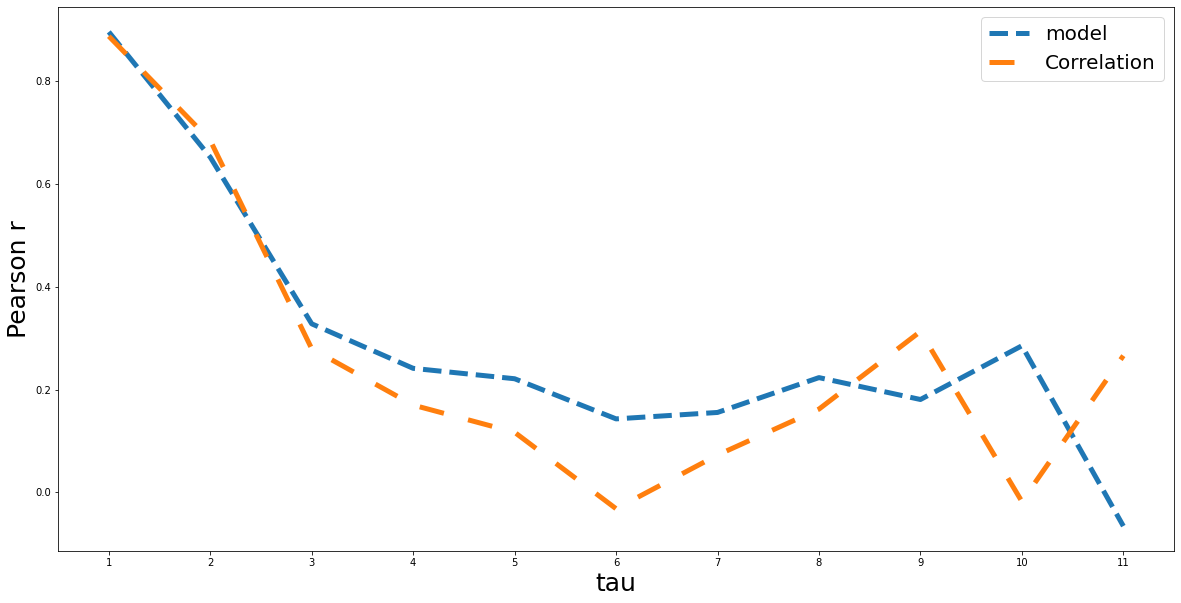

In [33]:
tau = np.arange(1,12)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model_V, label = "Causality trended", linewidth=5, linestyle="dotted")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, model_p, label = "model", linewidth=5, linestyle="dashed")
plt.plot(tau, corr_p, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
#plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("Pearson r", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)

In [9]:
np.load("./new_rotated_causality/model_V_9.npy")

array([1238.6520541 ,  673.95895547, 3635.08924853,  934.25307432,
       3639.61600716, 2754.35507124, 1066.65117585, 1148.64906458,
       1561.37937082, 1664.48288764, 1478.02502399])

In [10]:
np.load("./new_rotated_causality/model_V_10.npy")

array([1281.38427805,  684.22567715, 3616.04814533,  809.23835822,
       3474.02053753, 2186.6479128 ,  986.63523037, 1231.64797155,
       1293.12544108, 1471.51828378, 2014.37132668])

In [7]:
model_V

[0.06023206749040954,
 0.08997436032389064,
 0.10310323113467379,
 0.11533068535178347,
 0.11913683952105965,
 0.12502716032598207,
 0.1285940454001331,
 0.12897562070919052,
 0.1350532415509983,
 0.1325967701508145,
 0.1408534203272969]

In [15]:
m = np.load("./new_rotated_causality/model_V_6.npy")

In [16]:
b = np.load("./new_rotated_causality/base_V_6.npy")

In [22]:
b.mean() - b.std()

918.9506775183892

In [23]:
m.mean()

1541.210863654006

In [28]:
np.load("./new_rotated/model_V_corr_12.npy")

array([2.46155428e-01, 1.52555585e-01, 1.76309569e+02,            nan,
       2.32574638e+01, 2.51937509e+00, 2.25005290e+00, 7.24429311e-01,
       1.02141040e+00, 9.00317738e-01, 2.71112569e-01])

In [23]:
np.arange(1926,1977,5)

array([1926, 1931, 1936, 1941, 1946, 1951, 1956, 1961, 1966, 1971, 1976])

In [25]:
np.arange(1960,2011,5)

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

In [5]:
base

[18.921033001194584, 19.0948363933772]

In [7]:
model_V

[6.335094516441647, 24.362499643044078]

Stationary

In [8]:
base = []
#corr = []
corr_V = []
model = []
model_V = []
clus = []

for tau in range(1,13):
    base.append(np.mean(np.load("./new_station/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("./new_station/model_V_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./new5/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new5/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new5/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

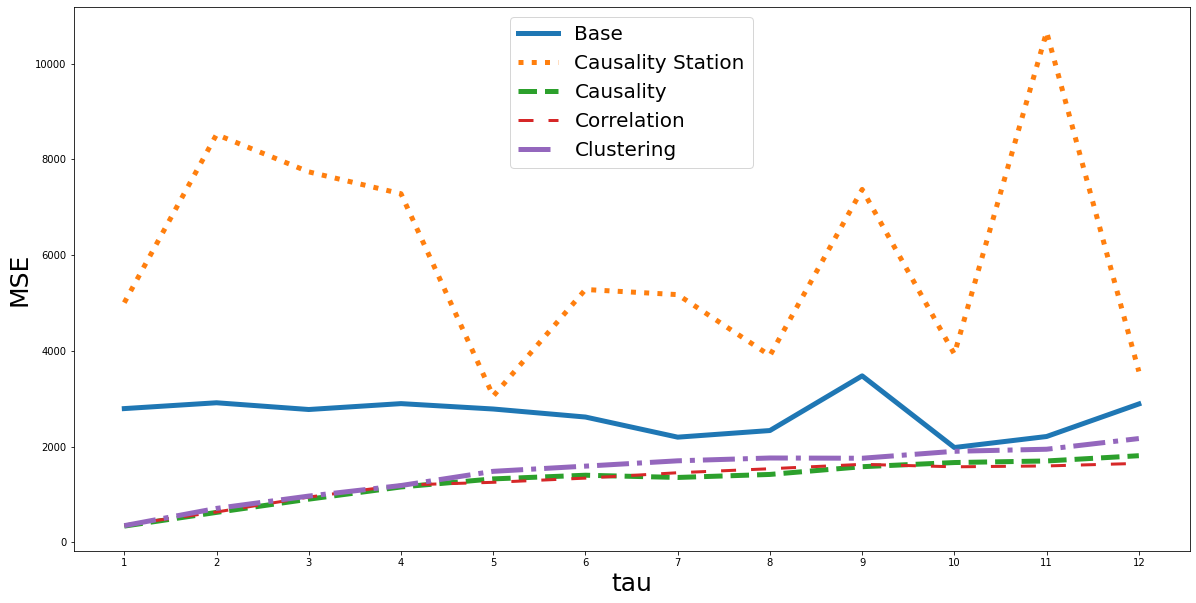

In [9]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality Station", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

Non_Stationary

In [5]:
#base = []
#corr = []
corr_V = []
#model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    #model.append(np.nanmean(np.load("./new5/model_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./new5/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new5/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new5/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

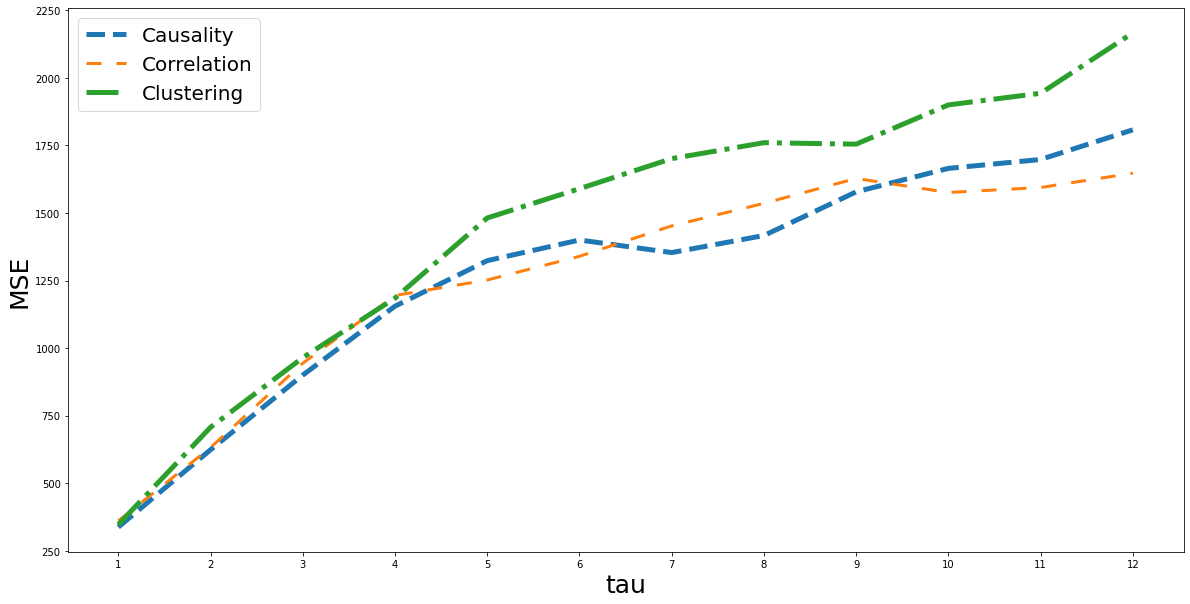

In [6]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [18]:
#base = []
#corr = []
corr_V = []
#model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    #model.append(np.nanmean(np.load("./agg/model_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./agg/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./agg/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./agg/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./agg/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

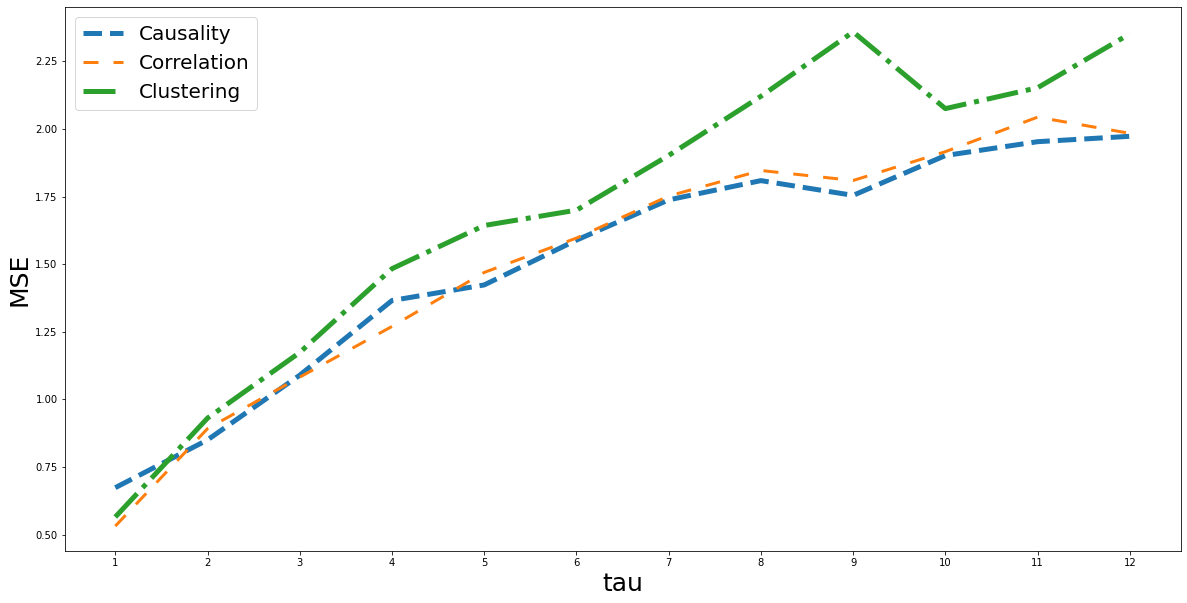

In [19]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [29]:
m2 = np.load("./new5/model_V_12.npy")
m1 = np.load("./new2/model_V_1.npy")

In [19]:
m.shape

(132,)

In [35]:
m1

array([1026.1153911 ,  530.40085675, 1668.92840453,  363.81748921,
       1240.08540478, 1336.44396876,  973.5000981 ,  767.61819879,
        878.88764166,  690.56280793,  421.42207376,  571.68975212,
        264.36849057, 1523.85408112,  260.48528755, 1074.98068539,
        848.54551546,  633.59563789,  543.62940586,  505.52831716,
        431.59188202,  201.25665304,  275.88600176,  199.88925018,
        757.5949127 ,  168.52505414,  591.84234593,  397.39010738,
        318.45369348,  275.69878316,  340.92552455,  309.31275674,
         74.56517236])

In [30]:
len(m2)

11

In [36]:
np.mean(m1[-11:])

337.2803274894408

array([1026.1153911 ,  530.40085675, 1668.92840453,  363.81748921,
       1240.08540478, 1336.44396876,  973.5000981 ,  767.61819879,
        878.88764166,  690.56280793,  421.42207376,  571.68975212,
        264.36849057, 1523.85408112,  260.48528755, 1074.98068539,
        848.54551546,  633.59563789,  543.62940586,  505.52831716,
        431.59188202,  201.25665304,  275.88600176,  199.88925018,
        757.5949127 ,  168.52505414,  591.84234593,  397.39010738,
        318.45369348,  275.69878316,  340.92552455,  309.31275674,
         74.56517236])

In [23]:
train_start = np.arange(1926,1977,5)

In [25]:
len(train_start) * 12

132

In [32]:
#base = []
corr = []
corr_V = []
model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new3/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new3/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new3/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new3/model_clustering_{}.npy".format(tau))))
    model_V.append(np.mean(np.load("./new3/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

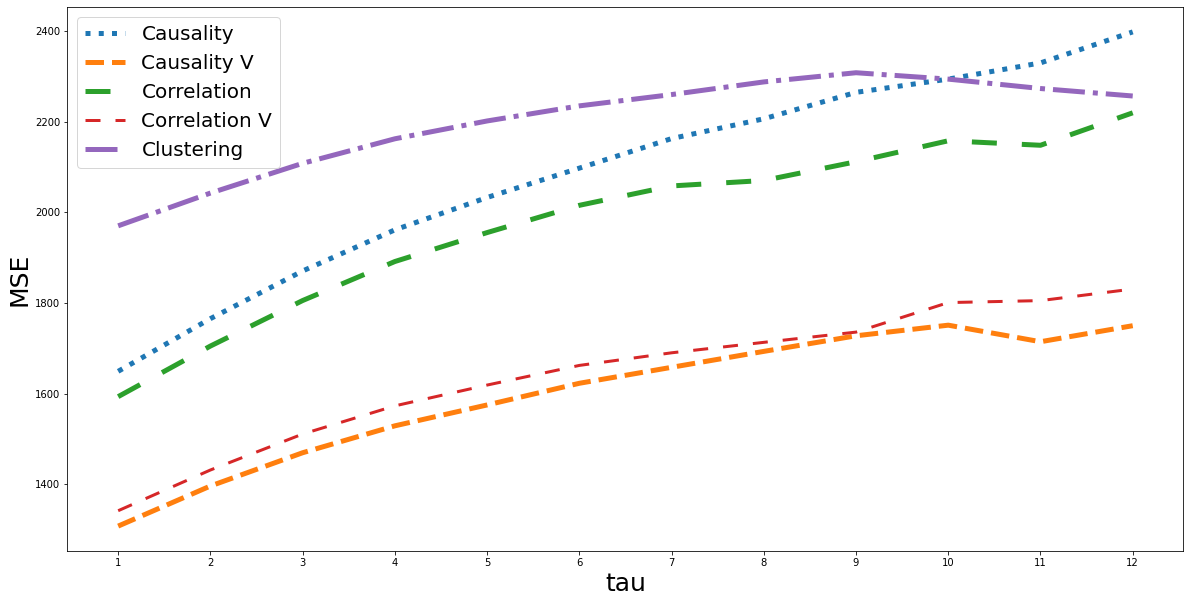

In [33]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality V", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [34]:
model_V

[1307.8603805513008,
 1396.2538013634514,
 1469.6223925456877,
 1528.9740606448995,
 1575.0357895388,
 1622.8053489252982,
 1658.0365407318955,
 1693.1612411501553,
 1727.5658440562008,
 1750.967543144936,
 1714.4632456368265,
 1749.8060232552182]

In [36]:
model_V_1

[620.223989270473,
 761.695820160989,
 899.7983941241905,
 1292.7883283074038,
 1361.7186685574902,
 1399.9543053987193,
 1449.3450633235618,
 1497.3199016082729,
 1578.1105479284795,
 1665.071610572096,
 1752.905015513838,
 1807.7985974925514]

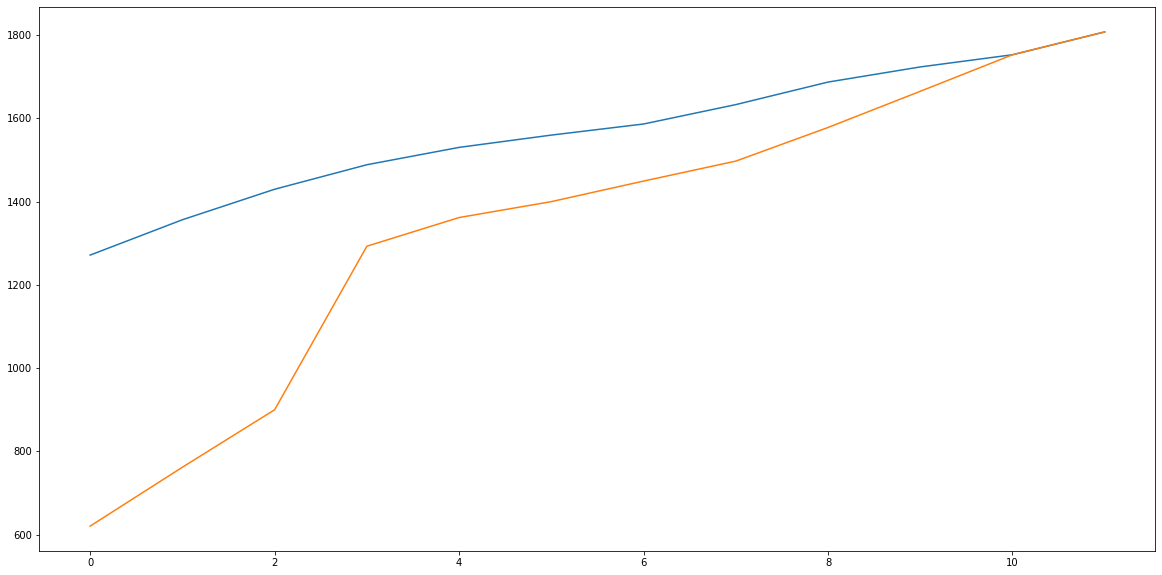

In [15]:
plt.plot(np.arange(len(model_V)), model_V,np.arange(len(model_V)), model_V_1)

In [38]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
base = []
corr = []
corr_V = []
model = []
model_V_1 = []
clus = []

for tau in range(1,13):
    base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new2/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new2/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new2/model_corr_90_V_{}.npy".format(tau))))
    #clus.append(np.nanmean(np.load("./new2/model_clustering_{}.npy".format(tau))))
    model_V_1.append(np.mean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

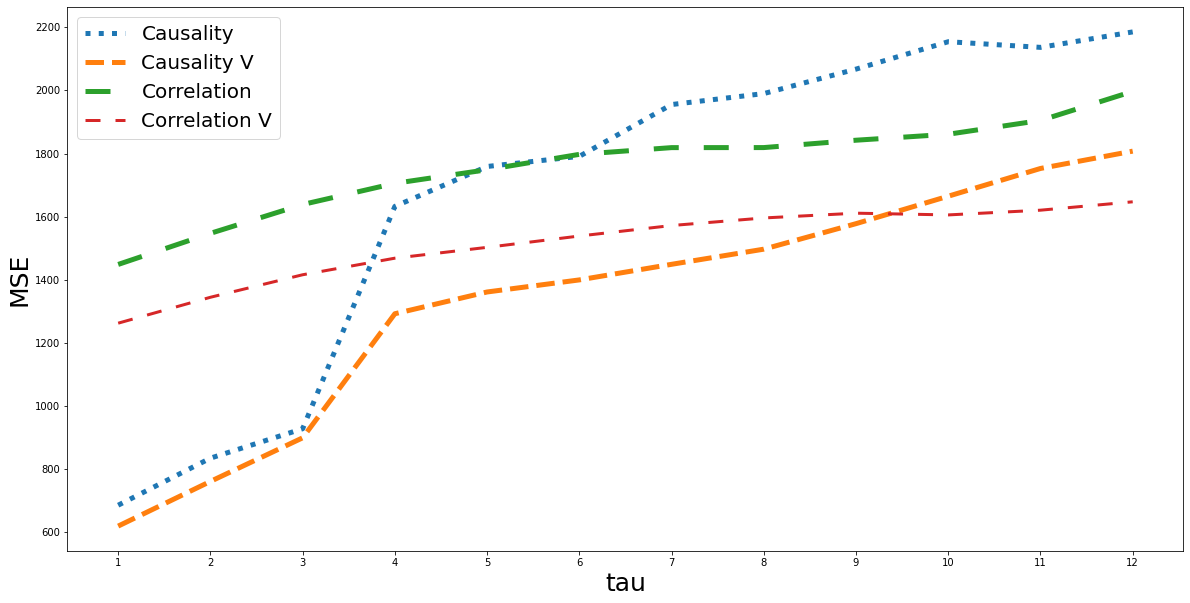

In [8]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V_1, label = "Causality V", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [9]:
model_V

[1271.4961486920074,
 1356.4248597104227,
 1429.708021061686,
 1488.5868684991858,
 1530.2942710856798,
 1559.8387338527396,
 1586.4861385950762,
 1633.1042889632633,
 1687.2480473820629,
 1723.6272138665909,
 1752.905015513838,
 1807.7985974925514]

In [10]:
model_V_1

[620.223989270473,
 761.695820160989,
 899.7983941241905,
 1292.7883283074038,
 1361.7186685574902,
 1399.9543053987193,
 1449.3450633235618,
 1497.3199016082729,
 1578.1105479284795,
 1665.071610572096,
 1752.905015513838,
 1807.7985974925514]

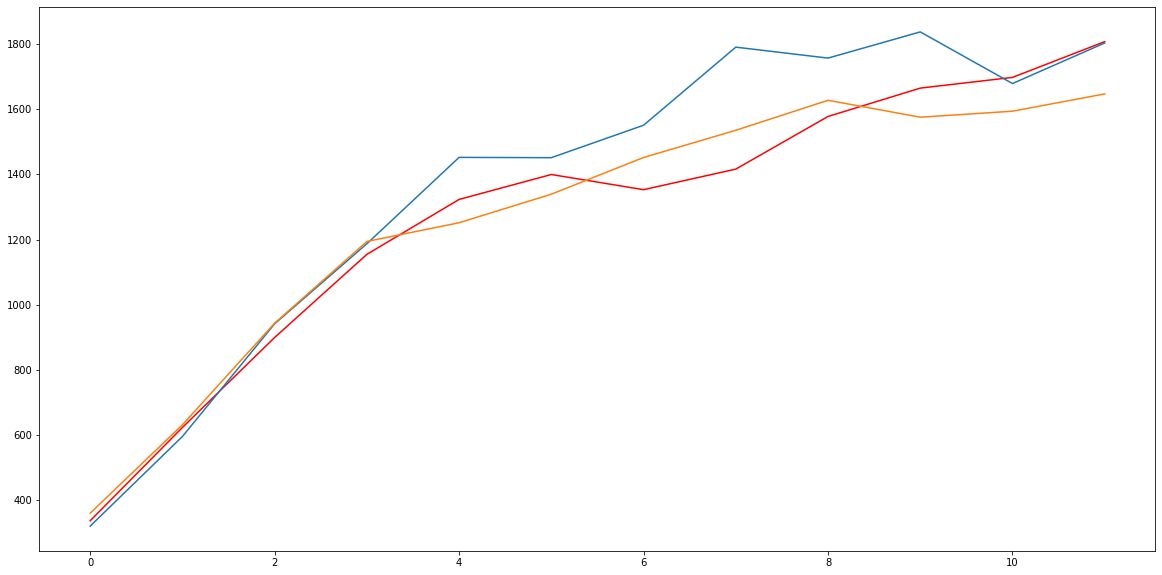

In [22]:
plt.plot(np.arange(len(model_V_1)),model_V_1, color="r")
plt.plot(np.arange(len(model_V_1)),model_V)
plt.plot(np.arange(len(model_V_1)),corr_V)

In [5]:
base = []
corr = []
corr_V = []
clus = []
model = []
model_V = []
#model_V_orac = []

for tau in range(1,13):
    base.append(np.mean(np.load("./base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new/model_corr_V_90_{}.npy".format(tau))))
    clus.append(np.mean(np.load("./new/model_clustering_{}.npy".format(tau))))
    model_V.append(np.mean(np.load("./model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

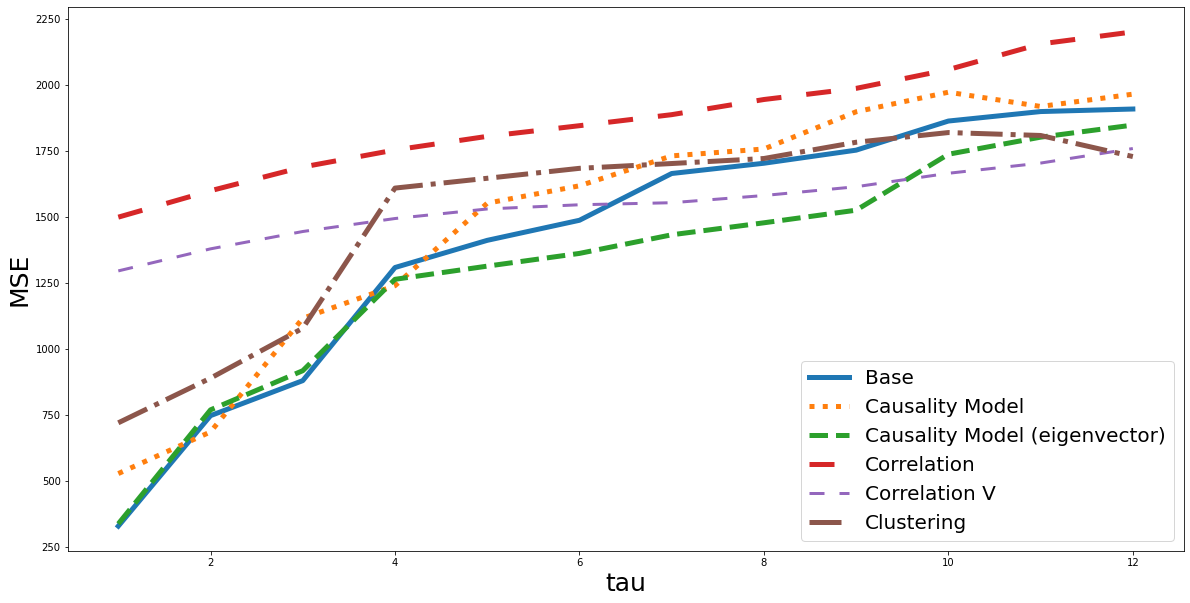

In [6]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality Model", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality Model (eigenvector)", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)

In [34]:
clus.append(np.nan)

In [7]:
clus = []
for tau in range(1,19):
    clus.append(np.mean(np.load("./new/model_clustering_{}.npy".format(tau))))

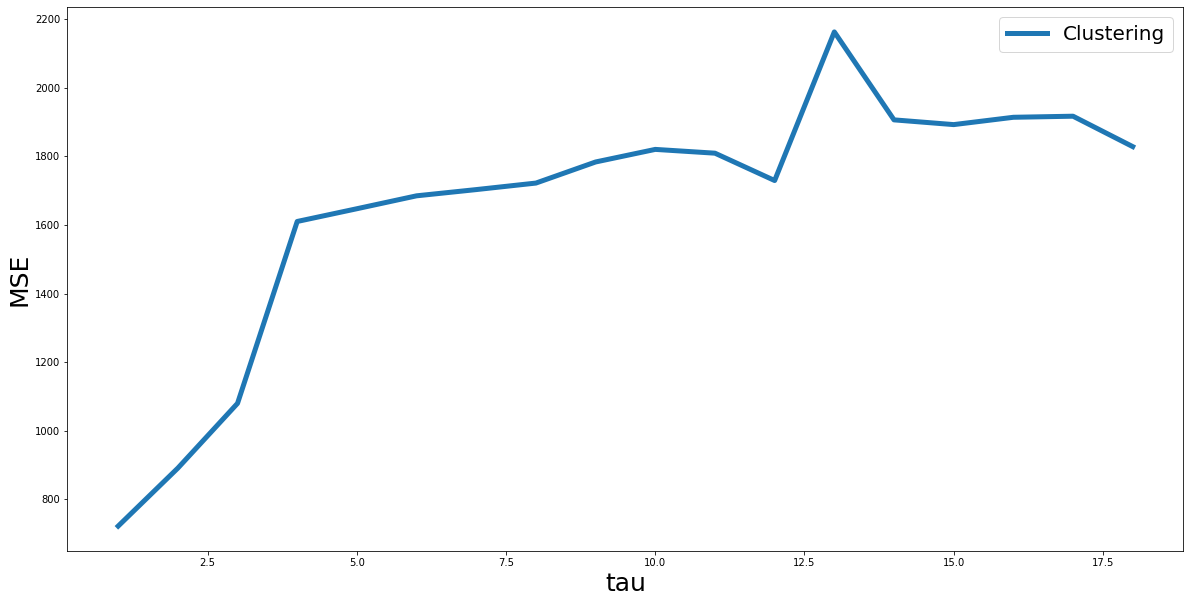

In [9]:
tau = np.arange(1,19)
plt.plot(tau, clus, label = "Clustering", linewidth=5)
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)

In [ ]:
[34 -2]
[35 -9]
[62 -4]
[52 -3]
[ 1 -1]
[60 -3]
[23 -4]
[29 -6]
[ 38 -10]
[ 54 -11]
[38 -8]
[74 -1]
[32 -3]
[71 -4]
[ 35 -10]
[37 -7]
[56 -9]
[ 13 -12]
[60 -2]
[53 -5]
[ 68 -10]
[23 -1]
[70 -8]
[ 51 -11]
[ 21 -11]
[34 -9]
[23 -2]
[ 6 -3]
[ 48 -12]
[ 26 -11]
[52 -4]
[ 64 -10]
[53 -3]
[76 -6]
[ 7 -8]
[49 -3]
[57 -1]
[34 -5]
[ 9 -9]
[16 -8]
[ 65 -10]
[74 -4]
[ 14 -10]
[17 -7]
[ 57 -11]
[75 -4]
[71 -6]
[ 19 -10]
[ 63 -12]
[43 -8]
[21 -8]
[18 -8]
[31 -9]
[72 -2]
[ 35 -12]
[16 -1]
[52 -5]
[58 -7]
[ 66 -10]
[ 11 -10]
[59 -5]
[68 -3]
[  1 -10]
[ 1 -2]


In [ ]:
[[34 -2]
[35 -9]
[62 -4]
[52 -3]
[ 1 -1]
[60 -3]
[23 -4]
[29 -6]
[ 38 -10]
[ 54 -11]
[38 -8]
[74 -1]
[32 -3]
[71 -4]
[ 35 -10]
[37 -7]
[56 -9]
[ 13 -12]
[60 -2]
[53 -5]
[ 68 -10]
[23 -1]
[70 -8]
[ 51 -11]
[ 21 -11]
[34 -9]
[23 -2]
[ 6 -3]
[ 48 -12]
[ 26 -11]
[52 -4]
[ 64 -10]
[53 -3]
[76 -6]
[ 7 -8]
[49 -3]
[57 -1]
[34 -5]
[ 9 -9]
[16 -8]
[ 65 -10]
[74 -4]
[ 14 -10]
[17 -7]
[ 57 -11]
[75 -4]
[71 -6]
[ 19 -10]
[ 63 -12]
[43 -8]
[21 -8]
[18 -8]
[31 -9]
[72 -2]
[ 35 -12]
[16 -1]
[52 -5]
[58 -7]
[ 66 -10]
[ 11 -10]
[59 -5]
[68 -3]
[  1 -10]
[ 1 -2]]

In [11]:
l = np.load("./link1/link_1926_1960.npy")

In [14]:
l

array([[ 34,  -2],
       [ 35,  -9],
       [ 62,  -4],
       [ 52,  -3],
       [  1,  -1],
       [ 60,  -3],
       [ 23,  -4],
       [ 29,  -6],
       [ 38, -10],
       [ 54, -11],
       [ 38,  -8],
       [ 74,  -1],
       [ 32,  -3],
       [ 71,  -4],
       [ 35, -10],
       [ 37,  -7],
       [ 56,  -9],
       [ 13, -12],
       [ 60,  -2],
       [ 53,  -5],
       [ 68, -10],
       [ 23,  -1],
       [ 70,  -8],
       [ 51, -11],
       [ 21, -11],
       [ 34,  -9],
       [ 23,  -2],
       [  6,  -3],
       [ 48, -12],
       [ 26, -11],
       [ 52,  -4],
       [ 64, -10],
       [ 53,  -3],
       [ 76,  -6],
       [  7,  -8],
       [ 49,  -3],
       [ 57,  -1],
       [ 34,  -5],
       [  9,  -9],
       [ 16,  -8],
       [ 65, -10],
       [ 74,  -4],
       [ 14, -10],
       [ 17,  -7],
       [ 57, -11],
       [ 75,  -4],
       [ 71,  -6],
       [ 19, -10],
       [ 63, -12],
       [ 43,  -8],
       [ 21,  -8],
       [ 18,  -8],
       [ 31,